# Project 10: Chapter 8: Advanced Data Analysis
In the last few chapters, we have become comfortable with the idea of building our own functions. These can become quite complex, as we have learned with the construction of the OLS regression in chapter 7. We will continue developing our tool set for working with and managing large sets of data by integrating data from different data sets. We will introduce the multi index to facilitate this process. Among other things, the multi index is useful for including identifiers across time and region or principality. We will also use the multi index to perform a panel regression that controls for level effects between different countries.

## Using a Double Index to Work with Panel Data
In any project, it will not be uncommon for data to be attached to more than one indentifying category. Often, data will be labeled by polity and by date. In the next several examples, we will work with multiple data sets of this sort, working to combine different data sets, investigate the features of the double index, and use this data in a panel regression that can control for effects by polity and by time period.

### Plotting with Double Index
We will be working with two datasets in the next example: the [Fraser Economic Freedom Index](https://www.fraserinstitute.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=2&max-year=0&filter=0&year=2017) and GDP from the [Maddison Project](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2018).

Due to the formatting of the Fraser Economic Freedom Index, the first column and the first three rows of data in the sheet titled “EFW Index 2018 Report” are blank. We will account for this when importing the data with pandas. Both should be saved in the same folder as the script below.

First, import the GDP data from Maddison Project:

In [1]:
#multiIndex.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# index_col = [0,2] will select  countrycode as the primary index and year as 
# the secondary index
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                     index_col = [0,1],
                  parse_dates = True).rename(columns = {"Summary":"EFW"})

View the new dataframe by entering data in the console:

In [2]:
data

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1975-01-01         AO  Sub-Saharan Africa   
           1980-01-01         AO  Sub-Saharan Africa   
           1985-01-01         AO  Sub-Saharan Africa   
           1990-01-01         AO  Sub-Saharan Africa   
...                          ...                 ...   
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                 LM                                                                                     
...                                                                  ...                                                                                     
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1975-01-01    Angola       NaN                 NaN   
           1980-01-01    Angola       NaN                 NaN   
           1985-01-01    Angola       NaN                 NaN   
           1990-01-01    Angola       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1975-01-01                               NaN          NaN   
           1980-01-01                               NaN          NaN   
           1985-01-01           

When working with a multi index, calling the values from a single index requires a few steps. If you were to call data.index in the console, both the countrycode and the year values would be returned:

In [3]:
data.index

MultiIndex([('AGO', '1970-01-01'),
            ('AGO', '1975-01-01'),
            ('AGO', '1980-01-01'),
            ('AGO', '1985-01-01'),
            ('AGO', '1990-01-01'),
            ('AGO', '1995-01-01'),
            ('AGO', '2000-01-01'),
            ('AGO', '2001-01-01'),
            ('AGO', '2002-01-01'),
            ('AGO', '2003-01-01'),
            ...
            ('ZWE', '2011-01-01'),
            ('ZWE', '2012-01-01'),
            ('ZWE', '2013-01-01'),
            ('ZWE', '2014-01-01'),
            ('ZWE', '2015-01-01'),
            ('ZWE', '2016-01-01'),
            ('ZWE', '2017-01-01'),
            ('ZWE', '2018-01-01'),
            ('ZWE', '2019-01-01'),
            ('ZWE', '2020-01-01')],
           names=['ISO_Code_3', 'Year'], length=4455)

To call only the year values from the multi index, we use the dataframe method, *.get_level_values(“year”)*. This returns the same list, but with only years:

In [4]:
data.index.get_level_values("Year")

DatetimeIndex(['1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01',
               '1990-01-01', '1995-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01',
               ...
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', length=4455, freq=None)

Since we don’t need to hold every repeated year value, only the full range years present in the data set. We will remove an repeated values from the list and then ensure that the list is in order:

In [5]:
#multiIndex.py
# . . . 
# to gather all of the years, we group observations by year, 
# which will remove the other column of the multiindex 
years = data.groupby("Year").mean().index

Once you understand the structure of the index, you may find it easier to call all of the commands in one line:

In [6]:
years

DatetimeIndex(['1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01',
               '1990-01-01', '1995-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

### Creating Indicator Variables
Suppose that we wanted to test the idea that geography influences economic growth. We would need to clarify a hypothesis concerning this. We might believe, for example, that countries in North America tend to have a distinct real gross domestic product than in other continents i.e., real GDP tends to be higher or lower due to residing in North America. To represent this, we would create an indicator variable named *“North America”*. Countries residing in North America would be indicated with a  1 (i.e., True), and those outside of North America would receive a zero.

To accomplish this task is straightforward if you know the appropriate commands to use. As usual, we import the data. Before creating an indicator variable, you will need to choose the name that will reference the indicator variable, indicator_name, and make a list of the index values, *target_index_list* that will be recorded as possessing the attribute referred to by the indicator variable. Finally, you will need to choose the name of the index column that includes the elements in the *target_index_list*. If you are not sure what this name is, you can check the names of the index columns using *df.index.names*.

In [7]:
#indicatorVariable.py
  
def create_indicator_variable(data, indicator_name, 
                              index_name, target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
          
# select "ISO_Code3" from names of double index  
index_name = data.index.names[0]  
indicator_name = "North America"  
# Cuba, Grenada, Saint Kitts, Saint Lucia, Saint Vincent are missing   
# from Fraser Data  
countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  
create_indicator_variable(data = data, 
    indicator_name = indicator_name,  
    index_name = index_name, 
    target_index_list = countries_in_north_america)

Once the new column of data has been creative, it can be called by passing indicator¬¬_name to the dataframe. Be sure to use double brackets (i.e., *[[ , ]]*) so that the column names are included in the output. 

In [8]:
data[["North America"]]

North America
ISO_Code_3 Year                     
AGO        1970-01-01              0
           1975-01-01              0
           1980-01-01              0
           1985-01-01              0
           1990-01-01              0
...                              ...
ZWE        2016-01-01              0
           2017-01-01              0
           2018-01-01              0
           2019-01-01              0
           2020-01-01              0

[4455 rows x 1 columns]

It is useful to represent discrete variabls, like the indicator variable for "North America", by color in a scatter plot. If there is a difference means between two groups, it is often apparrent when data is visualized by color. In the case of the "North America" indicator variable, the difference in means between the groups does not appear to be causal (statistically significant), as we will show later in the chapter.

We use  "North America" as the variable indicating color in the scatter plot. 

Text(0.5, 1.0, '2000')

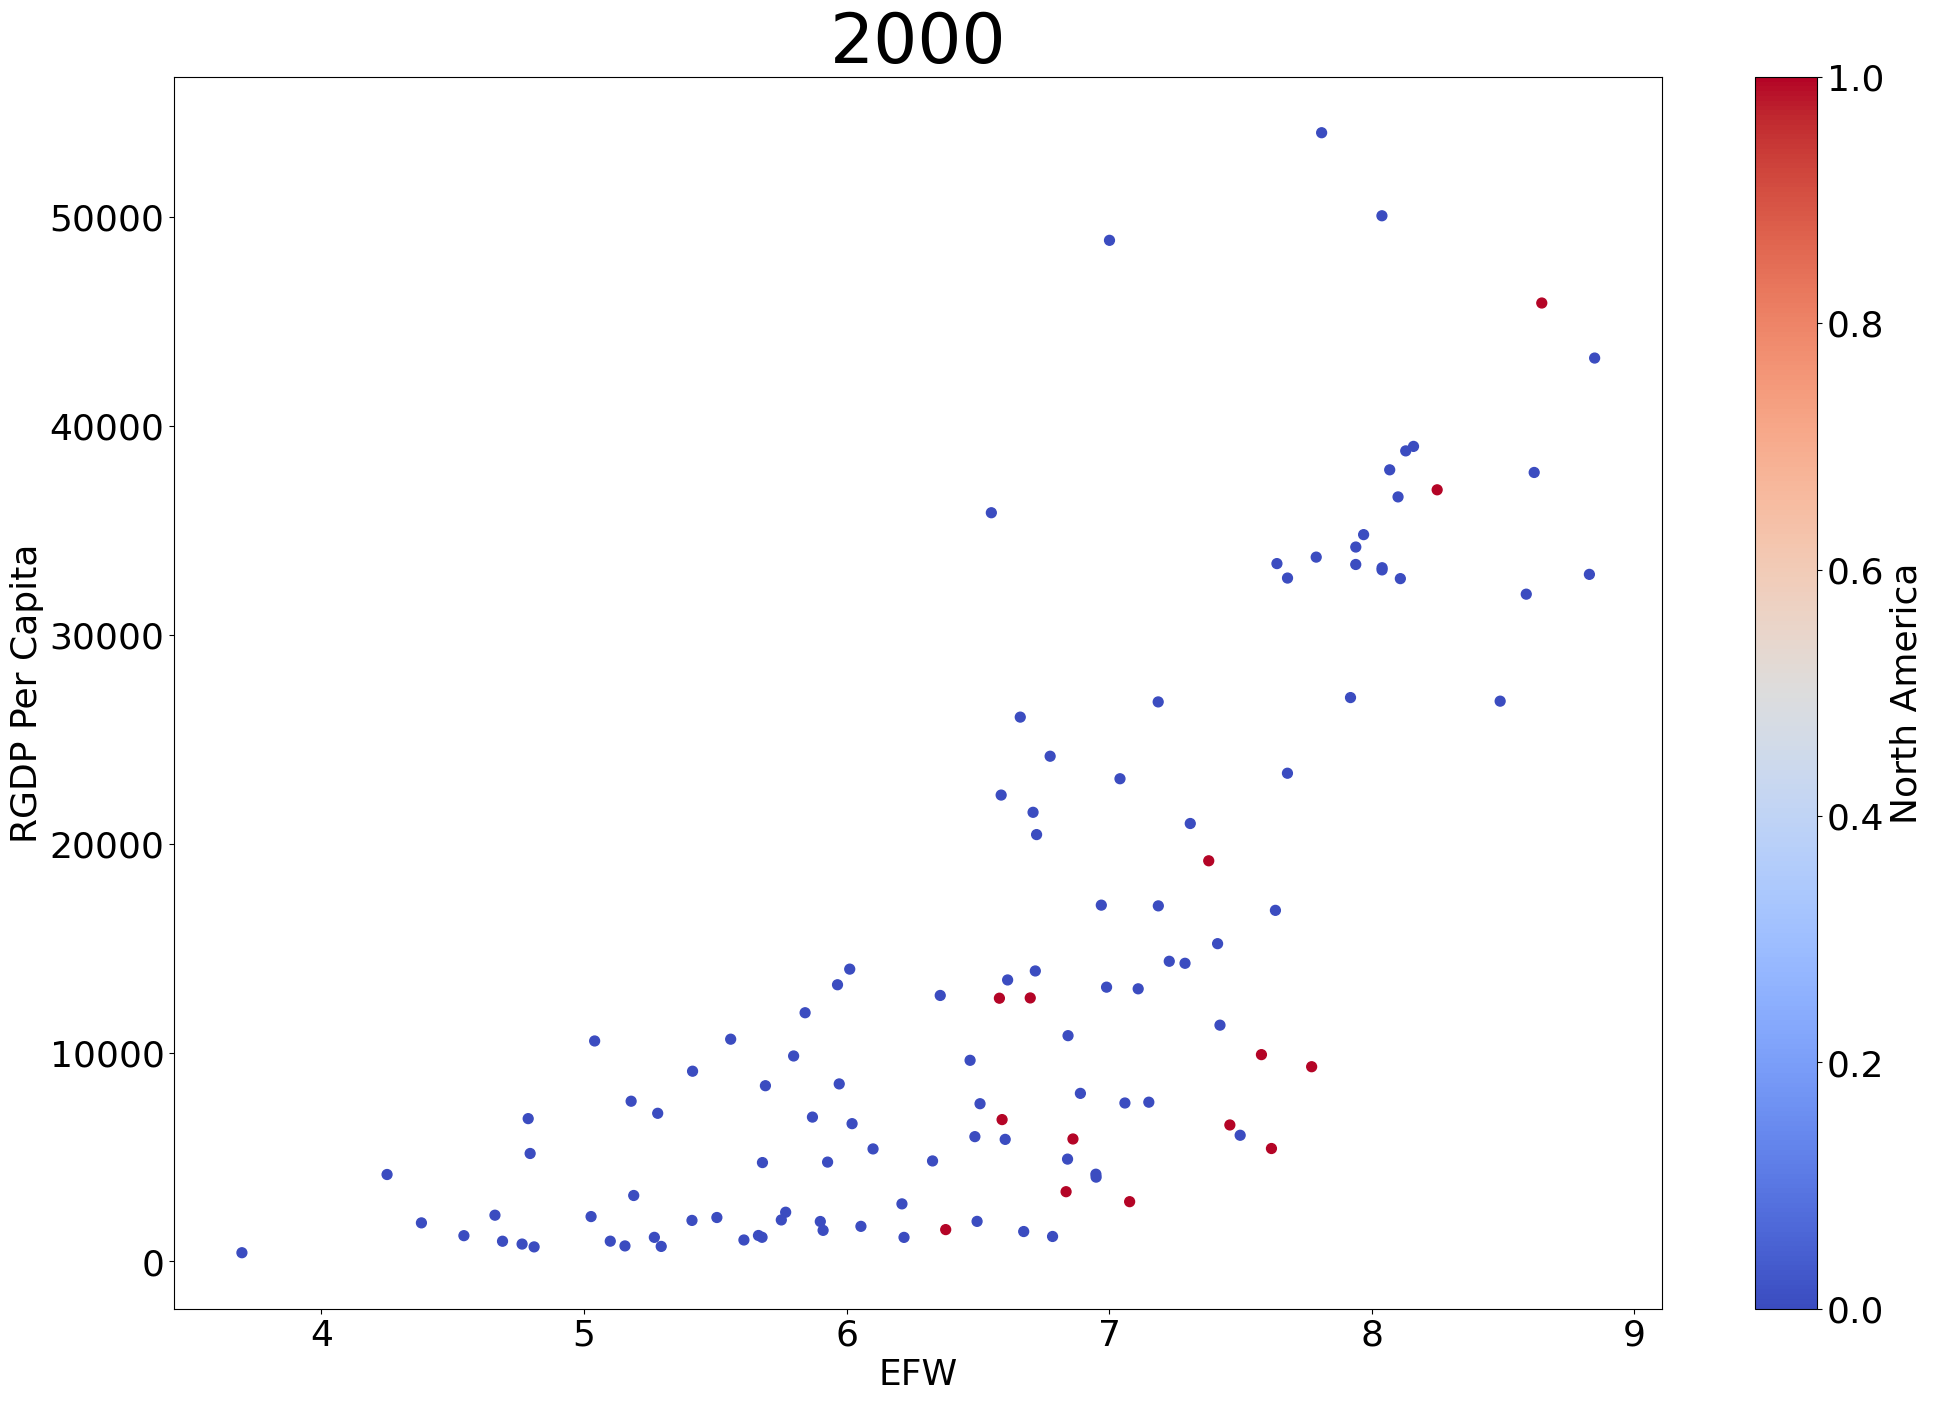

In [9]:
import datetime
plt.rcParams.update({"font.size":26})
year = 2000

plot_data = data[
    data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(
    x = "EFW", y = "RGDP Per Capita", c = "North America",
                      cmap = "coolwarm", ax = ax, s = 50)
ax.set_title(str(year), fontsize = 50)

[0.  0.2 0.4 0.6 0.8 1. ]


C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\3482705627.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


Text(0.5, 1.0, '2000')

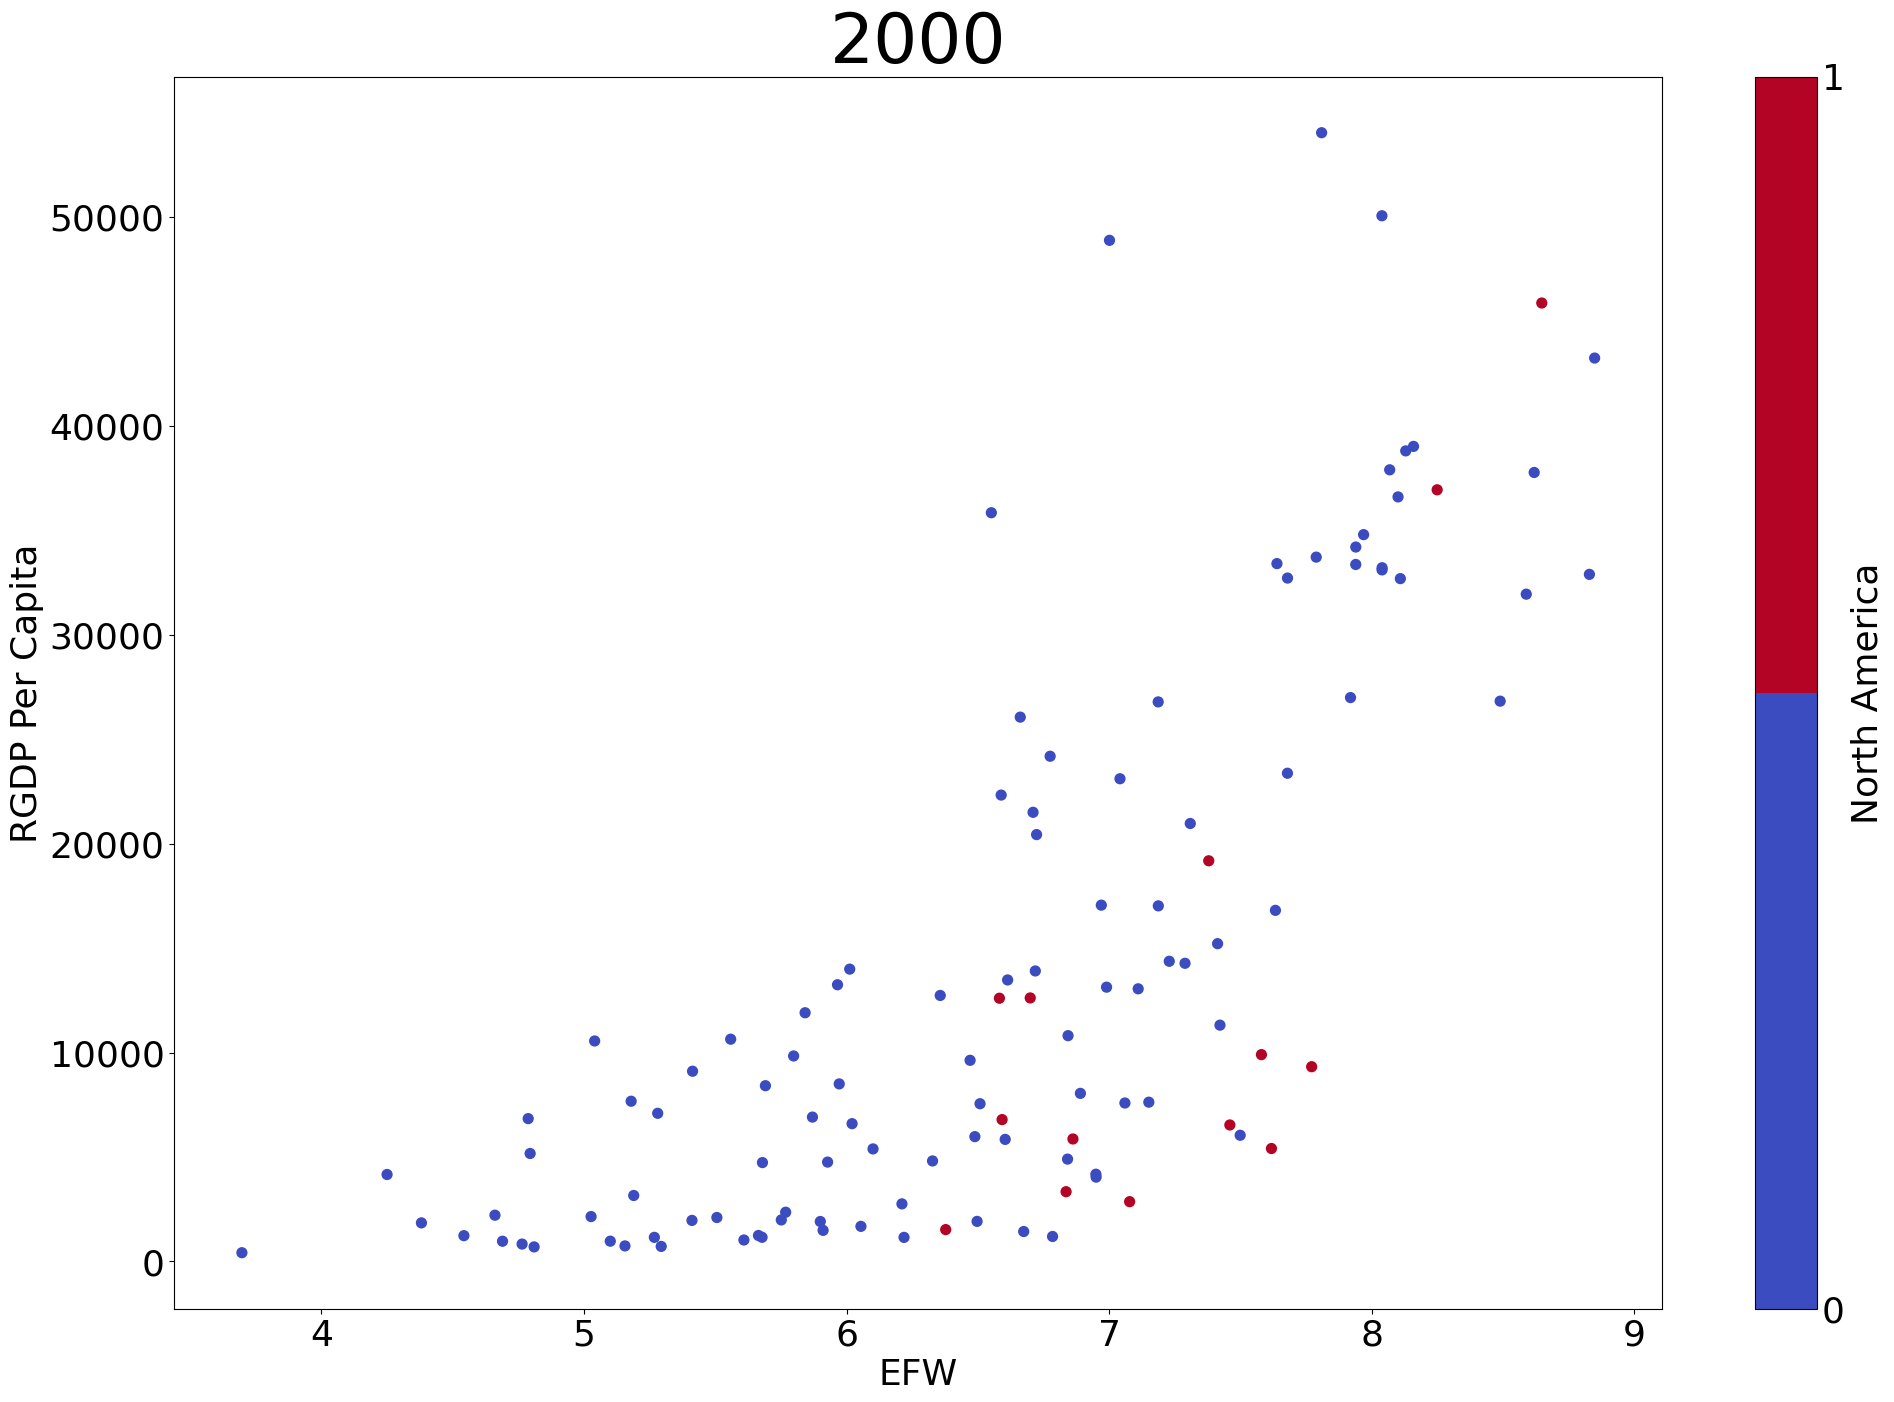

In [10]:
import datetime
from matplotlib import cm

year = 2000
# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita", 
                       c = "North America",
                      ax = ax,
                       cmap = cmap,
                       s = 50)

# to remove numbers between 0 and 1, access the color axis through plt.gcf()
f = plt.gcf()
cax  = f.get_axes()[1]
# access colorbar values
vals = cax.get_yticks()
print(vals)
# only include 0 or 1
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
# remove tick lines from color axis
cax.tick_params(length = 0)

ax.set_title(str(year), fontsize = 50)

### Create Quantile Ranking
Similar to the pervious exercise, we may categorize data according ranked bins. This is accomplished by separating data into quantiles, often in the form of quartiles or quintiles, however this can be accomplished using any number of divisions. The following script allows you to create quantiles of the number of divisions of your choosing.

First, we need to import the data that we have merged. Once the dataframe is created, we must prepare a place for quantile data to be registered. Out of convenience, we will refer to the n-tile, meaning that a quartile will be labeled a “4-tile”, a quintile will be label a “5-tile”, and so forth. Before recording the data, we will create blank entries using *np.nan*.

In [11]:
#quantile.py  
import pandas as pd  
import numpy as np  

# choose numbers of divisions  
n = 5  
#create column identifying n-tile rank  
quantile_var = "RGDP Per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

Now that the dataframe has been prepped, we can create function that will record quantile values. Since the data frame includes data for nearly every country over many years, we will want to choose one of the index categories to identify quantiles. We prefer to compare countries,  8so unique quantile measures will compare countries in a given year. We will build a list of years and use a for-loop to cycle through values in the list. For each year, we will construct a quantile values comparing countries within the year.

The *create_quantile()* function needs to be provided the number of divisions within a quantile (*n*), the dataframe (*data*), the year to which the quantile measure refers (*year*), the variable for which the quantile is constructed (*quantile_var*), and the key that will refer to the quantile data (*quantile_name*).

First, we construct the year_index. This provides a slice of the original index that includes only the years of interest. Next, we identify the value that divides each quantile. The pandas dataframe has a convenient command, *df.quantile(percent)*, that will calculate the value  for a particular percentile. For example, *df.quantile(.25)* will calculate the value representing the 25th percentile. A quantile is comprised of divisions whose size is a fraction of 1 and that sum to one. The value that divides each quantile is defined by *i/n*  where *n* is the number of quartiles, and 
*i* includes all integers from 1 up to and including *n*.

Now that the values dividing each quantile for a given year have been identified, we can check which in which quantile each country falls. Cycle through the index for the year with for index in *data[year_index].index*. This allows us to calls up each individual countries data for the given year, compare that data of the category of interest to the quantile values, and select the identify quantile that the nation falls in for the year.

In [12]:
#quantile.py  
import pandas as pd  
import numpy as np  
  
def create_quantile(n, 
                    data, 
                    year, 
                    quantile_var,
                    quantile_name):  
    # index that indentifies countries for a given year  
    year_index = data.index.get_level_values("Year") == year  
    quantile_values_dict = {i:data[year_index][quantile_var]\
                            .quantile(i/n) for i in range(1, n + 1)}  
    # cycle through each country for a given year  
    for index in data[year_index].index:  
        # identtify value of the variable of interest  
        val = data.loc[index][quantile_var]  
        # compare that value to the values that divide each quantile  
        for i in range(1, n + 1):  
            # if the value is less than the highest in the quantile identified,  
            # save quantile as i  
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]]=int((n + 1) - i)  
                #exit loop  
                break  
            # otherwise check the higest value of the next quantile  
            else:  
                 continue  

# . . .
years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

Now call "RGDP Per Capita" alongside the quantile rankings.

In [13]:
data[["RGDP Per Capita", "RGDP Per Capita 5-tile"]]

RGDP Per Capita  RGDP Per Capita 5-tile
ISO_Code_3 Year                                               
AGO        1970-01-01        2818.0000                     4.0
           1975-01-01        1710.0000                     4.0
           1980-01-01        1532.0000                     5.0
           1985-01-01        1242.0000                     5.0
           1990-01-01        1384.0000                     5.0
...                                ...                     ...
ZWE        2016-01-01        1534.0000                     5.0
           2017-01-01        1582.3662                     5.0
           2018-01-01        1611.4052                     5.0
           2019-01-01              NaN                     NaN
           2020-01-01              NaN                     NaN

[4455 rows x 2 columns]

Again, let's identify each quantile by color. We will use code slightly different from the last time. Since the values cover a greater range, all we need to  do is shift the min and max values of the color axis.

Text(0.5, 1.0, 'Year: 2016')

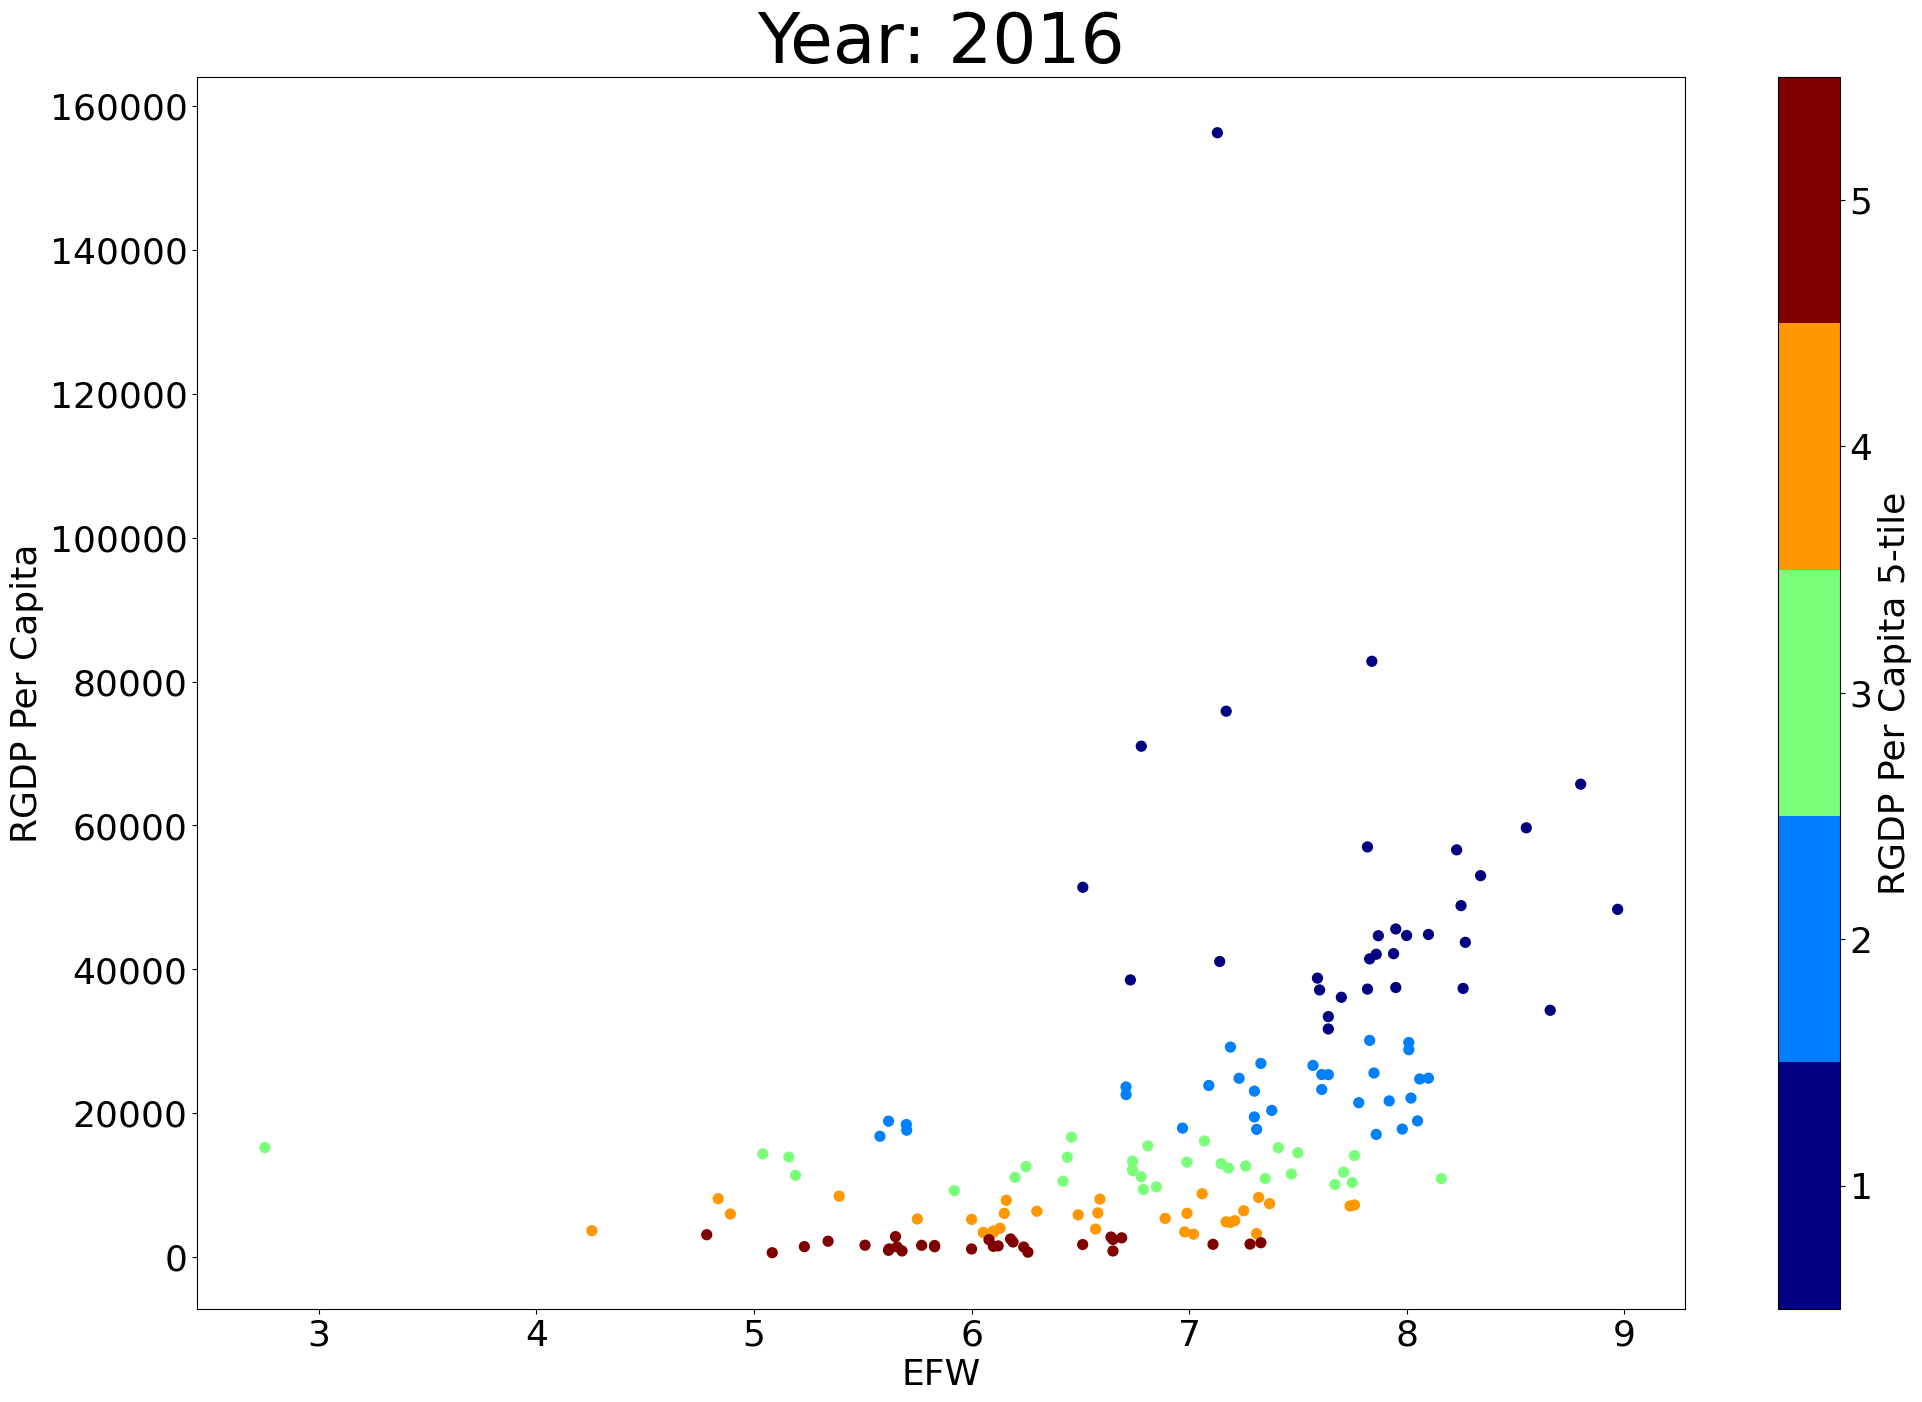

In [14]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2016
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
# change colors, divide into 5 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
# plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# set vmin to 0.5 to slight shift scale, otherwise quintile 
# measures will be on border between colors and 1 and 2 will be 
# indicated in lightblue
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                       cmap = cmap, 
                       ax = ax, s = 50,
                      legend = False, vmin = 0.5, vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 50)

### Lag Variables and Differenced Log Values

With time series data, it is often useful to control for trends when data is autocorrelated. Consider, for example, that real GDP data is often highly correlated with values from the previous period. We might detect a false causal relationship between two variables that are actually unrelated but follow a similar trend. For example, we might regress your age against real GDP and find that there is a strong correlation between the two. To avaoid false positives like this, it is useful to account for the influence of lagged values and/or to detrend the data all together by using differenced logs.

Creating lag variables is quite simple if the index is already recognized as containing dates and times. The method, *df.shift(n)* accomplishes this. Pass a negative value to create a lagged variable from n periods previous and a positive value to create a variable that refers to data n periods in the future.

Because we are using a double index, we must specify to which index we must instruct Pandas as to which index the shift refers. We accomplish this by using *.groupby(level)* to target the index column that does not refer to a datetime data. This will group the data by entity, thus leaving only the date column to be referenced by *.shift(n)*. Since we only want a lag value from the period that immediately preceded the observation, *n=-1*.

In [15]:
#logAndDifferenceData.py  
import pandas as pd  
import numpy as np  
import datetime  
  

data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code_3")\
    ["RGDP Per Capita"].shift(-1)


To understand what the command yielded, we will want to view data for an individual country. The following command will save *“RGDP Per Capita”* in the United States and the lag of that value to a csv file:

In [16]:
data.loc["USA", :]

ISO_Code_2 World Bank Region  \
Year                                      
1970-01-01         US     North America   
1975-01-01         US     North America   
1980-01-01         US     North America   
1985-01-01         US     North America   
1990-01-01         US     North America   
1995-01-01         US     North America   
2000-01-01         US     North America   
2001-01-01         US     North America   
2002-01-01         US     North America   
2003-01-01         US     North America   
2004-01-01         US     North America   
2005-01-01         US     North America   
2006-01-01         US     North America   
2007-01-01         US     North America   
2008-01-01         US     North America   
2009-01-01         US     North America   
2010-01-01         US     North America   
2011-01-01         US     North America   
2012-01-01         US     North America   
2013-01-01         US     North America   
2014-01-01         US     North America   
2015-01-01         US     North America   
2016-01-01         US     North America   
2017-01-01         US     North America   
2018-01-01         US     North America   
2019-01-01         US     North America   
2020-01-01         US     North America   

           World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Year                                                                                                                                              
1970-01-01                                                NaN                                                                                     
1975-01-01                                                NaN                                                                                     
1980-01-01                                                NaN                                                                                     
1985-01-01                                                NaN                                                                                     
1990-01-01                                                  H                                                                                     
1995-01-01                                                  H                                                                                     
2000-01-01                                                  H                                                                                     
2001-01-01                                                  H                                                                                     
2002-01-01                                                  H                                                                                     
2003-01-01                                                  H                                                                                     
2004-01-01                                                  H                                                                                     
2005-01-01                                                  H                                                                                     
2006-01-01                                                  H                                                                                     
2007-01-01                                                  H                                                                                     
2008-01-01                                                  H                                                                                     
2009-01-01                                                  H                                                                                     
2010-01-01                                                  H                                                        

Since not every year is included in the index, this actually results in false values for periods where observations are only available once every 5 years. If we use lagged values, we need to delimit the data to consecutive annual observations. Since consistent data is provided starting in the year 2000. To select data by year, we need to inicate that we wish to form selection criteria that refers to values form the year column in the index. The command *data.index.get_level_Values(“Year”)* calls these values. Once we execute the above script, we can call this command in the console.

In [17]:
data.index.get_level_values("Year").unique()

DatetimeIndex(['1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01',
               '1990-01-01', '1995-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

If we compare these values to the critierion specified, a column of boolean values will be generated that identifies where values from the index meet the specified criterion.

In [18]:
data.index.get_level_values("Year") >= datetime.datetime(1999, 1, 1)

array([False, False, False, ...,  True,  True,  True])

If we pass the command, *data.index.get_level_values("Year") > datetime.datetime(1999,1,1)*, to the dataframe, only observations that meet the criterion indicated will be included. In this case, any observation generated in years after 1999 will be included.

In [19]:
#logAndDifferenceData.py
# . . .
data = data[data.index.get_level_values("Year") > datetime.datetime(1999,1,1)]

Call *data* in the console to see that the range of dates included has narrowed, thereby removing the observations separated by 5 year intervals:

In [20]:
data

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        2000-01-01         AO  Sub-Saharan Africa   
           2001-01-01         AO  Sub-Saharan Africa   
           2002-01-01         AO  Sub-Saharan Africa   
           2003-01-01         AO  Sub-Saharan Africa   
           2004-01-01         AO  Sub-Saharan Africa   
...                          ...                 ...   
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        2000-01-01                                                  L                                                                                     
           2001-01-01                                                  L                                                                                     
           2002-01-01                                                  L                                                                                     
           2003-01-01                                                  L                                                                                     
           2004-01-01                                                 LM                                                                                     
...                                                                  ...                                                                                     
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        2000-01-01    Angola       NaN                 NaN   
           2001-01-01    Angola       NaN                 NaN   
           2002-01-01    Angola       NaN                 NaN   
           2003-01-01    Angola       NaN                 NaN   
           2004-01-01    Angola       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        2000-01-01                               NaN          NaN   
           2001-01-01                               NaN          NaN   
           2002-01-01                               NaN          NaN   
           2003-01-01           

The earliest dates included nowonly reach as far back as the year 2001. 

Now that we’ve delimited the data, let’s perform some other transformation that will help to prepare the data for a regression. It will be useful to log GDP values as the rate of growth of GDP measured in raw units tends to increase over time. By logging data, beta estimates will approximate the cross elasticity of the endogenous variable y with respect to a change in an exogenous variable x.

Since we have already created a lagged measure of real GDP, this is a good opportunitiy to use a for loop. We only want to log values referred to be a key that includes the string *“GDP”*. We check each key for inclusion of this term. If the term is included in the key, than we add a logged version of the variable. 


In [21]:
#logAndDifferenceData.py
# . . . 
for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\4263139723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Log " + key] = np.log(data[key])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\4263139723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Log " + key] = np.log(data[key])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\4263139723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

The data is almost prepared. We have only left to create data that has been diferenced. Differenced log values approximate the rate of change of a variable. Likewise, we can difference the index values to test for the effect of an improvement in a nation’s economic freedom score on the rate of GDP growth.

To difference data with a multi index, we must first organize the data so that observations are presented sequentially by entity. This uses the same command, .groupby(), that we used earlier to create a lag value. The result this time is that a new dataframe is created by taking the differenced values of all variables in the dataframe. 

We save the new results in a dictionary that holds both the original dataframe and the new dataframe with differenced data. 

Since it does not make sense to difference an indicator variable, we will reset the value of North America to 1.

In [22]:
data = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3", "Year"]).rename(columns = {"Summary":"EFW"})
del data["Standard Deviation of the 5 EFW Areas"]
diff_keys = list(data.keys())[-7:]
diff_keys

['EFW',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [23]:
#logAndDifferenceData.py
# We do not want to difference the index values, only the Real GDP values  
# so initialize the diff data as the dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)
diff_index = data[diff_keys].groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data[data.index.get_level_values("Year")>1999]
data_dict["Data"]["RGDP Per Capita"] = np.log(data_dict["Data"]["RGDP Per Capita"]).groupby("ISO_Code_3").diff()
data_dict["Diff Data"] = data_dict["Data"]
data_dict["Diff Data"][diff_keys] = data_dict["Diff Data"][diff_keys].groupby(level=0).diff(-1)  
data_dict["Diff Data"]["North America"] = 1
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1590869758.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict["Data"]["RGDP Per Capita"] = np.log(data_dict["Data"]["RGDP Per Capita"]).groupby("ISO_Code_3").diff()
C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1590869758.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict["Diff Data"][diff_keys] = data_dict["Diff Data"][diff_keys].groupby(level=0).diff(-1)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1590869758.py:11: SettingW

Now let's check the data that we saved as data_dict["Diff Data"]

In [24]:
data_dict["Data"].dropna().loc["USA"]

ISO_Code_2 World Bank Region  \
Year                                
2001         US     North America   
2002         US     North America   
2003         US     North America   
2004         US     North America   
2005         US     North America   
2006         US     North America   
2007         US     North America   
2008         US     North America   
2009         US     North America   
2010         US     North America   
2011         US     North America   
2012         US     North America   
2013         US     North America   
2014         US     North America   
2015         US     North America   
2016         US     North America   
2017         US     North America   

     World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Year                                                                                                                                        
2001                                                  H                                                                                     
2002                                                  H                                                                                     
2003                                                  H                                                                                     
2004                                                  H                                                                                     
2005                                                  H                                                                                     
2006                                                  H                                                                                     
2007                                                  H                                                                                     
2008                                                  H                                                                                     
2009                                                  H                                                                                     
2010                                                  H                                                                                     
2011                                                  H                                                                                     
2012                                                  H                                                                                     
2013                                                  H                                                                                     
2014                                                  H                                                                                     
2015                                                  H                                                                                     
2016                                                  H                                                                                     
2017                                                  H                                                                                     

          Countries       EFW  Size of Government  \
Year                                                
2001  United States -0.059573           -0.152217   
2002  United States  0.009929           -0.192747   
2003  United States -0.059573           -0.204994   
2004  United States  0.108967            0.178444   
2005  United States  0.000000            0.021107   
2006  United States -0.019975            0.047304   
2007  United States  0.199749            0.549849   
2008  United States  0.279649            0.625165   
2009  United States -0.089887           -0.377692   
2010  United States -0.019975         

Notice that there exist no data for the first year of observations. Without a previous year to draw from for the year 1999, the pandas dataframe is left blank for differenced values in this year.

### Using Indicator Variables in Regression
Using the function created above, we can prepare indicator and quantile variables to be used in a regression. As before, the a regression follows the same form as a standard multiple regression with continuous exogenous variables, but also include a parameter, α_k, for each indicator or quantile variables.

$y_i = \beta_0 + \sum_{j=1}^{n} \beta_jx_{j,i} + \sum_{k=1}^{m} \alpha_kx_{k,i} + e_i$

For both cases, we can use the regression method that we created last class. We begin with use of indicator variables in regression. An indicator variable accounts for a level effect that is attributed to a predicted value due to an attribute of the observation. Suppose that we wanted to measure whether or not there is an effect of gender on wages in a particular field once all other relevant factors are accounted for. Observations where the wage earner is a woman would be indicated with a one. The beta value estimated by a regression would indicate the effect of gender on wage given the control variables included in the regression.

We can perform a similar regression by identifying the effect of being a nation in North America on real GDP per capita of countries residing on the continent. In reality, this is actually a poor indicator variable, but we can expand our computational toolbelt by creating an indicator variable that identifies countries in North America and by including this variable in a regression. We will see that the creation of indicator variables is fundamental to the panel regression.

In [25]:
#indicatorAndDiffRegression.py
import pandas as pd  
import numpy as np  
import datetime  
  
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        

# Create indicator variable for North Amierca in both data and diff_data  
indicator_name = "North America"  
index_name = "ISO_Code_3"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)  

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\2849958333.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicator_name] = 0


As in the earlier example, we have created indicator variables. Notice that the created are not differenced even in the dataframe with differenced data. We  will be using these values in regressions where the estimated value is either logged or log-differenced. In the first case, the indicator variable will effect the level estimated. In the second case, the indicator variable influences an estimated rate.

We’ve left to estimate regression using data from each dataframe. We will estimate the impact of economic freedom (*“SUMMARY INDEX”*) on Real GDP Per Capita. To control for autocorrelation, we include the lag of Real GDP Per Capita. To run the regression once for each dataframe in data_dict, we use a for loop that cycles through the keys in data_dict. We print the statistics for the estimated beta values as well as statistics that describe the results of the regression overall. The key is also printed to identify each set of results.

In [26]:
data_dict[key]

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                  
AGO        2005         AO  Sub-Saharan Africa   
           2006         AO  Sub-Saharan Africa   
           2007         AO  Sub-Saharan Africa   
           2008         AO  Sub-Saharan Africa   
           2009         AO  Sub-Saharan Africa   
...                    ...                 ...   
ZWE        2013         ZW  Sub-Saharan Africa   
           2014         ZW  Sub-Saharan Africa   
           2015         ZW  Sub-Saharan Africa   
           2016         ZW  Sub-Saharan Africa   
           2017         ZW  Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
AGO        2005                                                 LM                                                                                     
           2006                                                 LM                                                                                     
           2007                                                 LM                                                                                     
           2008                                                 LM                                                                                     
           2009                                                 LM                                                                                     
...                                                            ...                                                                                     
ZWE        2013                                                  L                                                                                     
           2014                                                  L                                                                                     
           2015                                                  L                                                                                     
           2016                                                  L                                                                                     
           2017                                                  L                                                                                     

                Countries       EFW  Size of Government  \
ISO_Code_3 Year                                           
AGO        2005    Angola -0.316589            1.724034   
           2006    Angola -0.019787            0.198601   
           2007    Angola -0.092667            0.248087   
           2008    Angola -0.607482           -2.739912   
           2009    Angola -0.169713            1.144523   
...                   ...       ...                 ...   
ZWE        2013  Zimbabwe -0.481160           -0.077385   
           2014  Zimbabwe -0.450448           -0.192946   
           2015  Zimbabwe  0.327598            1.632156   
           2016  Zimbabwe  0.522110            0.632754   
           2017  Zimbabwe -0.276411           -0.471103   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2005                         -0.108695    -2.537185   
           2006                          0.013807    -0.208030   
           2007                         -0.158135    -0.637904   
           2008                         -0.011873    -0.248340   
           2009                         -0.179393    -0.840779   
...                                           ...          ...   
ZWE        2013                         -0.067423    -1.276724   
           2014           

In [27]:
data_dict[key].dropna()

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                  
AGO        2005         AO  Sub-Saharan Africa   
           2006         AO  Sub-Saharan Africa   
           2007         AO  Sub-Saharan Africa   
           2008         AO  Sub-Saharan Africa   
           2009         AO  Sub-Saharan Africa   
...                    ...                 ...   
ZWE        2013         ZW  Sub-Saharan Africa   
           2014         ZW  Sub-Saharan Africa   
           2015         ZW  Sub-Saharan Africa   
           2016         ZW  Sub-Saharan Africa   
           2017         ZW  Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
AGO        2005                                                 LM                                                                                     
           2006                                                 LM                                                                                     
           2007                                                 LM                                                                                     
           2008                                                 LM                                                                                     
           2009                                                 LM                                                                                     
...                                                            ...                                                                                     
ZWE        2013                                                  L                                                                                     
           2014                                                  L                                                                                     
           2015                                                  L                                                                                     
           2016                                                  L                                                                                     
           2017                                                  L                                                                                     

                Countries       EFW  Size of Government  \
ISO_Code_3 Year                                           
AGO        2005    Angola -0.316589            1.724034   
           2006    Angola -0.019787            0.198601   
           2007    Angola -0.092667            0.248087   
           2008    Angola -0.607482           -2.739912   
           2009    Angola -0.169713            1.144523   
...                   ...       ...                 ...   
ZWE        2013  Zimbabwe -0.481160           -0.077385   
           2014  Zimbabwe -0.450448           -0.192946   
           2015  Zimbabwe  0.327598            1.632156   
           2016  Zimbabwe  0.522110            0.632754   
           2017  Zimbabwe -0.276411           -0.471103   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2005                         -0.108695    -2.537185   
           2006                          0.013807    -0.208030   
           2007                         -0.158135    -0.637904   
           2008                         -0.011873    -0.248340   
           2009                         -0.179393    -0.840779   
...                                           ...          ...   
ZWE        2013                         -0.067423    -1.276724   
           2014           

In [28]:
#indicatorRegressoin.py
# . . . 
import statsmodels.api as sm
# . . . 
# prepare regression variables  
X_names = ["EFW"]  
y_name = ["RGDP Per Capita"]  

# save instance of regression class  
for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name]    # call OLS method  
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.275
Date:                Thu, 20 Apr 2023   Prob (F-statistic):             0.0705
Time:                        10:49:09   Log-Likelihood:                 3827.6
No. Observations:                2335   AIC:                            -7651.
Df Residuals:                    2333   BIC:                            -7640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EFW            0.0108      0.006      1.810    

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\851168413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\851168413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


Let's create an EFW Lag variable and see if past observations of EFW improve the fit of the regression.

We can check if the indicator variable, *“North America”*, adds any explanatory value by adding the variable to this regression. Only line 43 is changed by this addition.

In [29]:
# . . .
X_names = ["EFW", "EFW Lag",  "North America"]
# . . .
for key in data_dict:  
    reg_data = data_dict[key]
    reg_data["EFW Lag"] = reg_data["EFW"].groupby("ISO_Code_3").diff()
    reg_data.dropna(inplace = True)
    X = reg_data[X_names]
#     X["Constant"] = 1
    Y = reg_data[y_name]    # call OLS method  
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                                 OLS Regression Results                                
Dep. Variable:        RGDP Per Capita   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.391
Date:                Thu, 20 Apr 2023   Prob (F-statistic):                       0.244
Time:                        10:49:09   Log-Likelihood:                          3844.9
No. Observations:                2304   AIC:                                     -7684.
Df Residuals:                    2301   BIC:                                     -7667.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\3291205452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["EFW Lag"] = reg_data["EFW"].groupby("ISO_Code_3").diff()
C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\3291205452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data.dropna(inplace = True)


In [30]:
data_dict["Diff Data"]

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                  
AGO        2006         AO  Sub-Saharan Africa   
           2007         AO  Sub-Saharan Africa   
           2008         AO  Sub-Saharan Africa   
           2009         AO  Sub-Saharan Africa   
           2010         AO  Sub-Saharan Africa   
...                    ...                 ...   
ZWE        2013         ZW  Sub-Saharan Africa   
           2014         ZW  Sub-Saharan Africa   
           2015         ZW  Sub-Saharan Africa   
           2016         ZW  Sub-Saharan Africa   
           2017         ZW  Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
AGO        2006                                                 LM                                                                                     
           2007                                                 LM                                                                                     
           2008                                                 LM                                                                                     
           2009                                                 LM                                                                                     
           2010                                                 LM                                                                                     
...                                                            ...                                                                                     
ZWE        2013                                                  L                                                                                     
           2014                                                  L                                                                                     
           2015                                                  L                                                                                     
           2016                                                  L                                                                                     
           2017                                                  L                                                                                     

                Countries       EFW  Size of Government  \
ISO_Code_3 Year                                           
AGO        2006    Angola -0.019787            0.198601   
           2007    Angola -0.092667            0.248087   
           2008    Angola -0.607482           -2.739912   
           2009    Angola -0.169713            1.144523   
           2010    Angola  0.419291            0.154738   
...                   ...       ...                 ...   
ZWE        2013  Zimbabwe -0.481160           -0.077385   
           2014  Zimbabwe -0.450448           -0.192946   
           2015  Zimbabwe  0.327598            1.632156   
           2016  Zimbabwe  0.522110            0.632754   
           2017  Zimbabwe -0.276411           -0.471103   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2006                          0.013807    -0.208030   
           2007                         -0.158135    -0.637904   
           2008                         -0.011873    -0.248340   
           2009                         -0.179393    -0.840779   
           2010                          0.044856    -0.000929   
...                                           ...          ...   
ZWE        2013                         -0.067423    -1.276724   
           2014           

Neither of regression yield an estimate for the indicator variable that is 1) statistically significant or 2) that significantly improves the goodness-of-fit (r\*\*2). In fact, the f-statistic and adjusted r-squared values have both fallen for the second set of regressions. It appears that inclusion of a control for North American countries does not improve the regression. 

### Panel Regression
The indicator variable plays a key role in a very popular regression within economics: the panel (or fixed effects) regression. A panel regression is an OLS regression that includes an indicator variable for  attributes defined in one or both index columns. Conventiently, the panel regression is often used to control for effects between different political units – i.e., cities, states, nations, etc.... Using the data from the previous examples, we will run a panel regression with fixed effects for each nation. We regress the data over time, holding constant a level effect provided by the unique indicator variable associated with each nation. The indicator variables that drive results in the panel regression adjust the y-intercept indicated by the constant β0 with a unique adjustment for each state.

We will use the module *linearmodels*, an extension of statsmodels, to run panel regression to improve the fit of the model. 

Since the index includes includes both *“Year”* and *“ISO_Code”*, we must select which type of fixed effect the regression will employ. We create the regression to allow for entity fixed effects, time fixed effects, or both, in a single regression. 

First install the *linearmodels* library

In [31]:
!pip install linearmodels

Defaulting to user installation because normal site-packages is not writeable


After installation, run the regression from Project 8 to see if the fit of the regression is improved. 

In [32]:
data_dict

{'Data':                 ISO_Code_2   World Bank Region  \
 ISO_Code_3 Year                                  
 AGO        2006         AO  Sub-Saharan Africa   
            2007         AO  Sub-Saharan Africa   
            2008         AO  Sub-Saharan Africa   
            2009         AO  Sub-Saharan Africa   
            2010         AO  Sub-Saharan Africa   
 ...                    ...                 ...   
 ZWE        2013         ZW  Sub-Saharan Africa   
            2014         ZW  Sub-Saharan Africa   
            2015         ZW  Sub-Saharan Africa   
            2016         ZW  Sub-Saharan Africa   
            2017         ZW  Sub-Saharan Africa   
 
                 World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
 ISO_Code_3 Year                                                                                                                                        
 AGO        2006     

Data
Entity = True
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0181
Estimator:                   PanelOLS   R-squared (Between):             -0.0935
No. Observations:                2304   R-squared (Within):               0.0138
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0123
Time:                        10:49:14   Log-likelihood                    4077.0
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7.8710
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.964   Distribution:                  F(5,2131)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):            

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1571313795.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


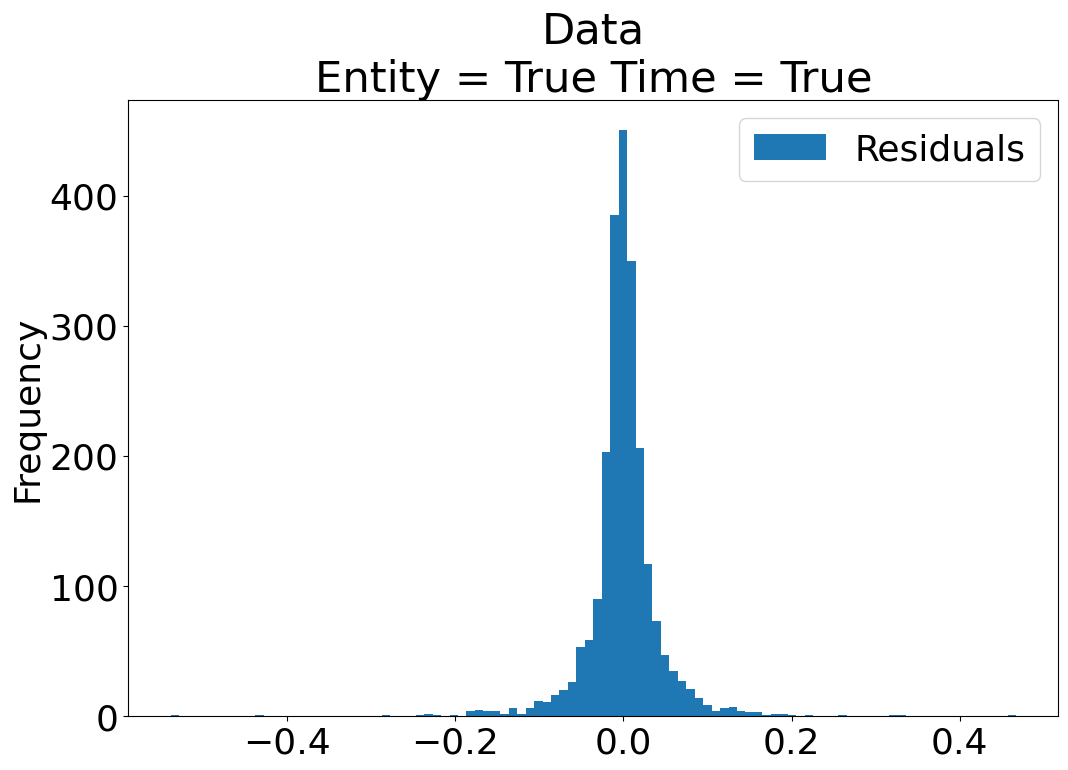

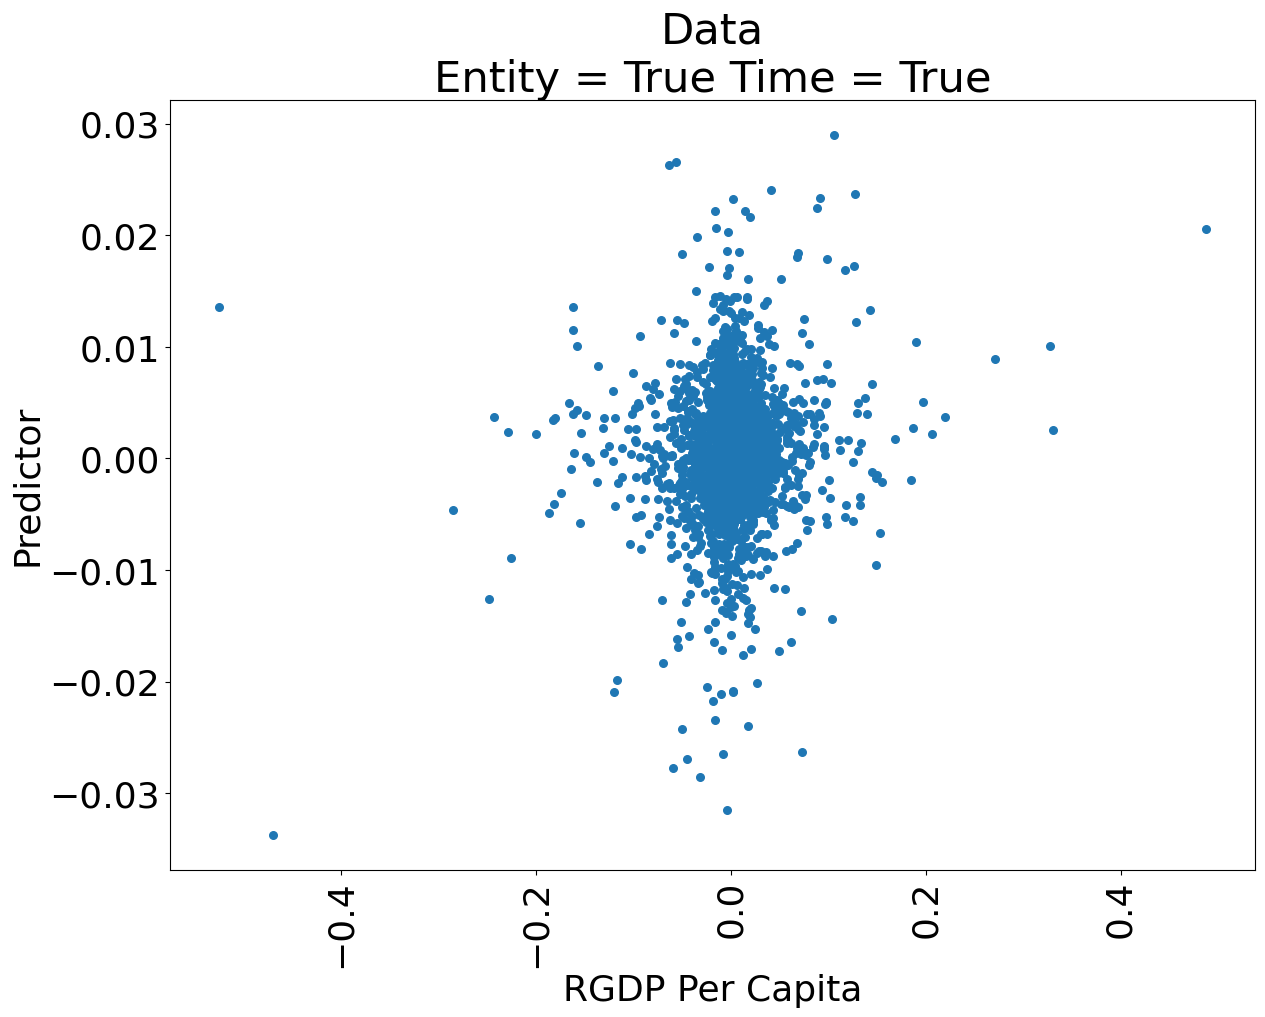

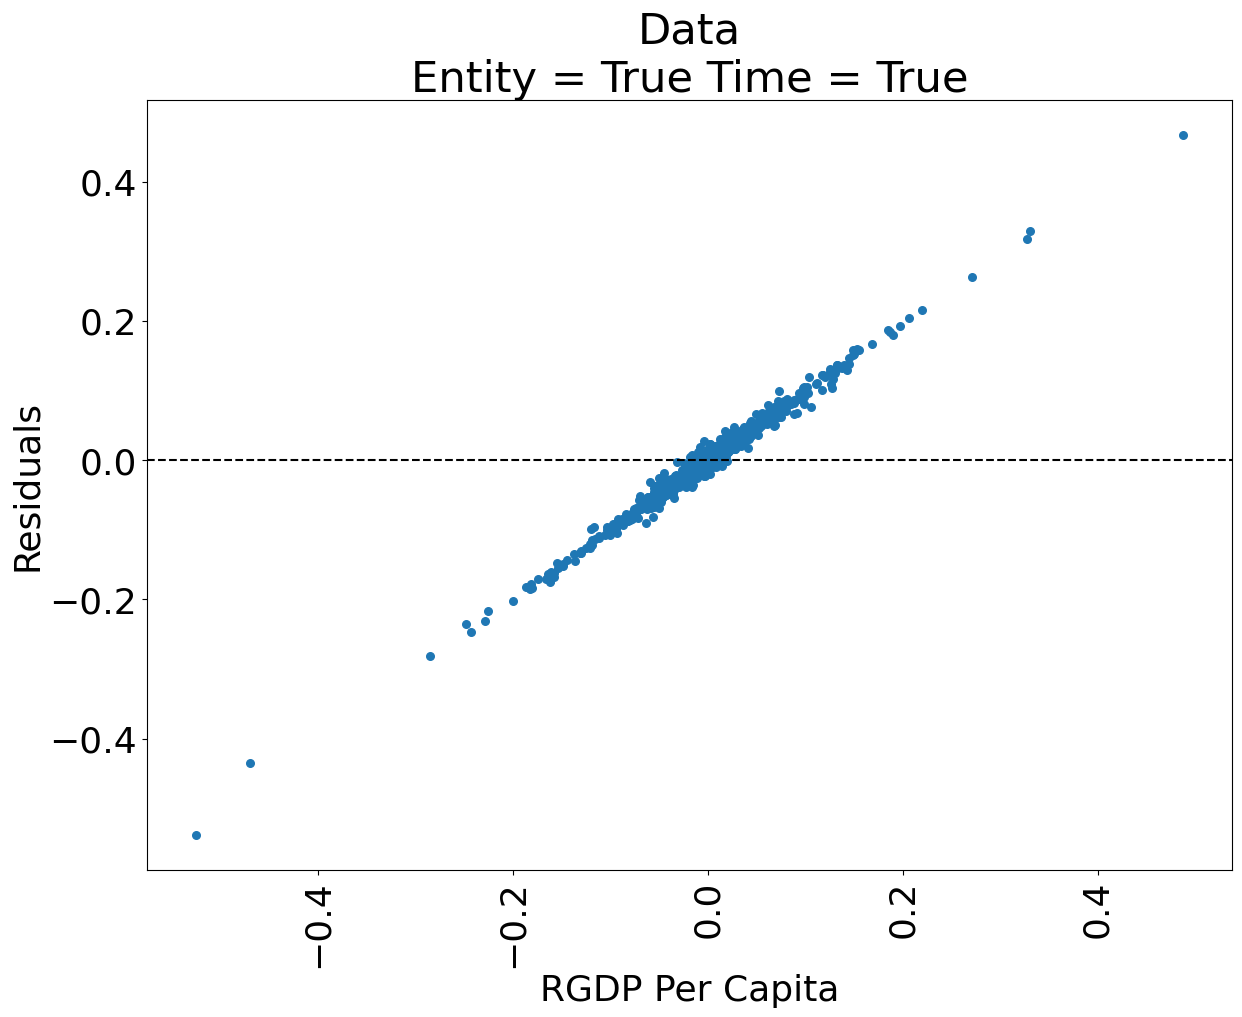

Data
Entity = True
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0151
Estimator:                   PanelOLS   R-squared (Between):             -0.1121
No. Observations:                2304   R-squared (Within):               0.0151
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0134
Time:                        10:49:14   Log-likelihood                    3882.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.5896
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.964   Distribution:                  F(5,2147)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):           

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1571313795.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


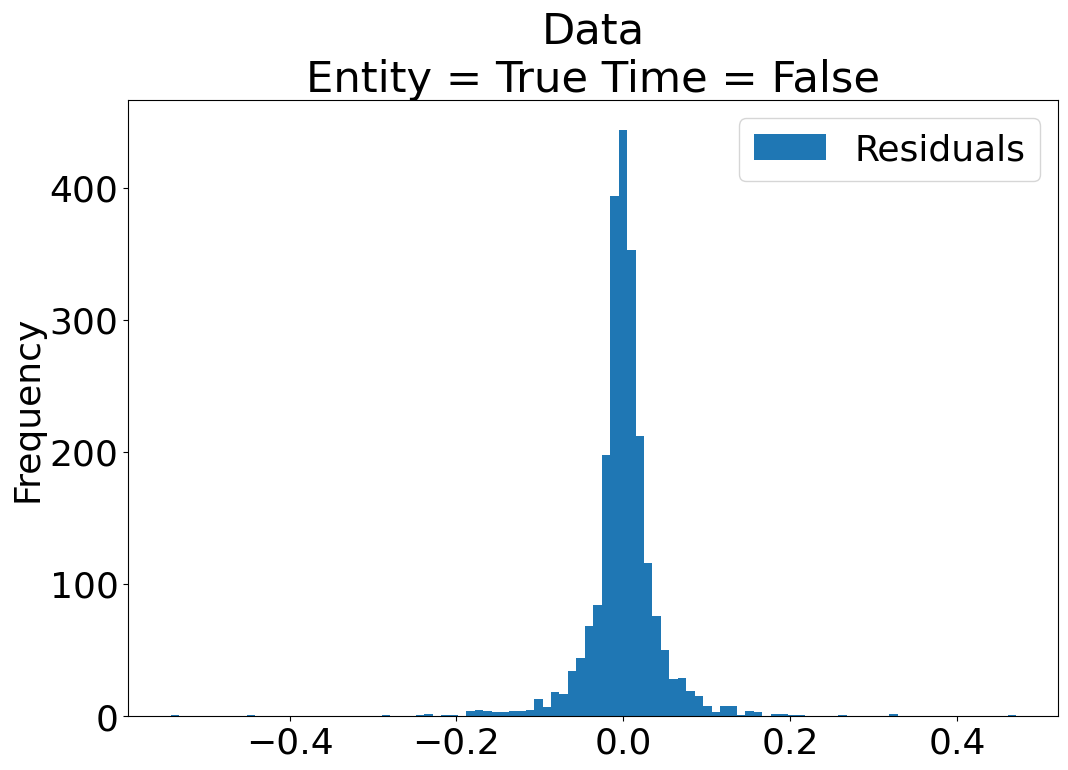

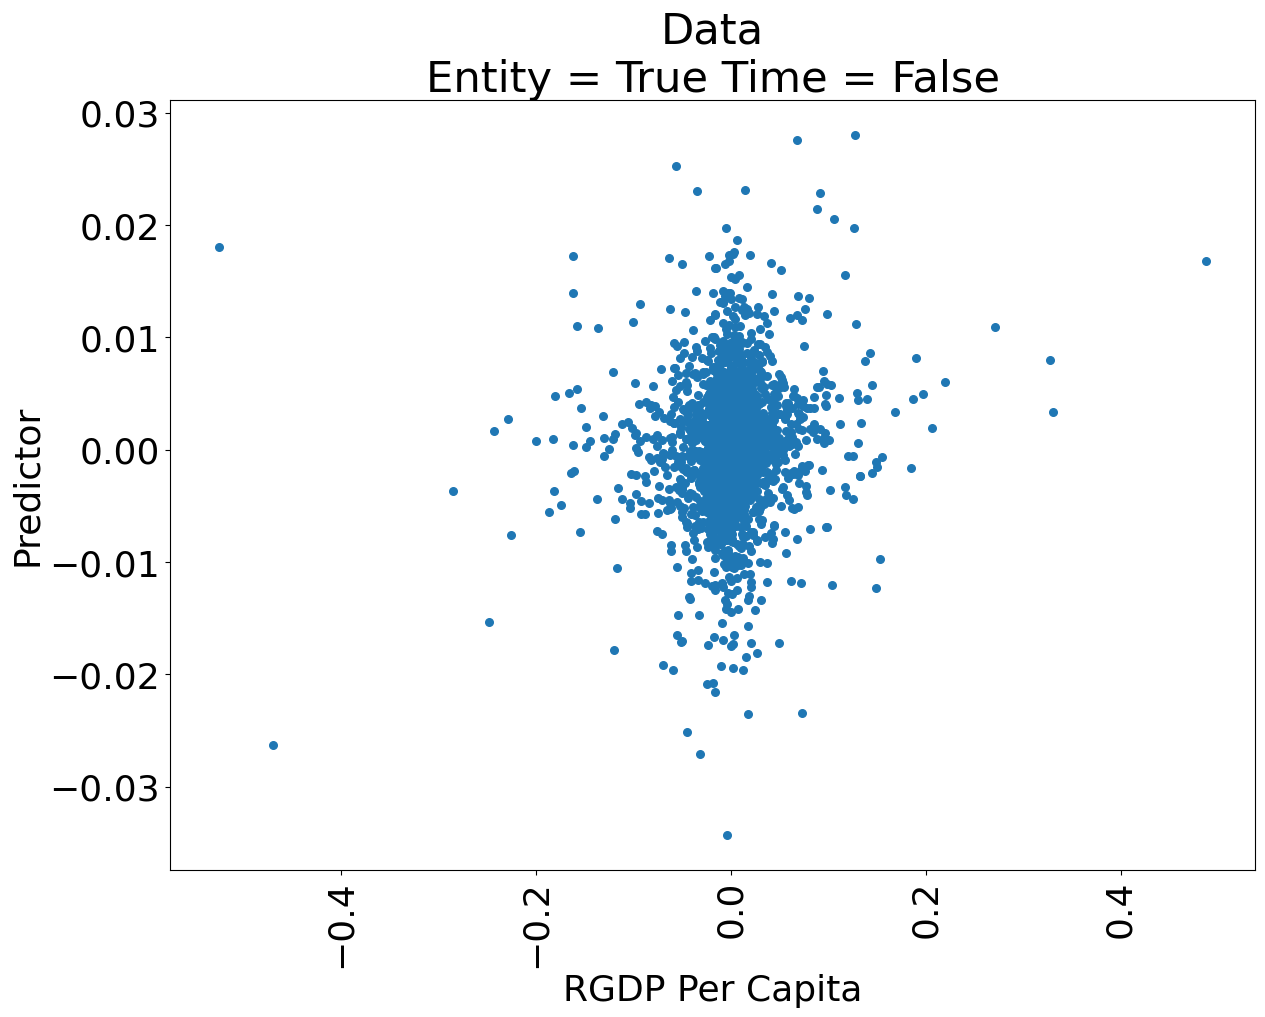

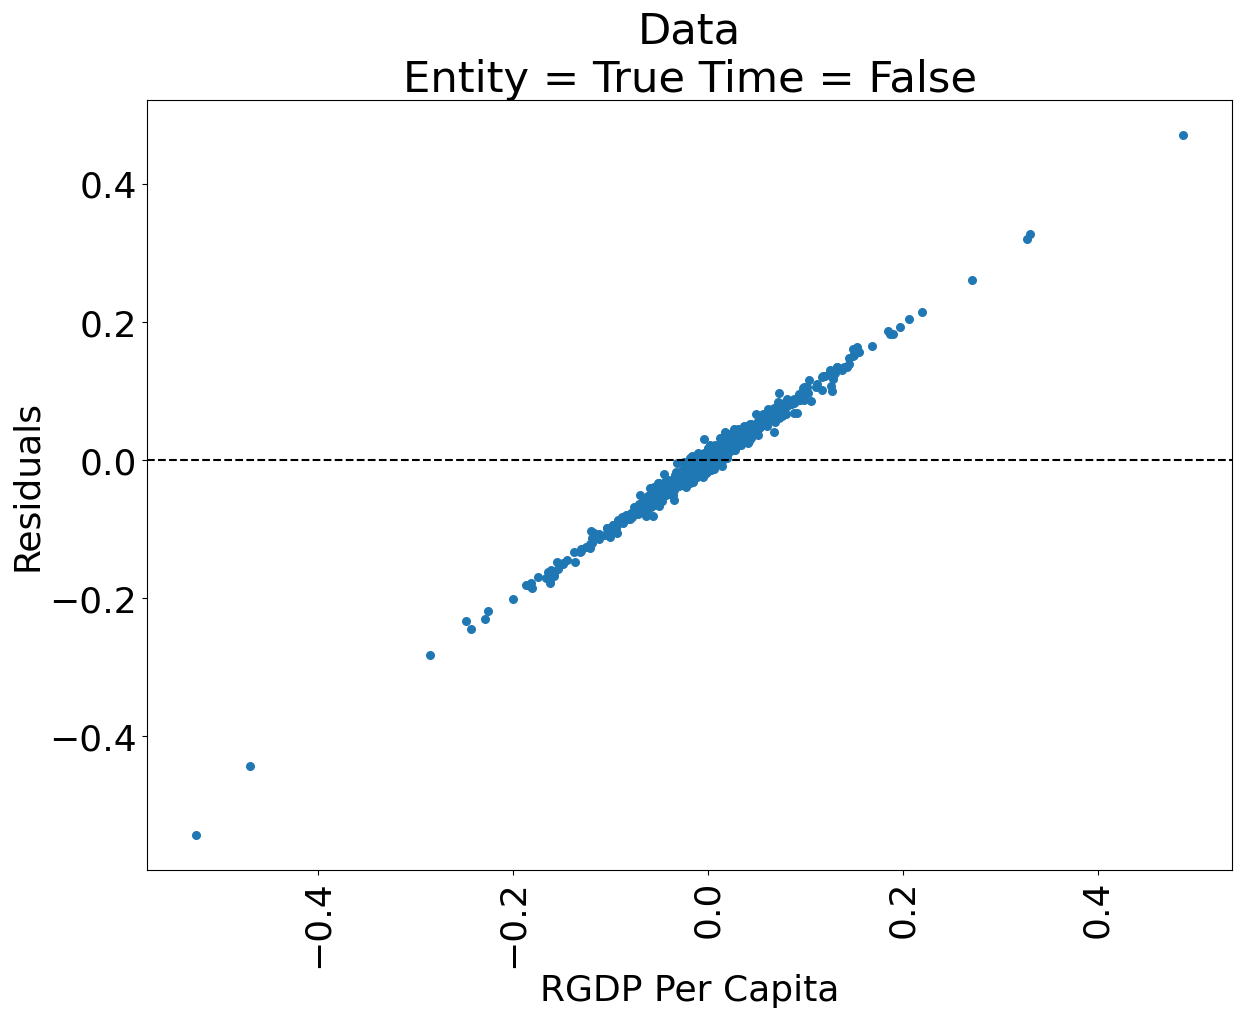

Data
Entity = False
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0166
Estimator:                   PanelOLS   R-squared (Between):             -0.0721
No. Observations:                2304   R-squared (Within):               0.0135
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0123
Time:                        10:49:15   Log-likelihood                    4050.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7.6895
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.964   Distribution:                  F(5,2282)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):           

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1571313795.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


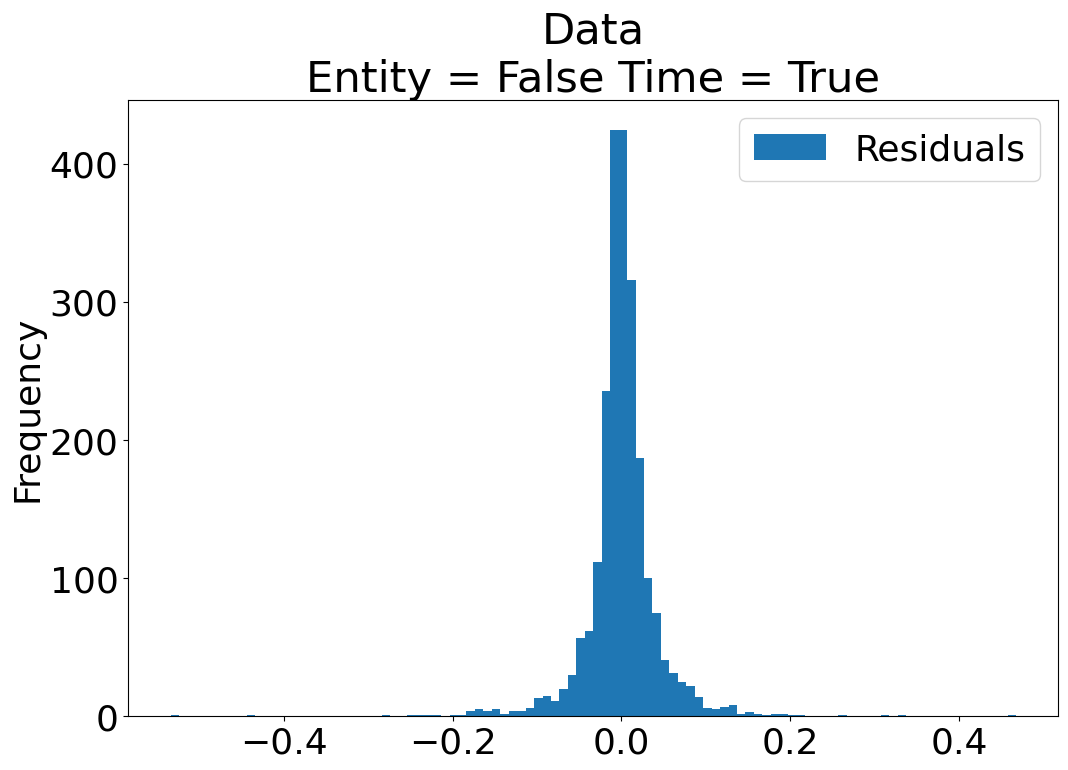

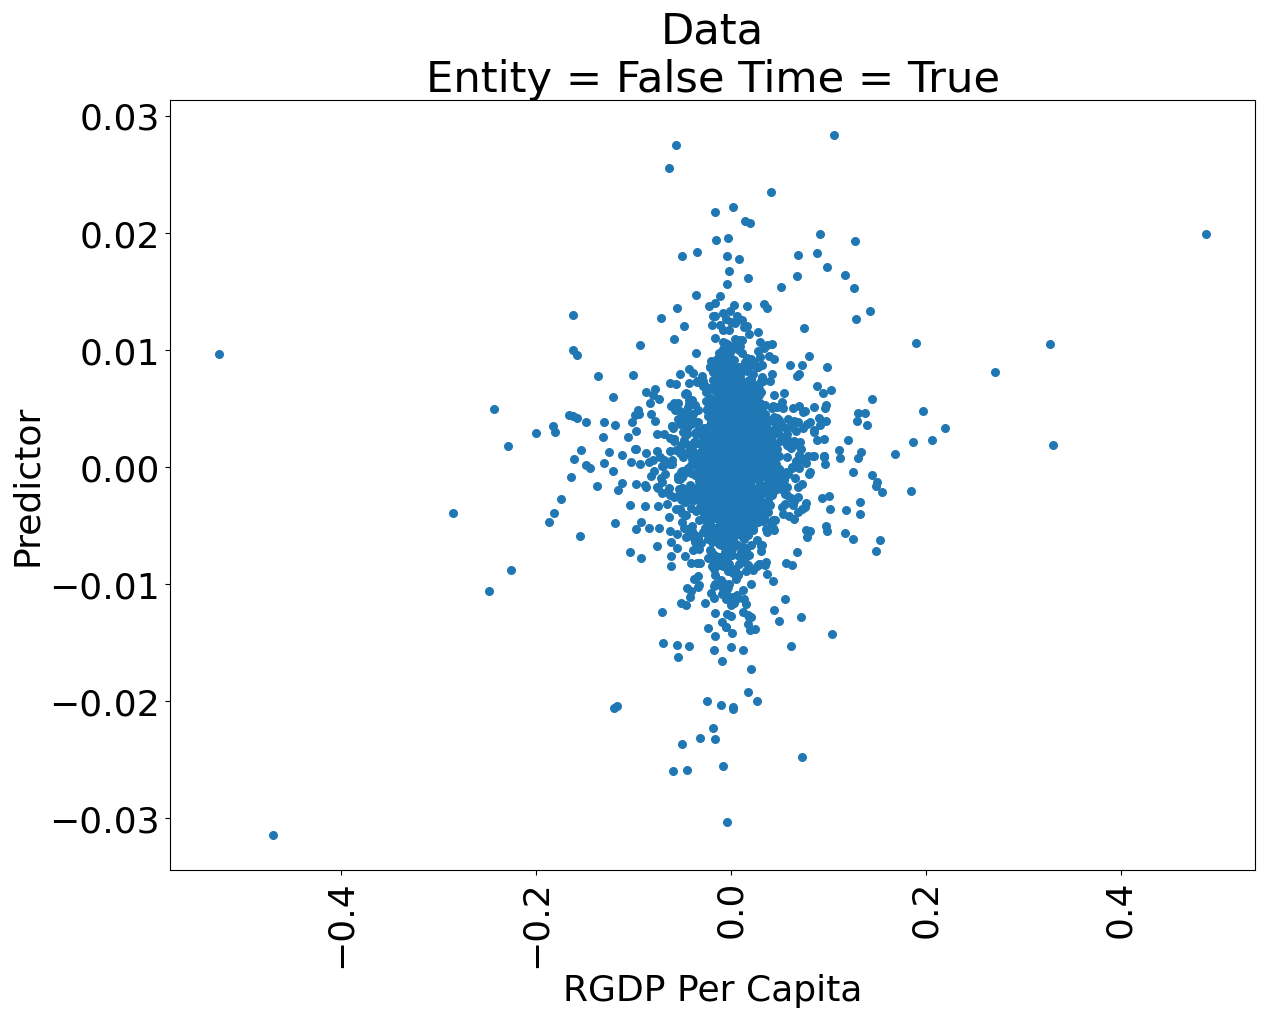

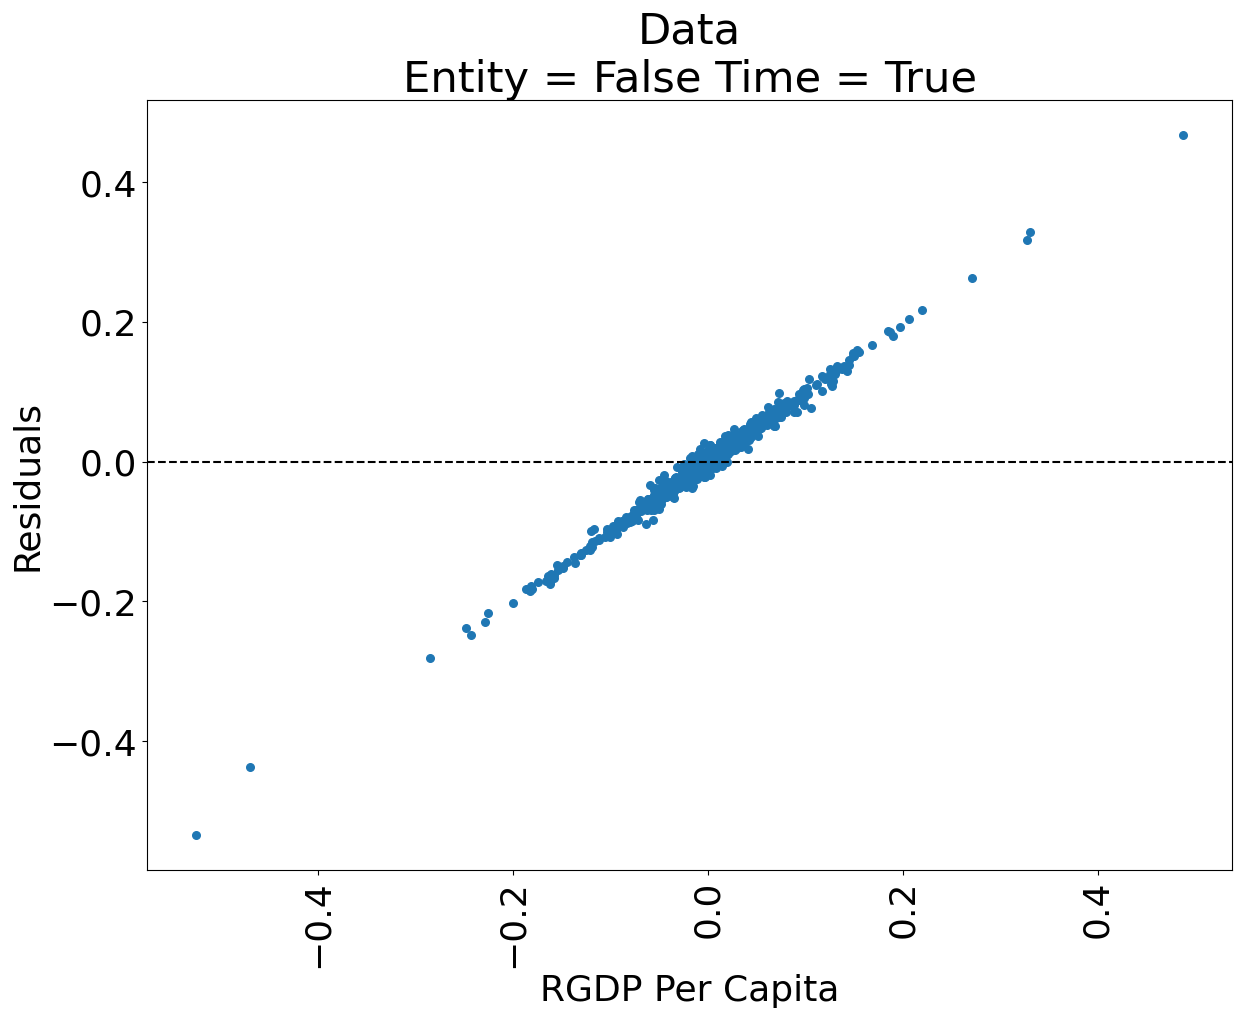

Data
Entity = False
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0136
Estimator:                   PanelOLS   R-squared (Between):             -0.0887
No. Observations:                2304   R-squared (Within):               0.0149
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0136
Time:                        10:49:15   Log-likelihood                    3858.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.3170
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.964   Distribution:                  F(5,2298)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):          

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1571313795.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


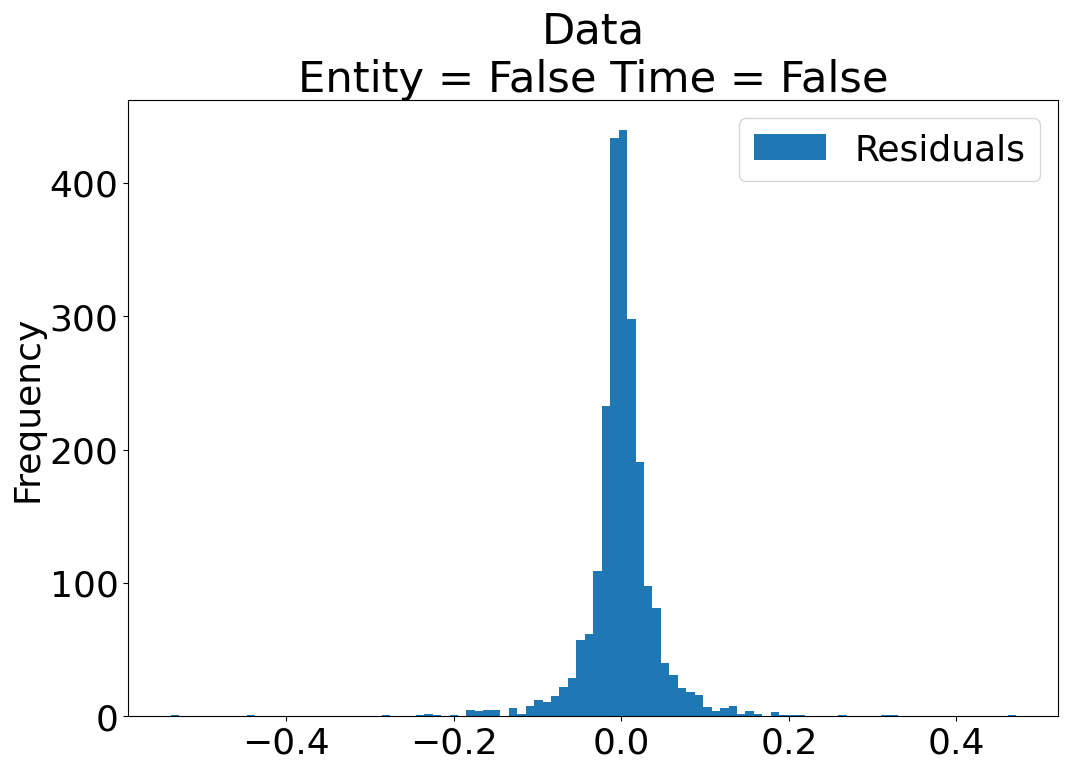

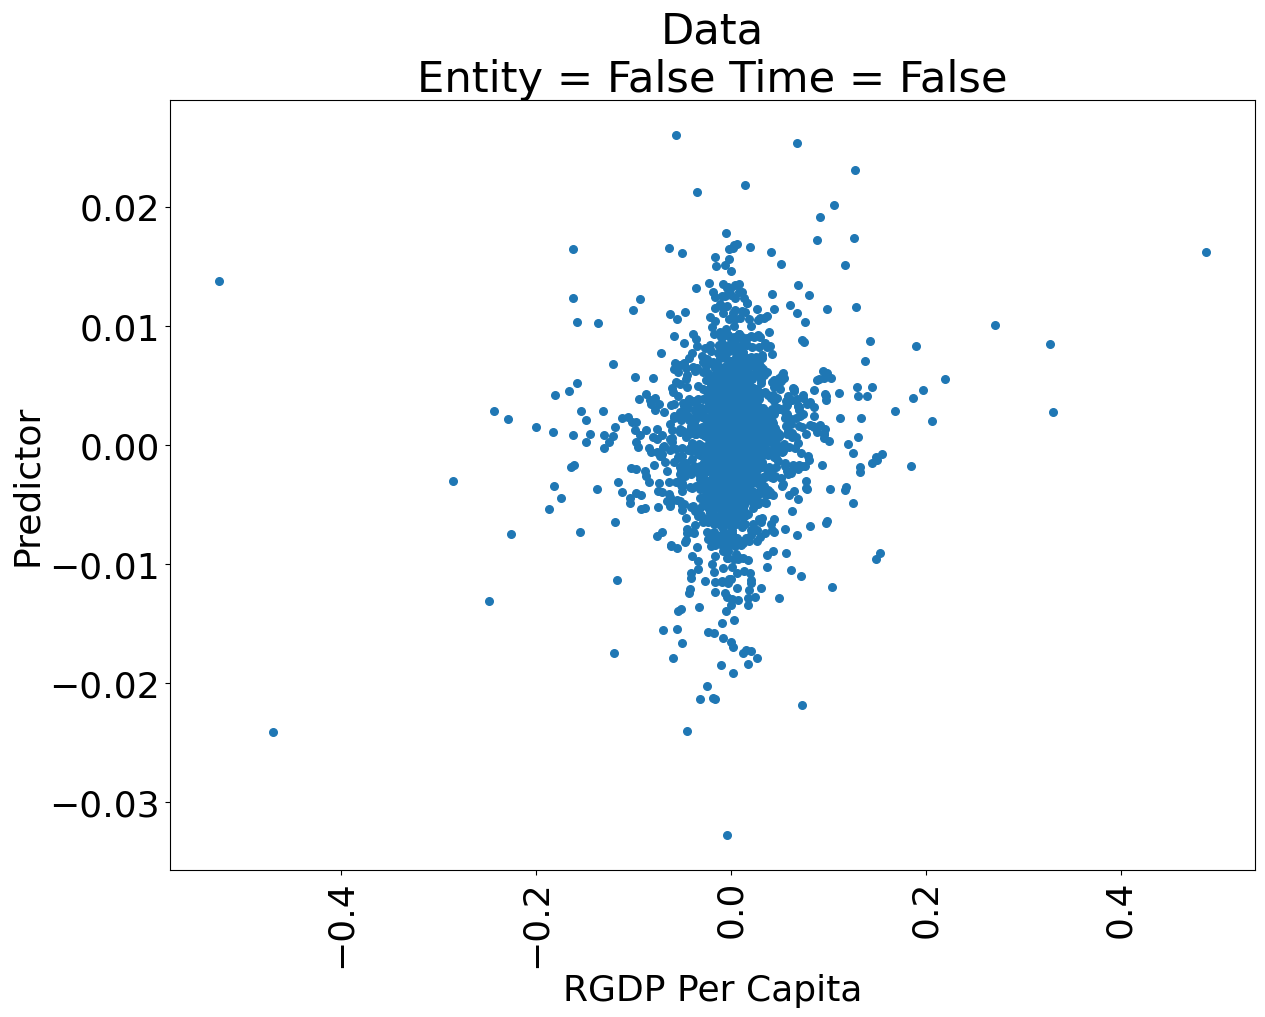

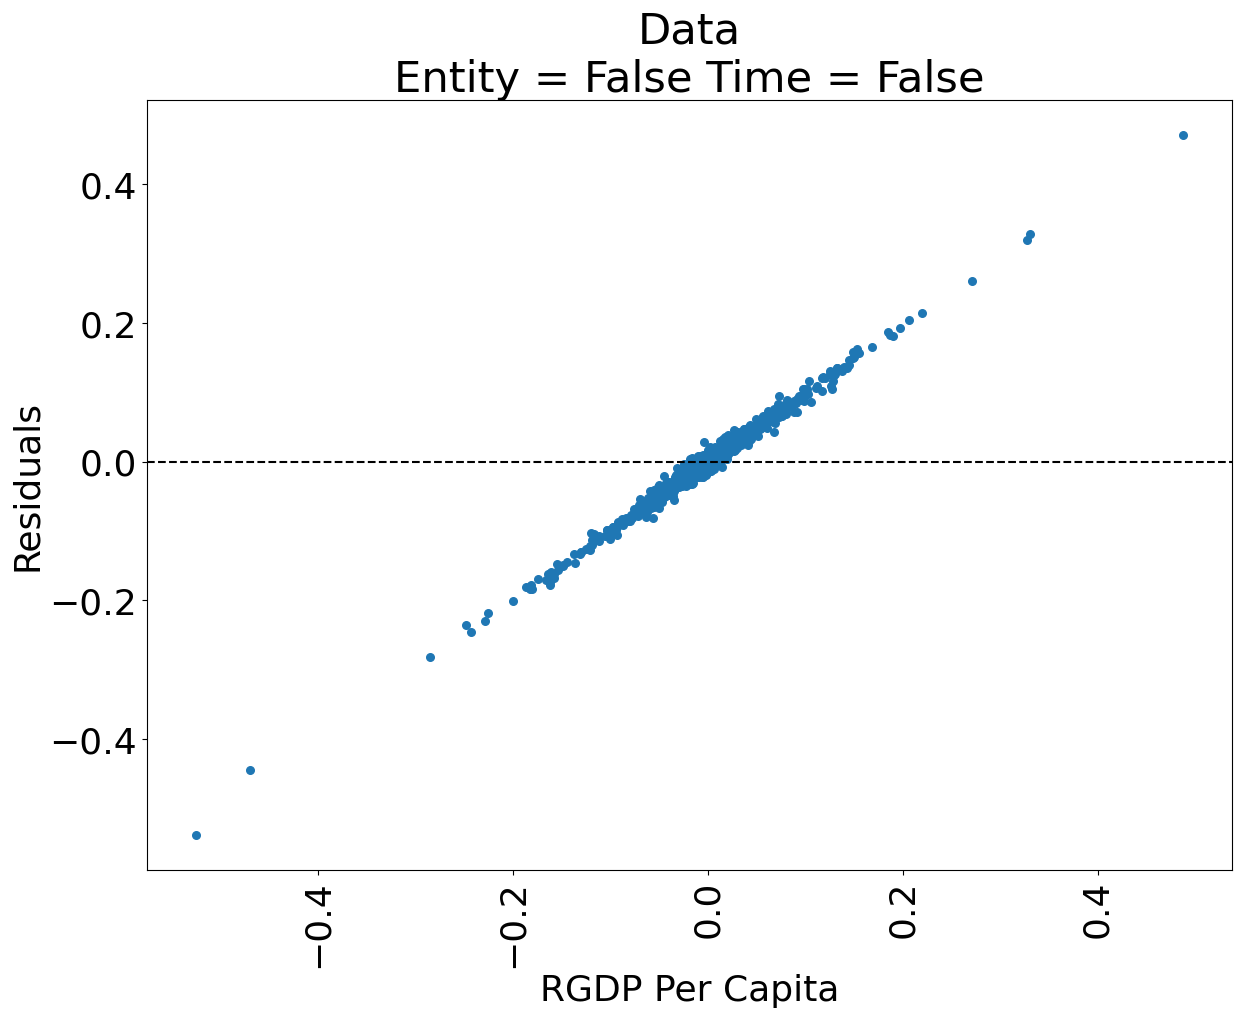

Diff Data
Entity = True
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0179
Estimator:                   PanelOLS   R-squared (Between):             -0.0894
No. Observations:                2183   R-squared (Within):               0.0132
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0119
Time:                        10:49:16   Log-likelihood                    3858.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7.3292
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.230   Distribution:                  F(5,2011)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust):  

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1571313795.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


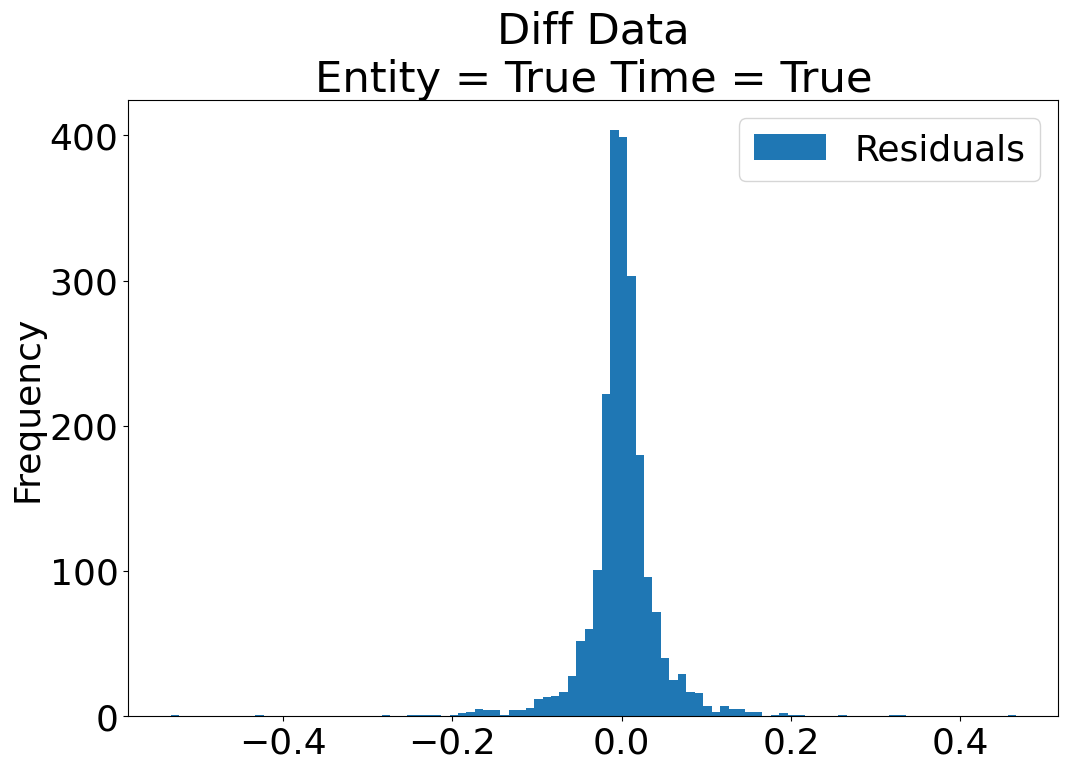

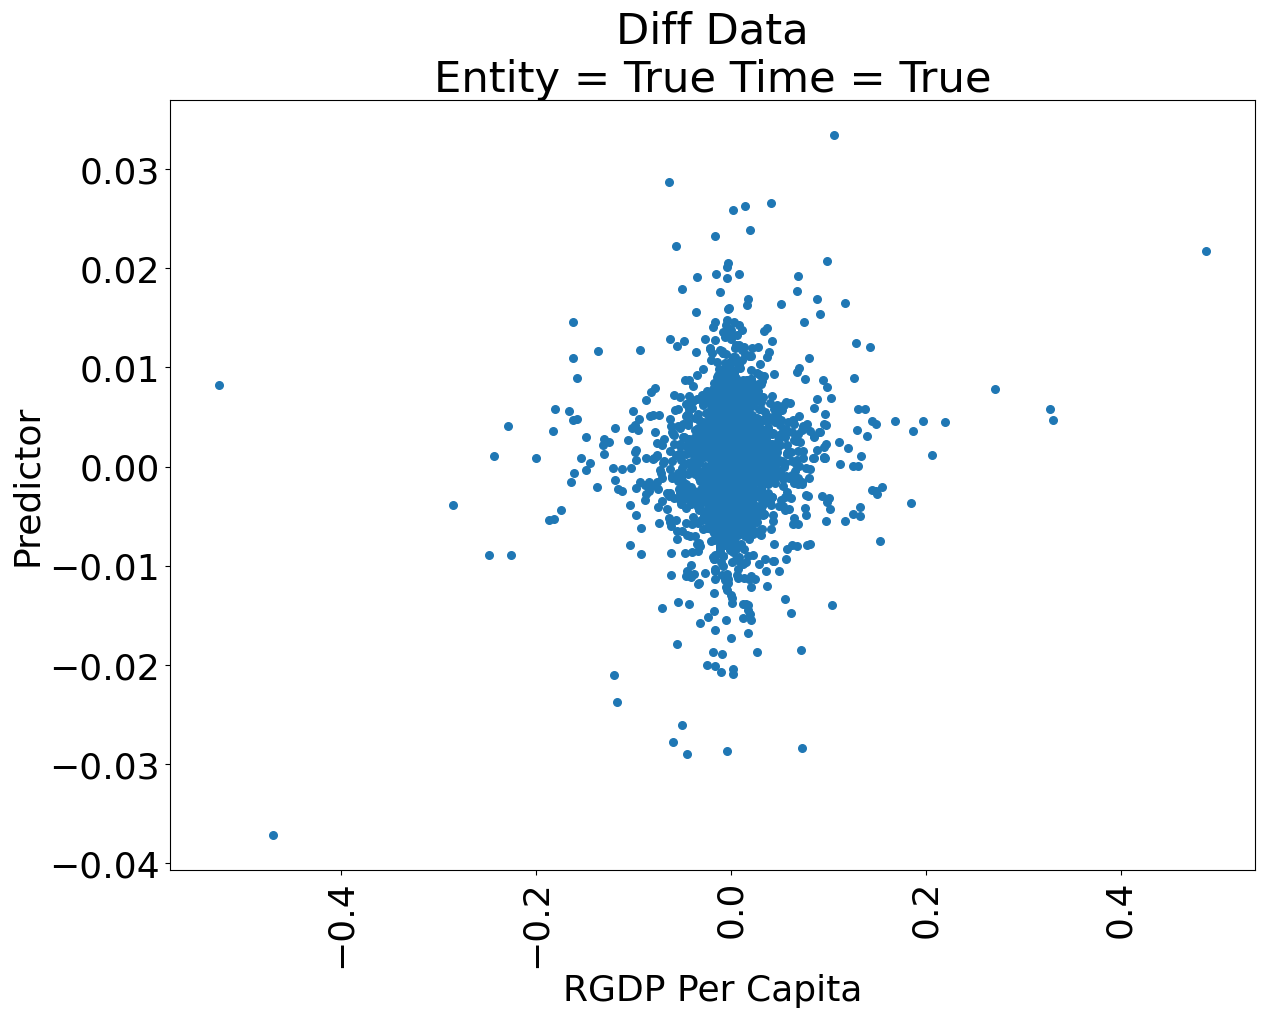

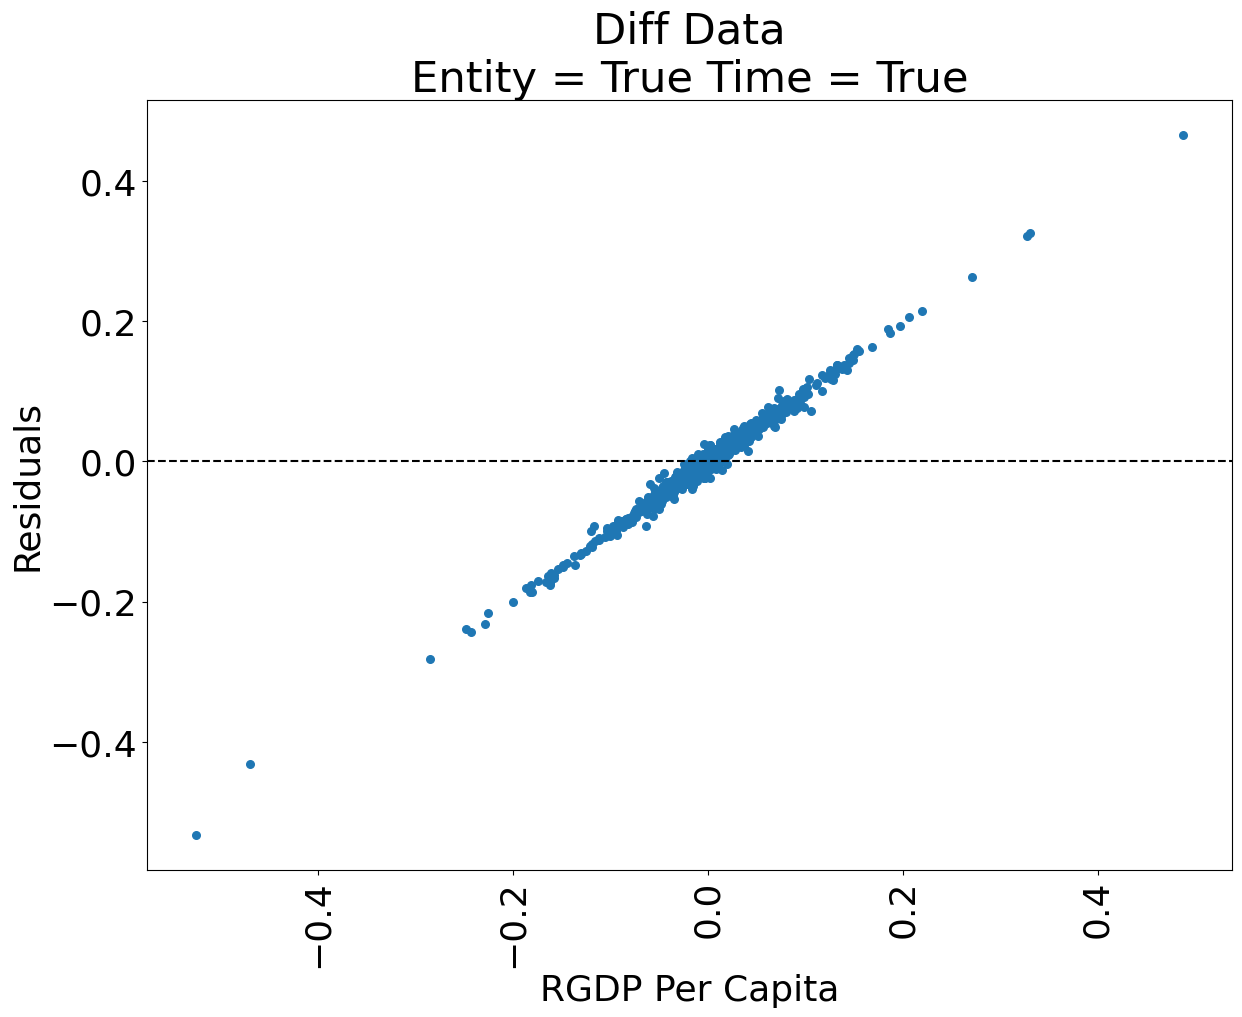

Diff Data
Entity = True
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0146
Estimator:                   PanelOLS   R-squared (Between):             -0.1084
No. Observations:                2183   R-squared (Within):               0.0146
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0131
Time:                        10:49:17   Log-likelihood                    3665.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.0105
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.230   Distribution:                  F(5,2026)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust): 

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1571313795.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


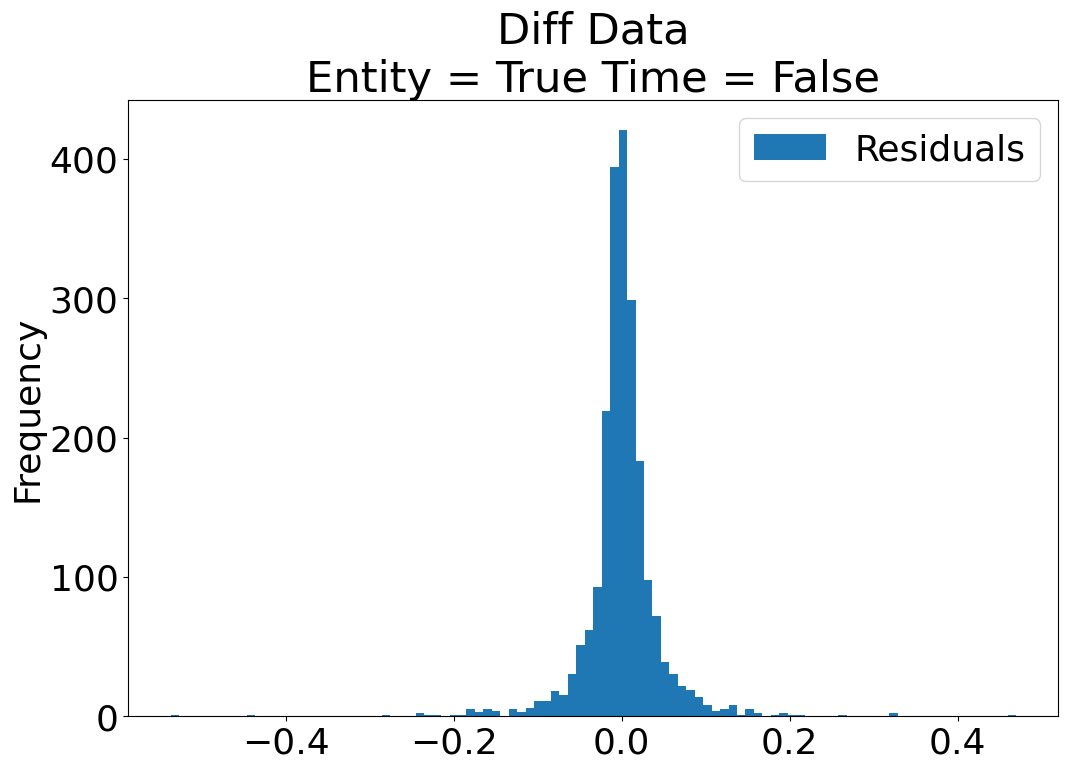

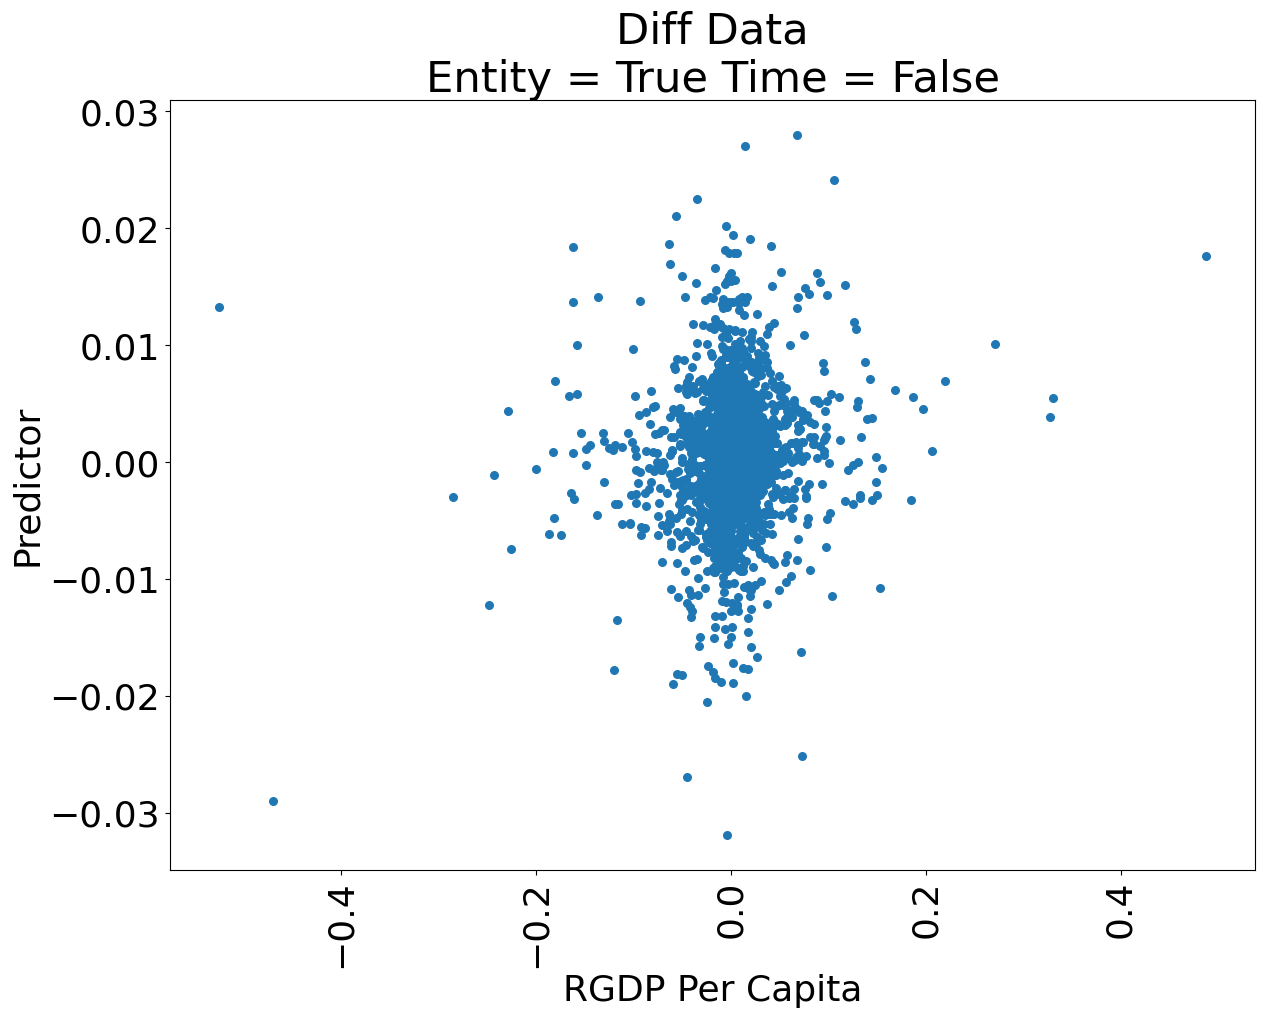

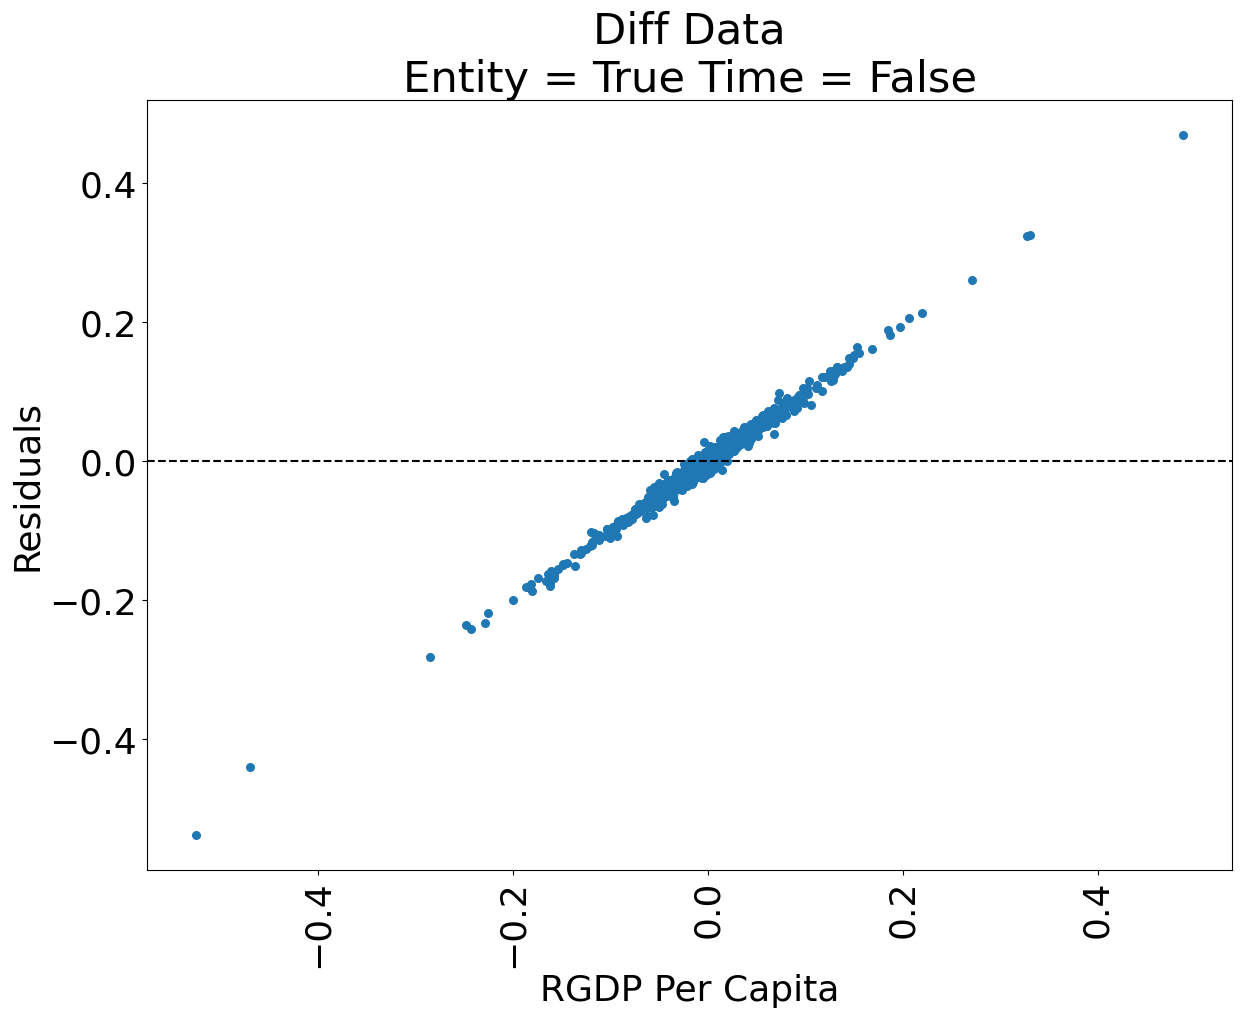

Diff Data
Entity = False
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0166
Estimator:                   PanelOLS   R-squared (Between):             -0.0714
No. Observations:                2183   R-squared (Within):               0.0128
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0119
Time:                        10:49:17   Log-likelihood                    3831.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7.2924
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.230   Distribution:                  F(5,2162)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust): 

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1571313795.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


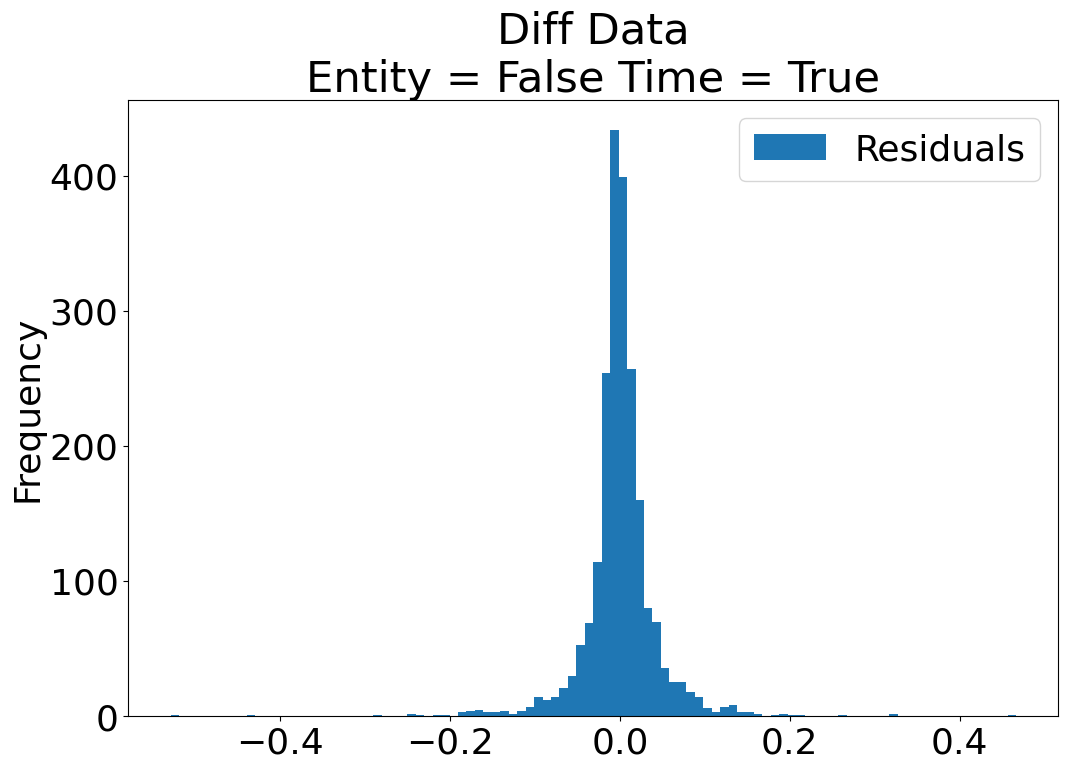

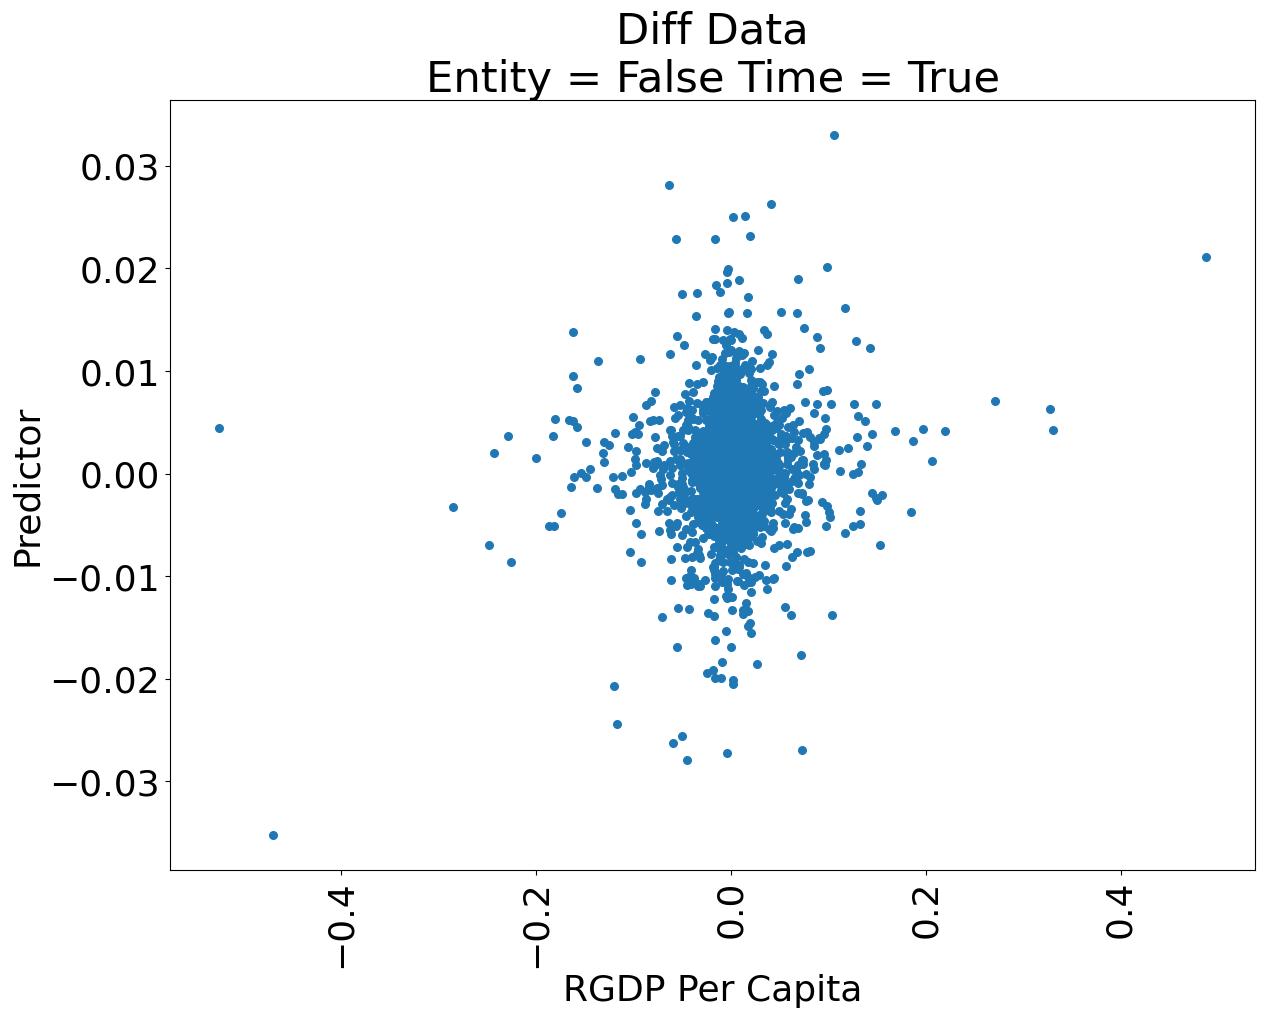

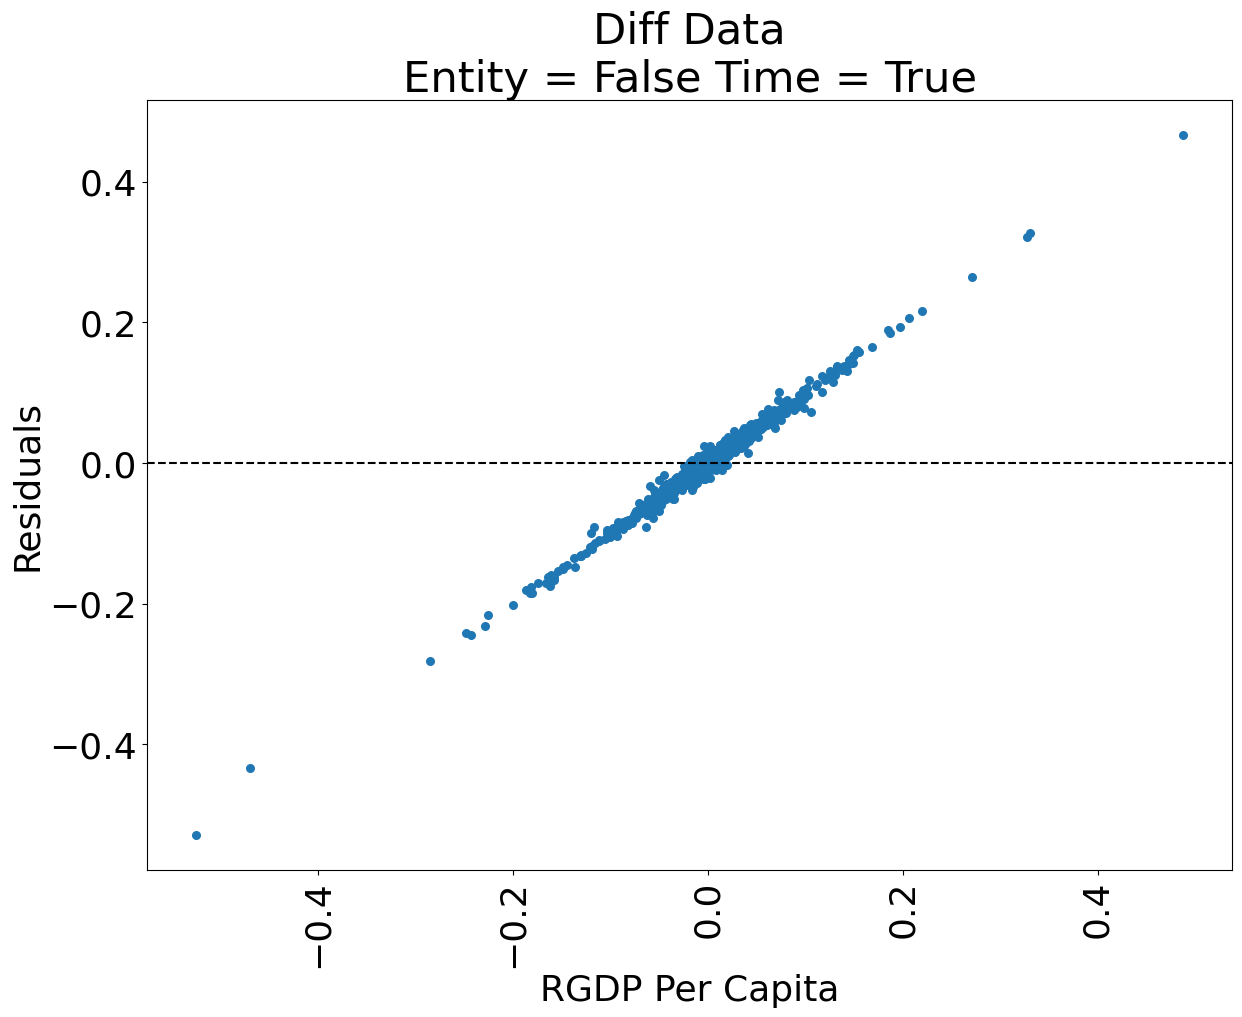

Diff Data
Entity = False
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0132
Estimator:                   PanelOLS   R-squared (Between):             -0.0883
No. Observations:                2183   R-squared (Within):               0.0145
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0132
Time:                        10:49:18   Log-likelihood                    3641.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.8302
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.230   Distribution:                  F(5,2177)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust):

C:\Users\JLCat\AppData\Local\Temp\ipykernel_21488\1571313795.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


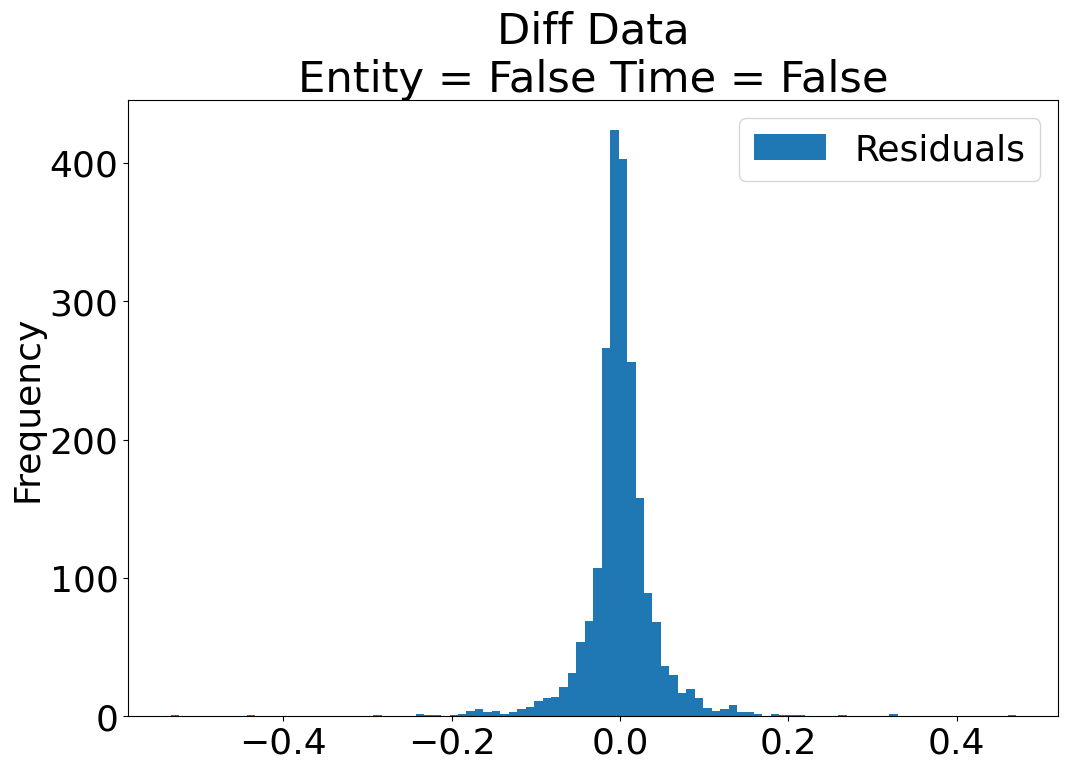

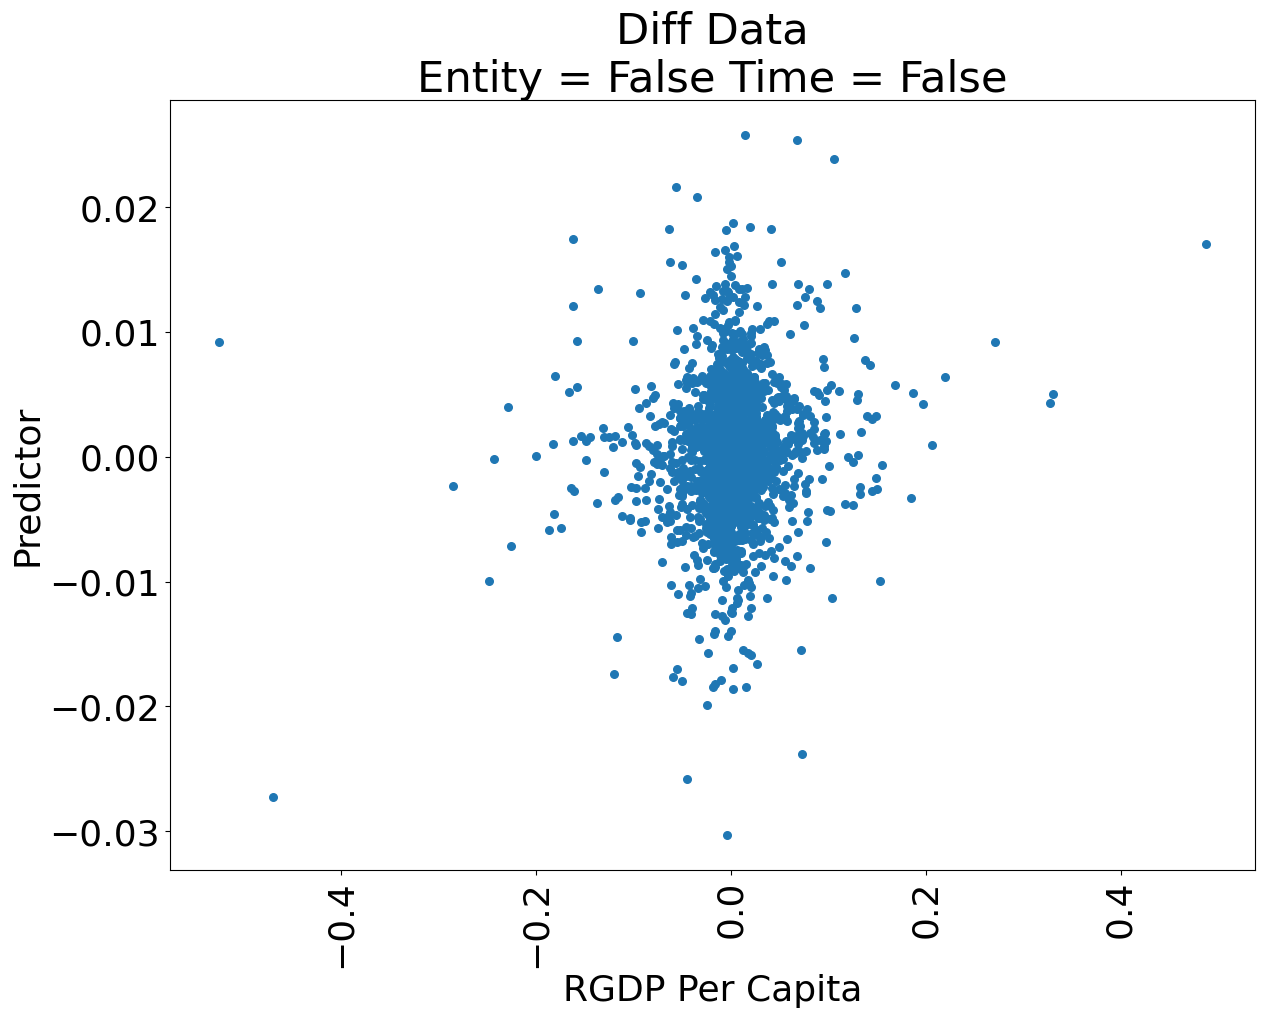

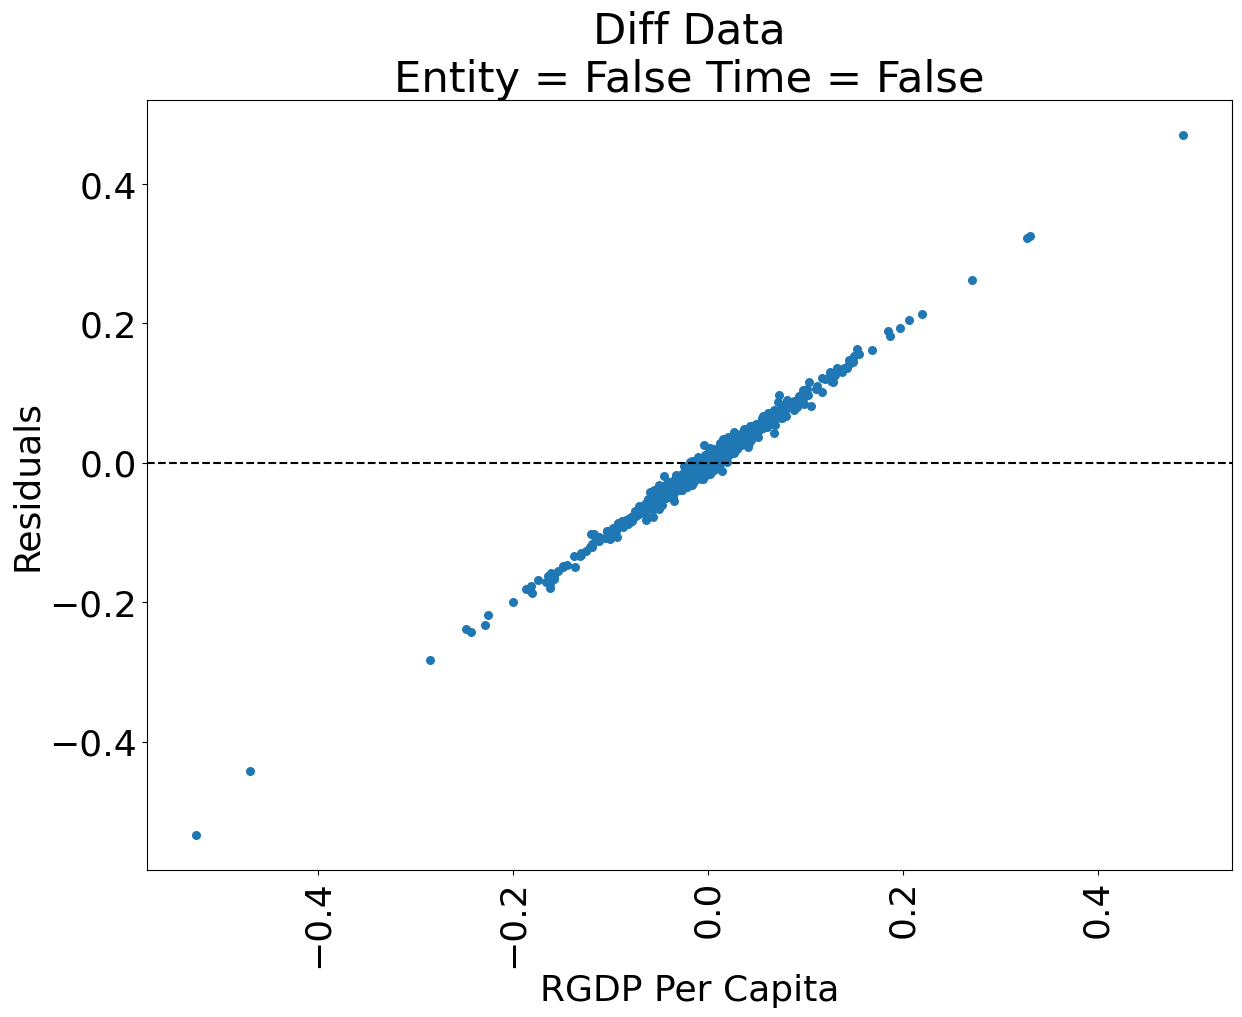

In [33]:
from linearmodels import PanelOLS
# . . . .
y_name = ["RGDP Per Capita"]
X_names = ["Size of Government", 
          "Legal System and Property Rights", 
          "Sound Money",
          "Freedom to Trade Internationally",
          "Regulation"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

Data
Entity = True
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0214
Estimator:                   PanelOLS   R-squared (Between):              0.1019
No. Observations:                2304   R-squared (Within):               0.0239
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0288
Time:                        10:49:19   Log-likelihood                   -264.72
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      9.3318
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.964   Distribution:                  F(5,2131)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):            

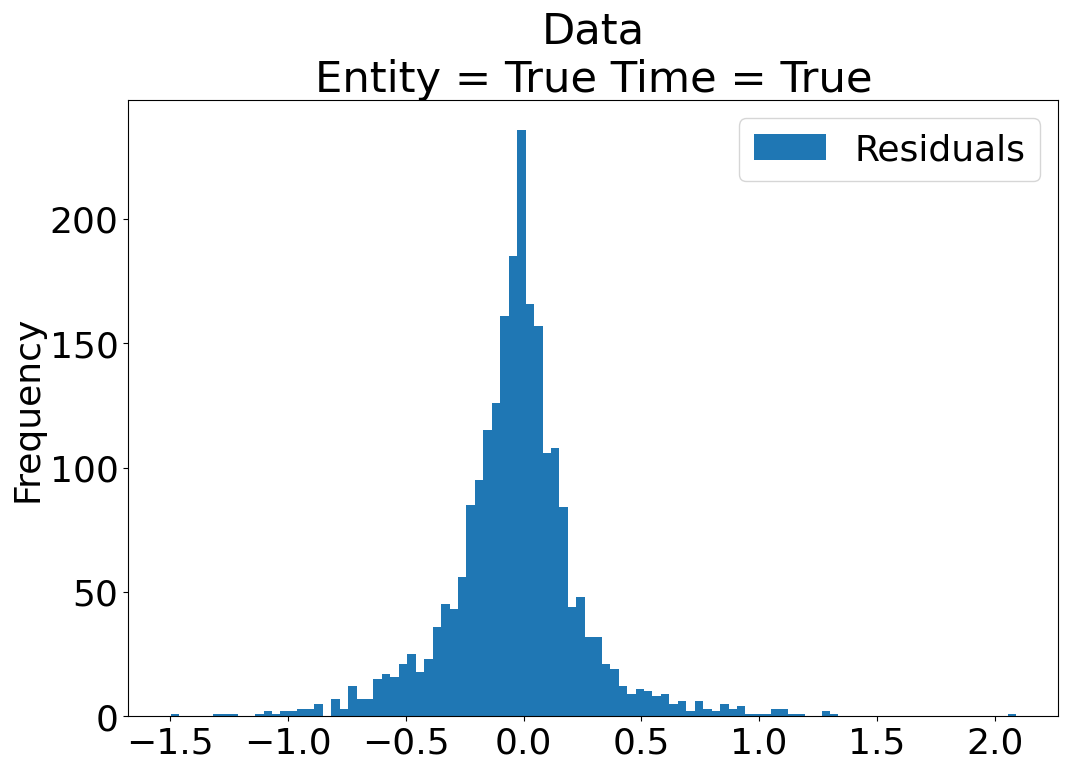

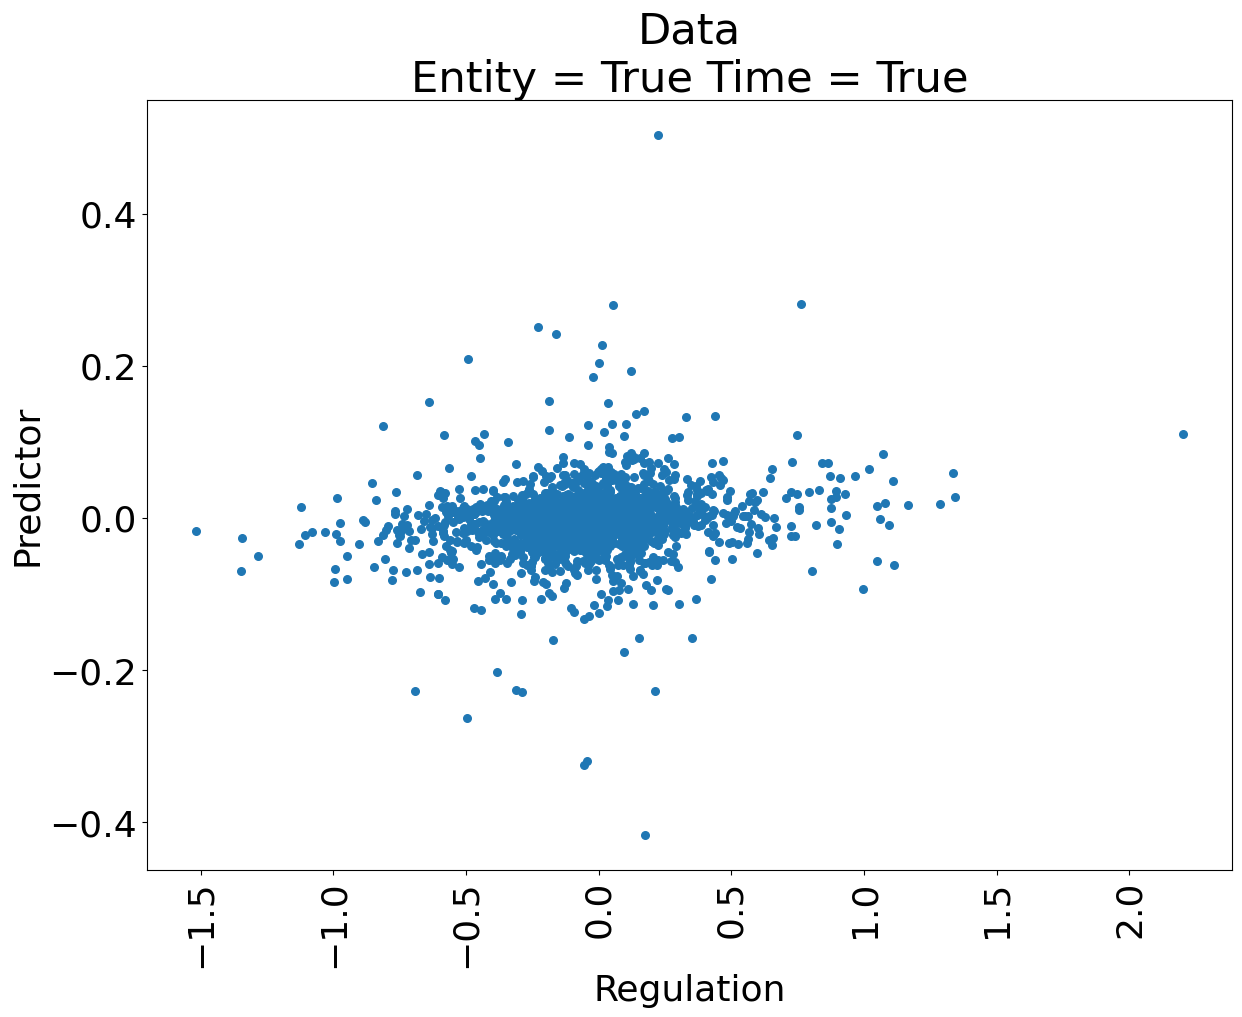

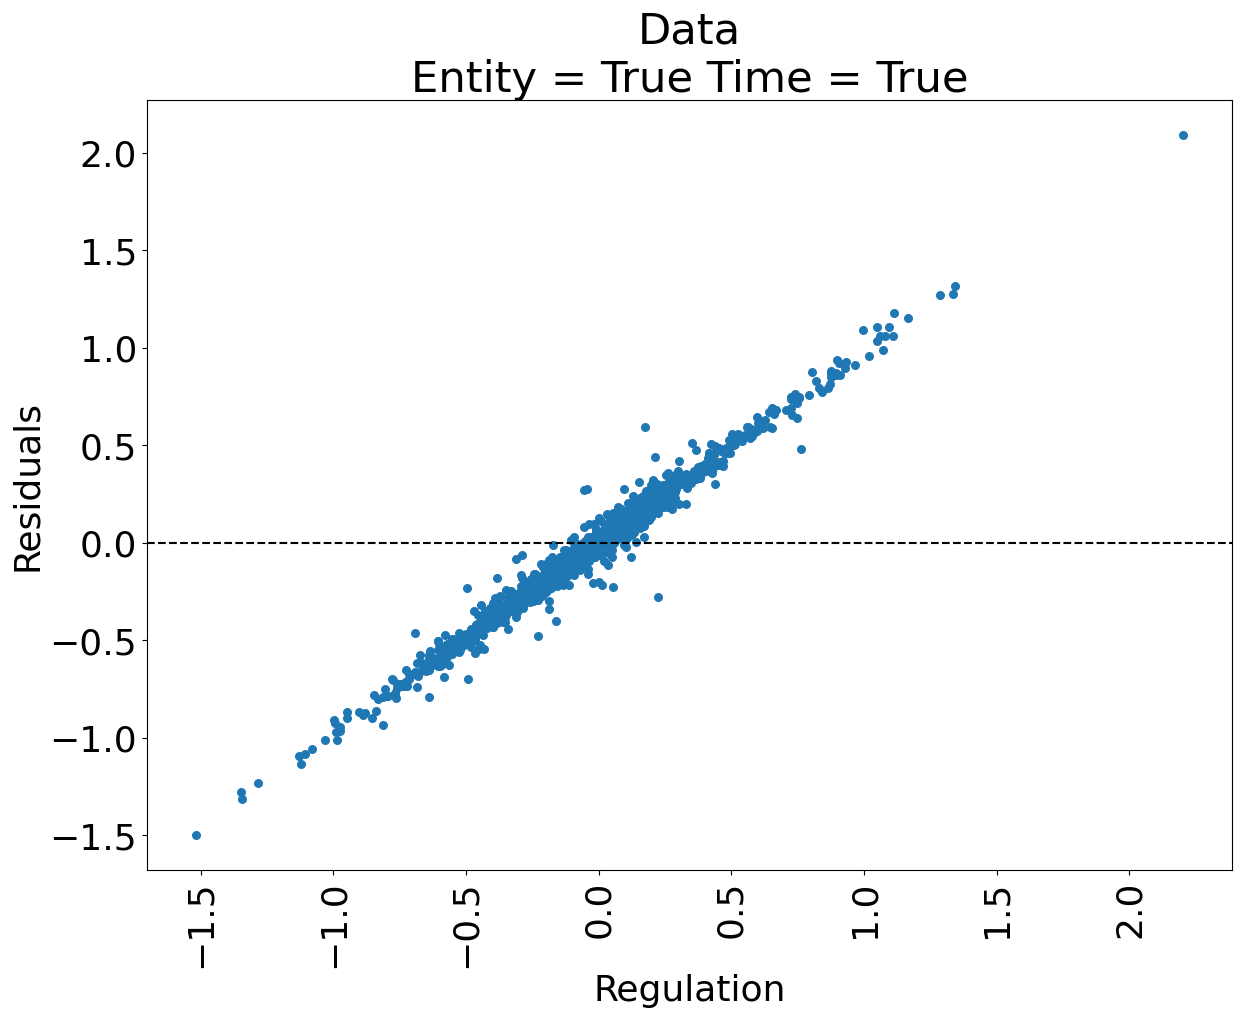

Data
Entity = True
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0245
Estimator:                   PanelOLS   R-squared (Between):              0.0899
No. Observations:                2304   R-squared (Within):               0.0245
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0300
Time:                        10:49:19   Log-likelihood                   -333.60
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      10.794
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.964   Distribution:                  F(5,2147)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):           

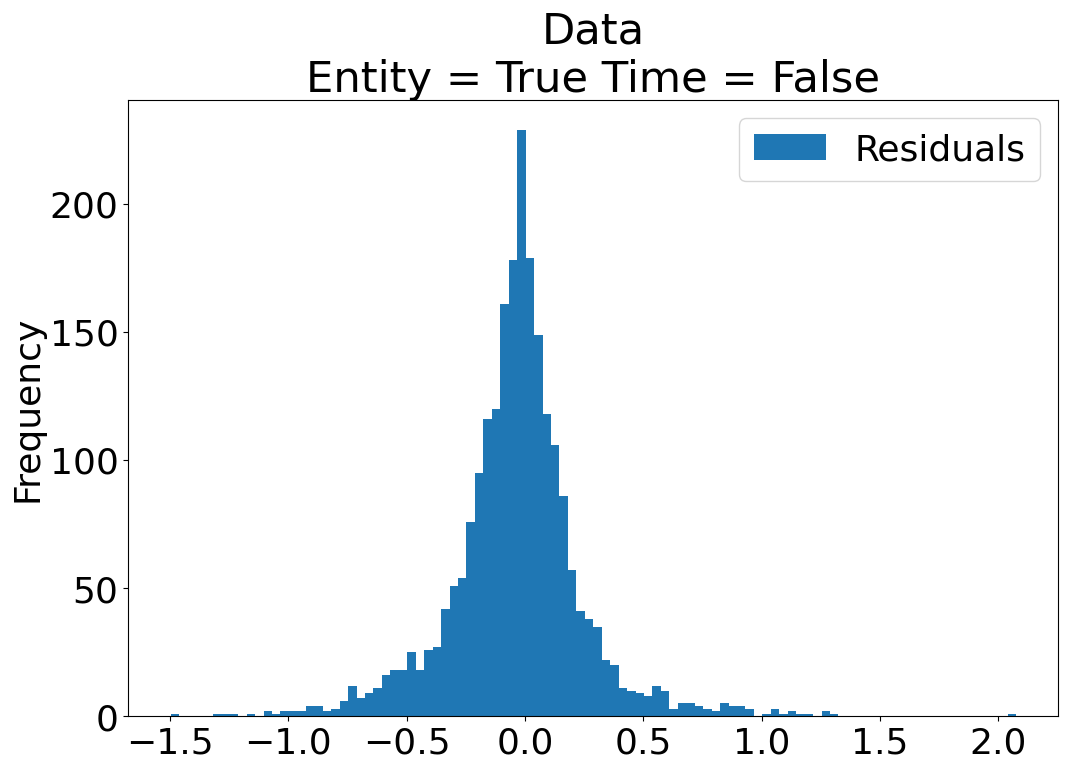

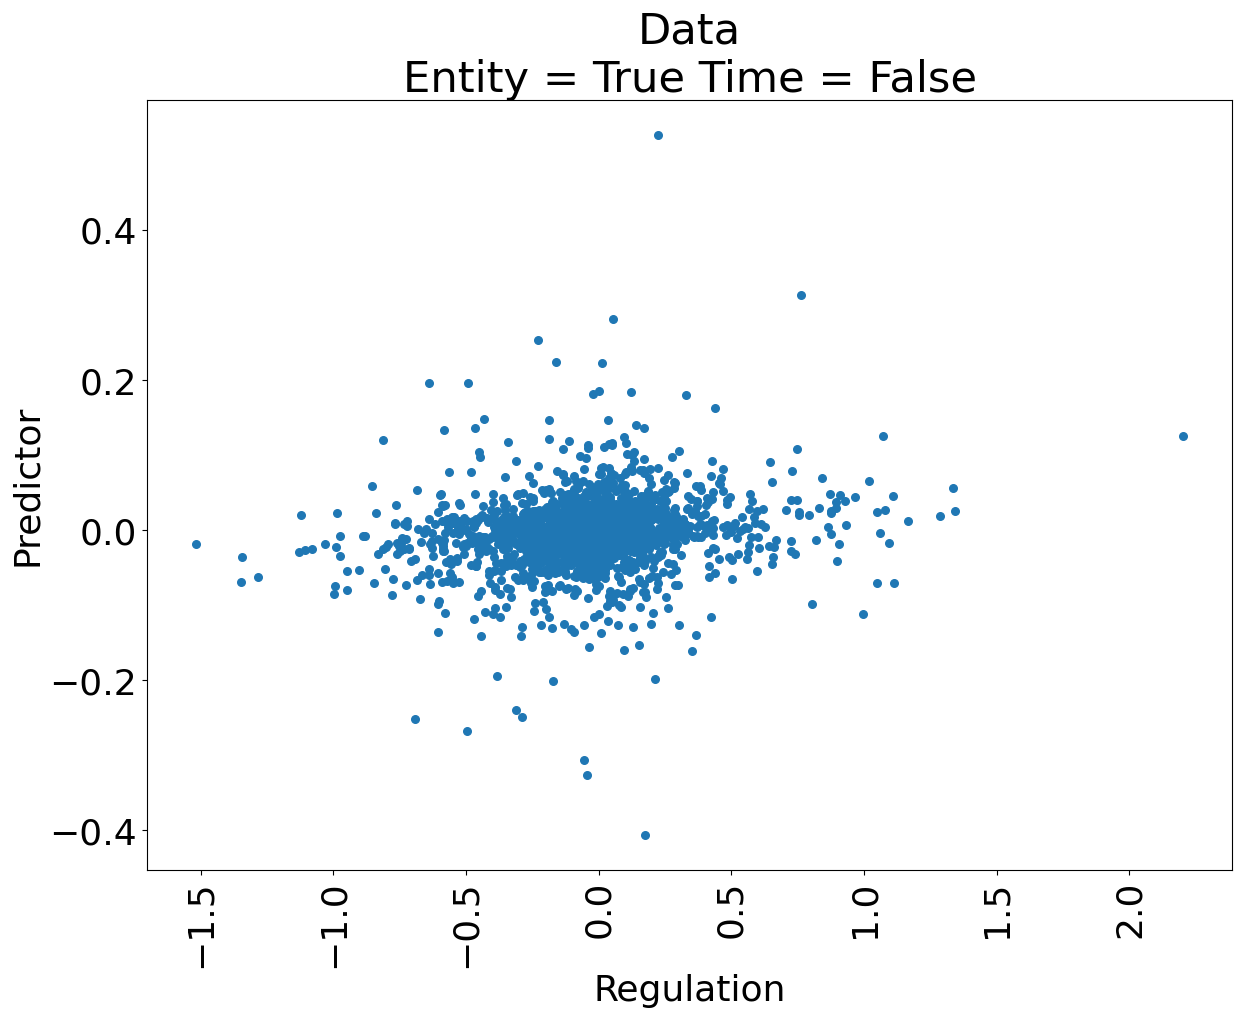

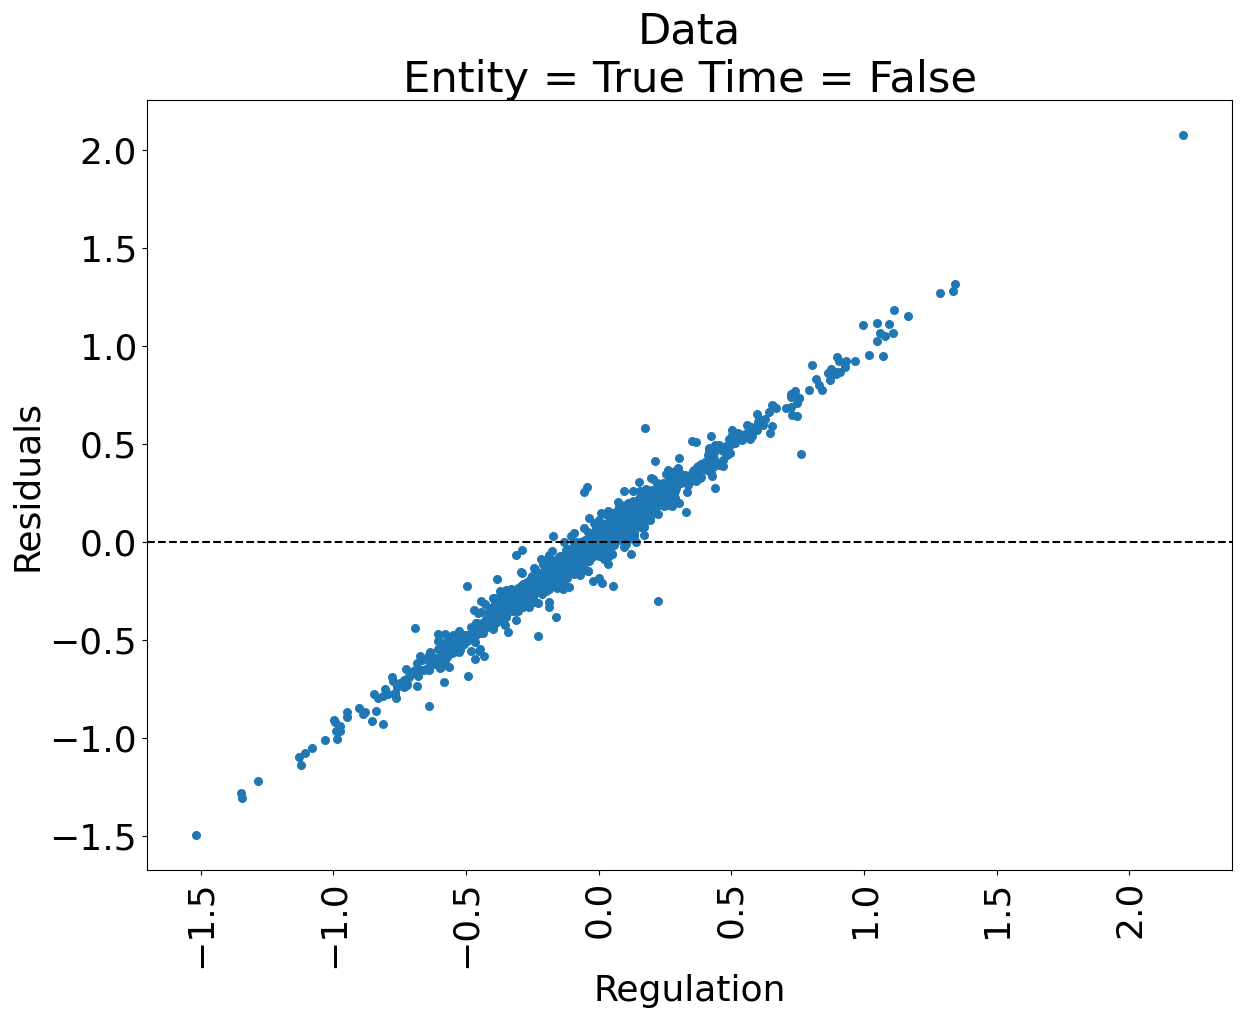

Data
Entity = False
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0253
Estimator:                   PanelOLS   R-squared (Between):              0.1178
No. Observations:                2304   R-squared (Within):               0.0237
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0299
Time:                        10:49:20   Log-likelihood                   -304.89
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.831
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.964   Distribution:                  F(5,2282)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):           

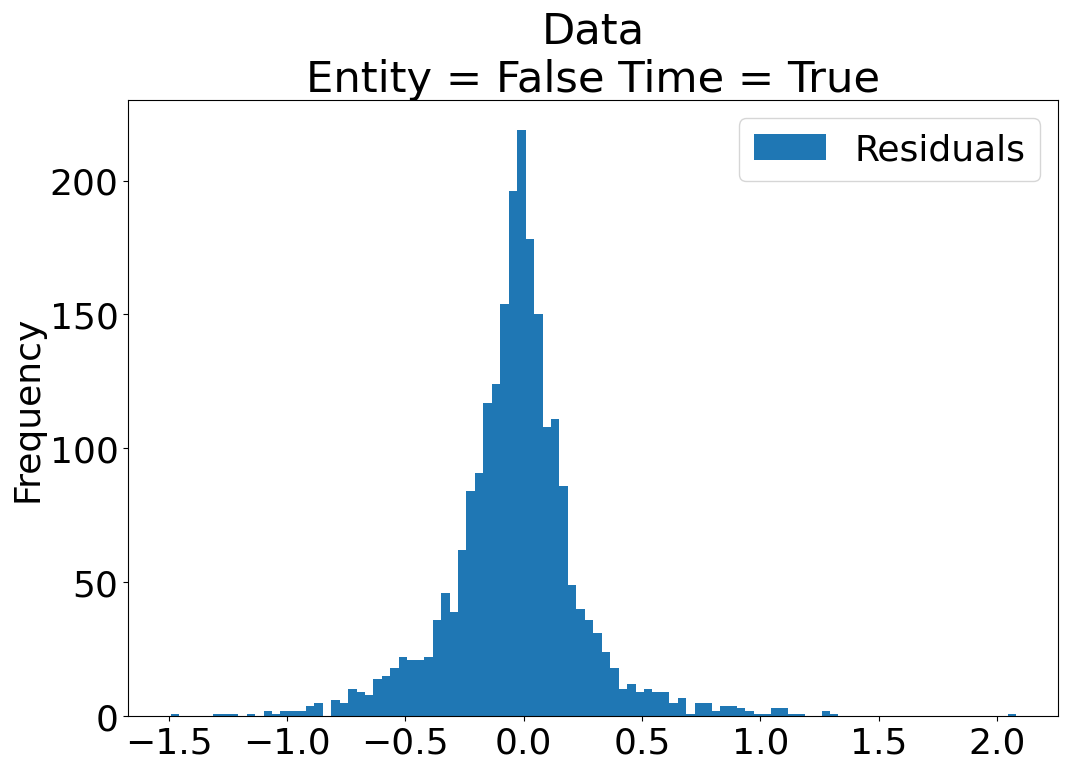

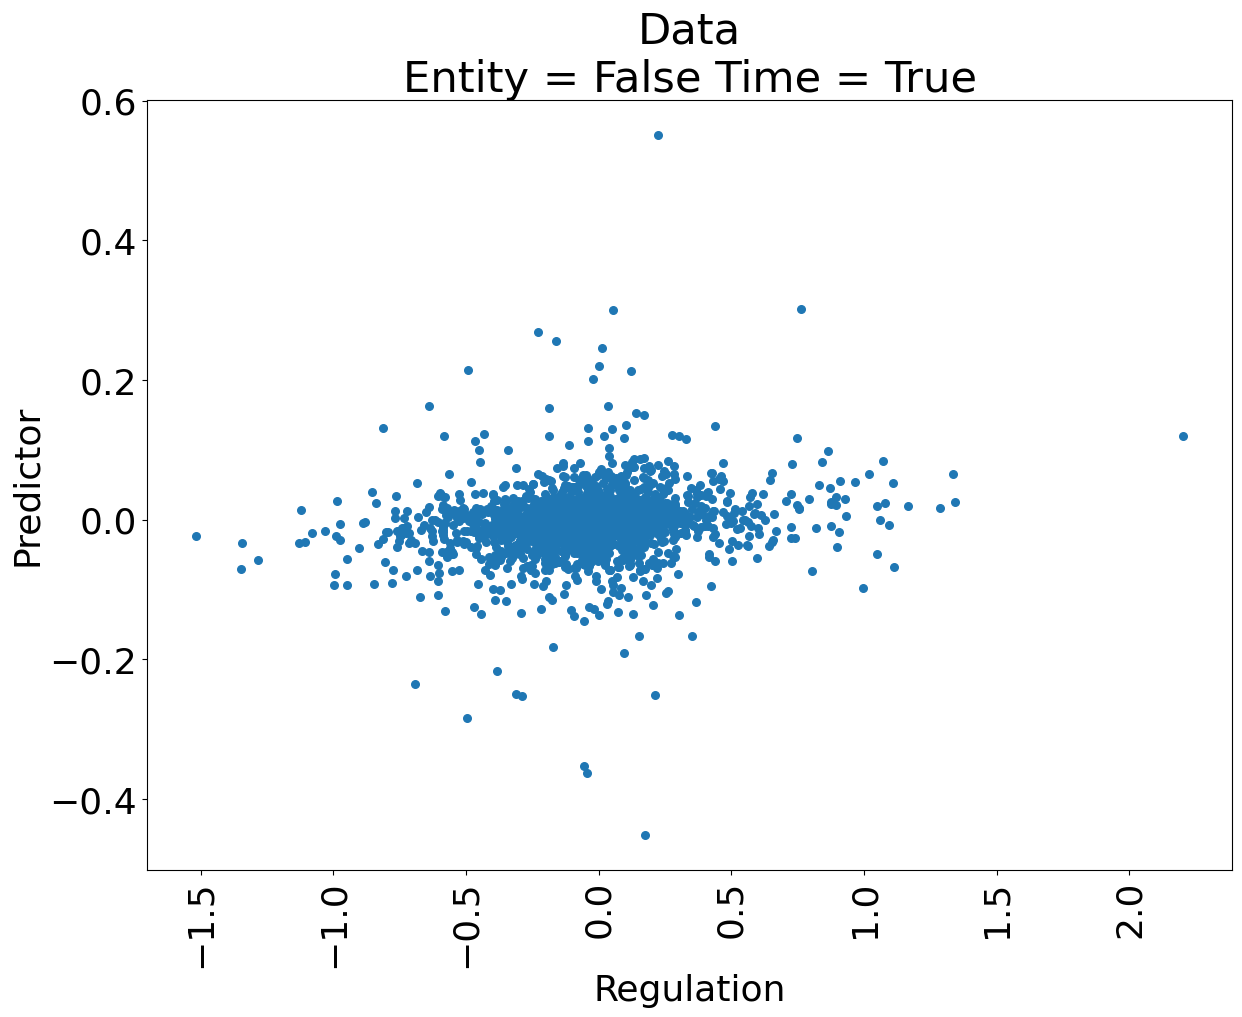

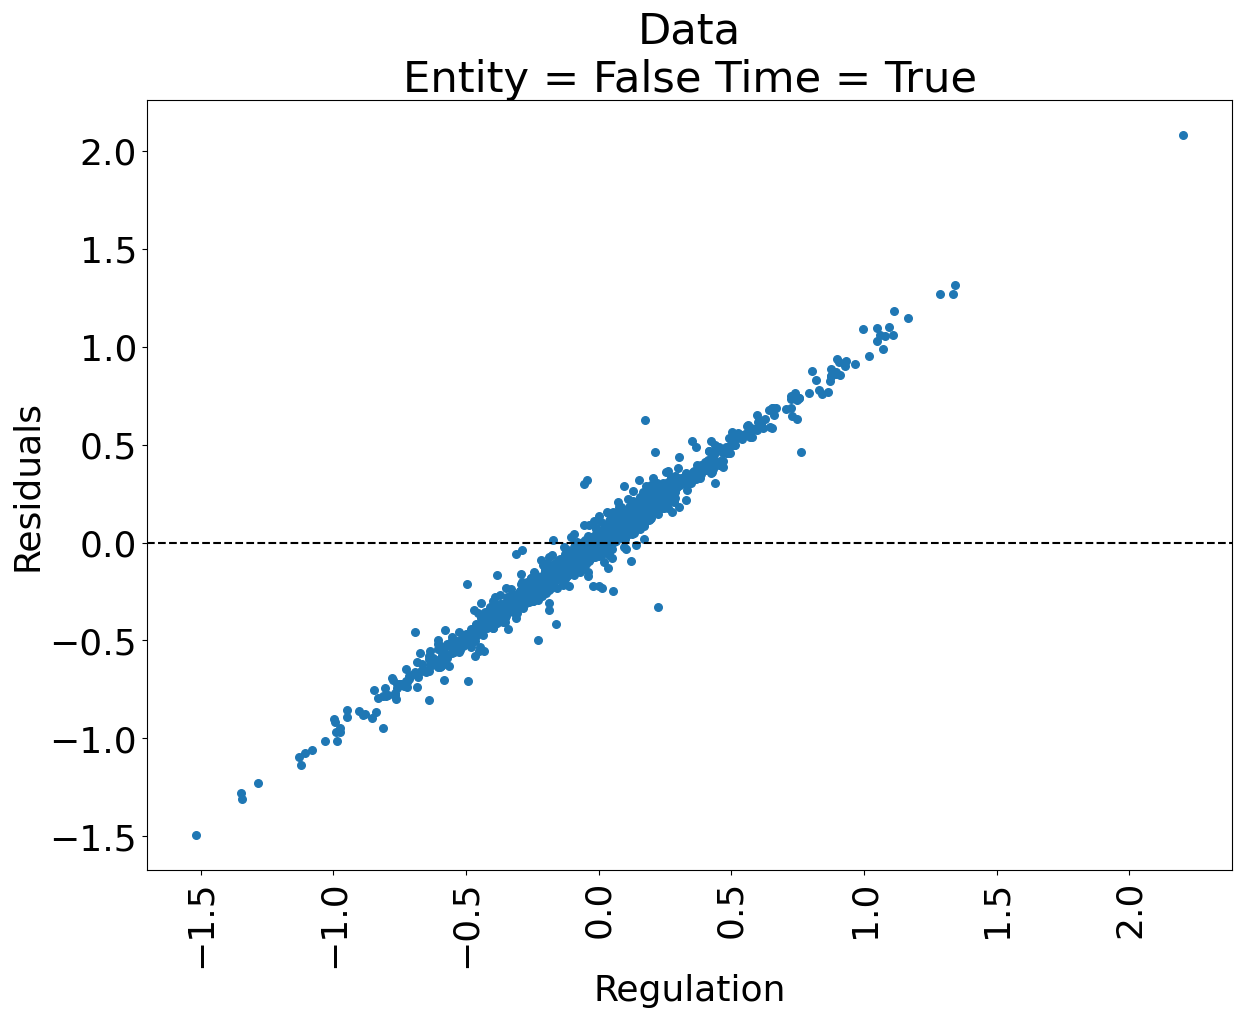

Data
Entity = False
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0311
Estimator:                   PanelOLS   R-squared (Between):              0.1136
No. Observations:                2304   R-squared (Within):               0.0234
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0311
Time:                        10:49:20   Log-likelihood                   -390.67
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      14.778
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.964   Distribution:                  F(5,2299)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):          

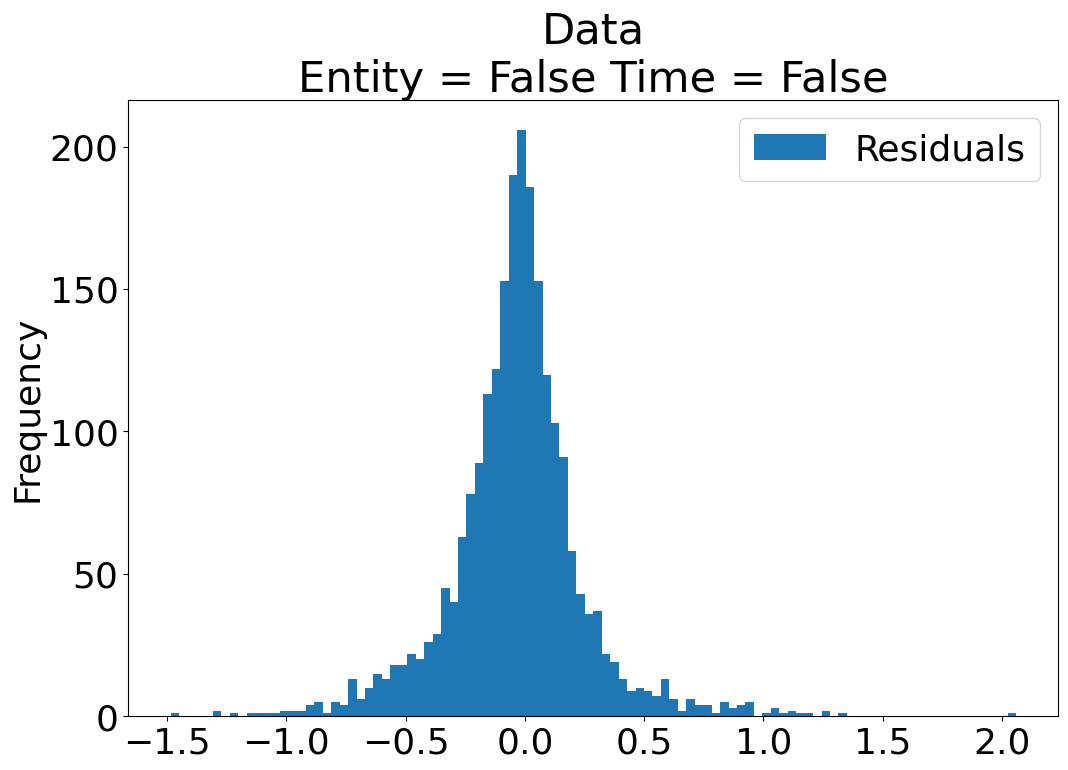

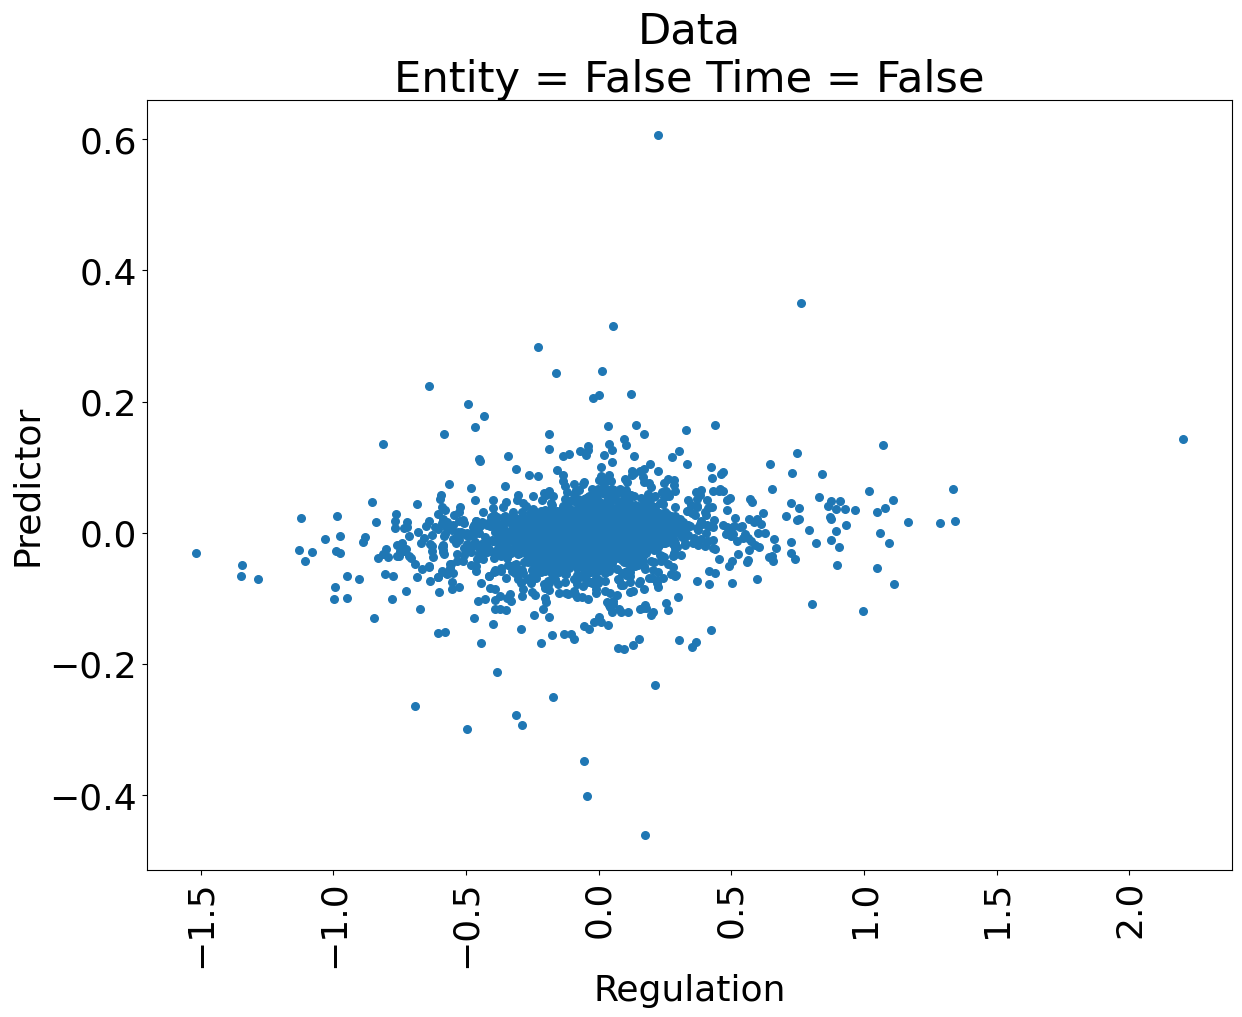

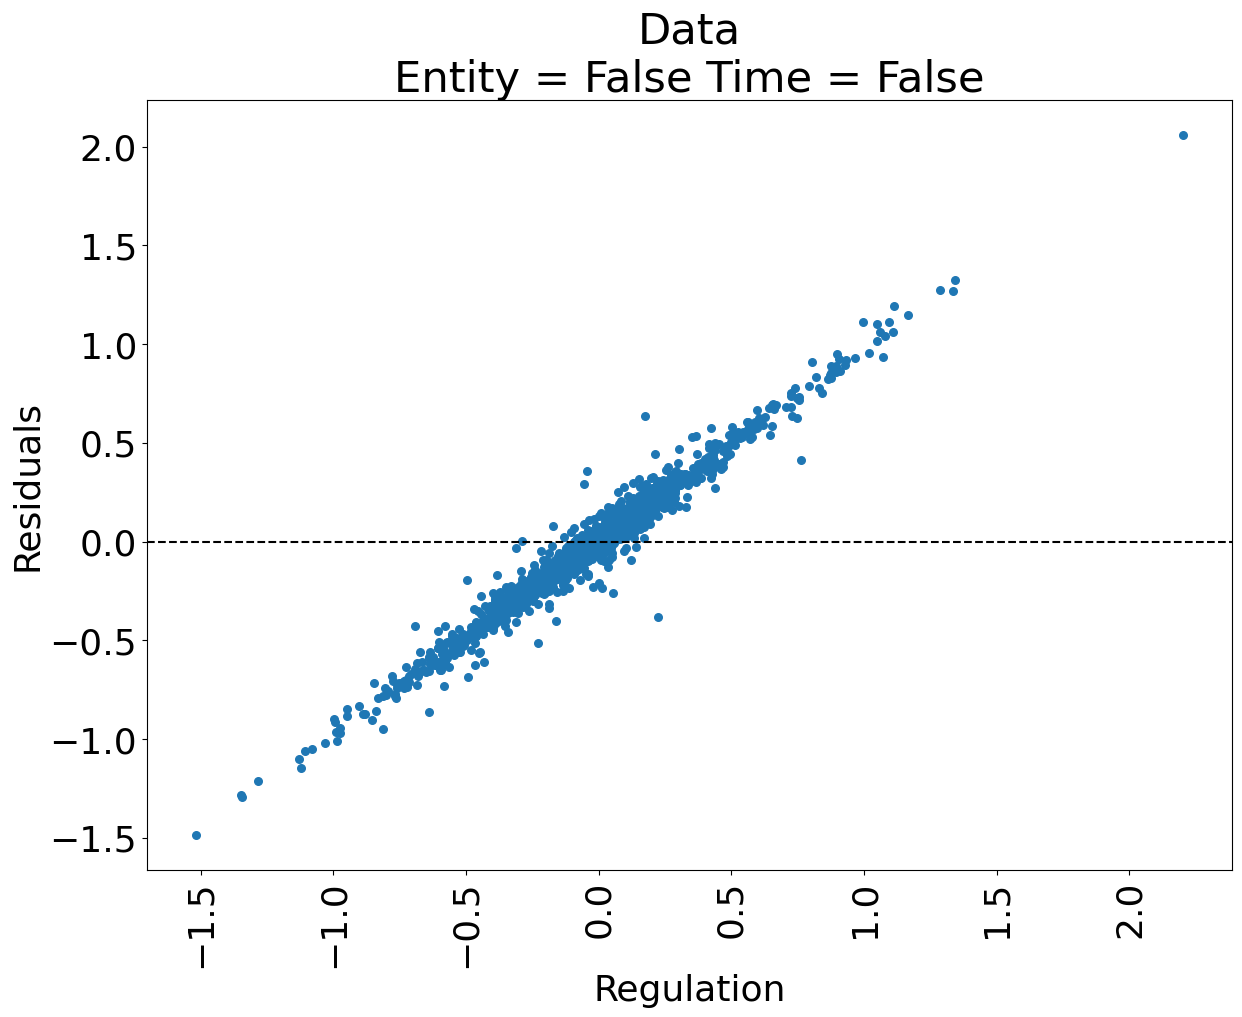

Diff Data
Entity = True
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0203
Estimator:                   PanelOLS   R-squared (Between):              0.0916
No. Observations:                2183   R-squared (Within):               0.0235
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0265
Time:                        10:49:21   Log-likelihood                   -240.44
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      8.3366
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.230   Distribution:                  F(5,2011)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust):  

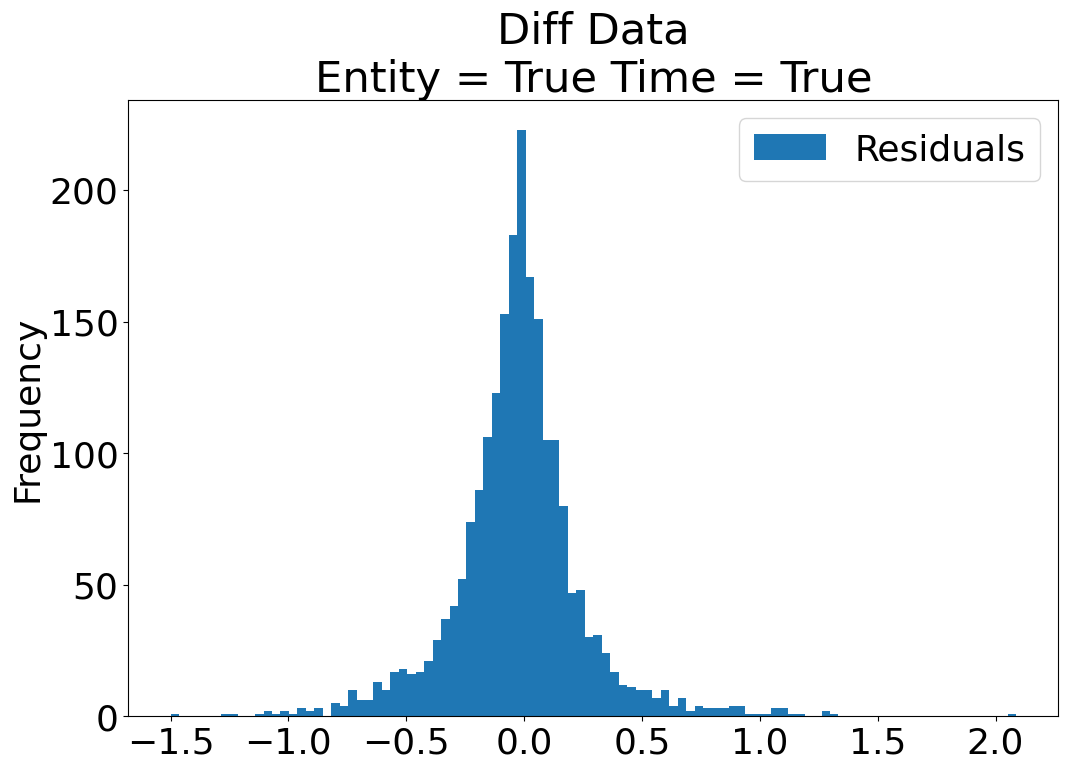

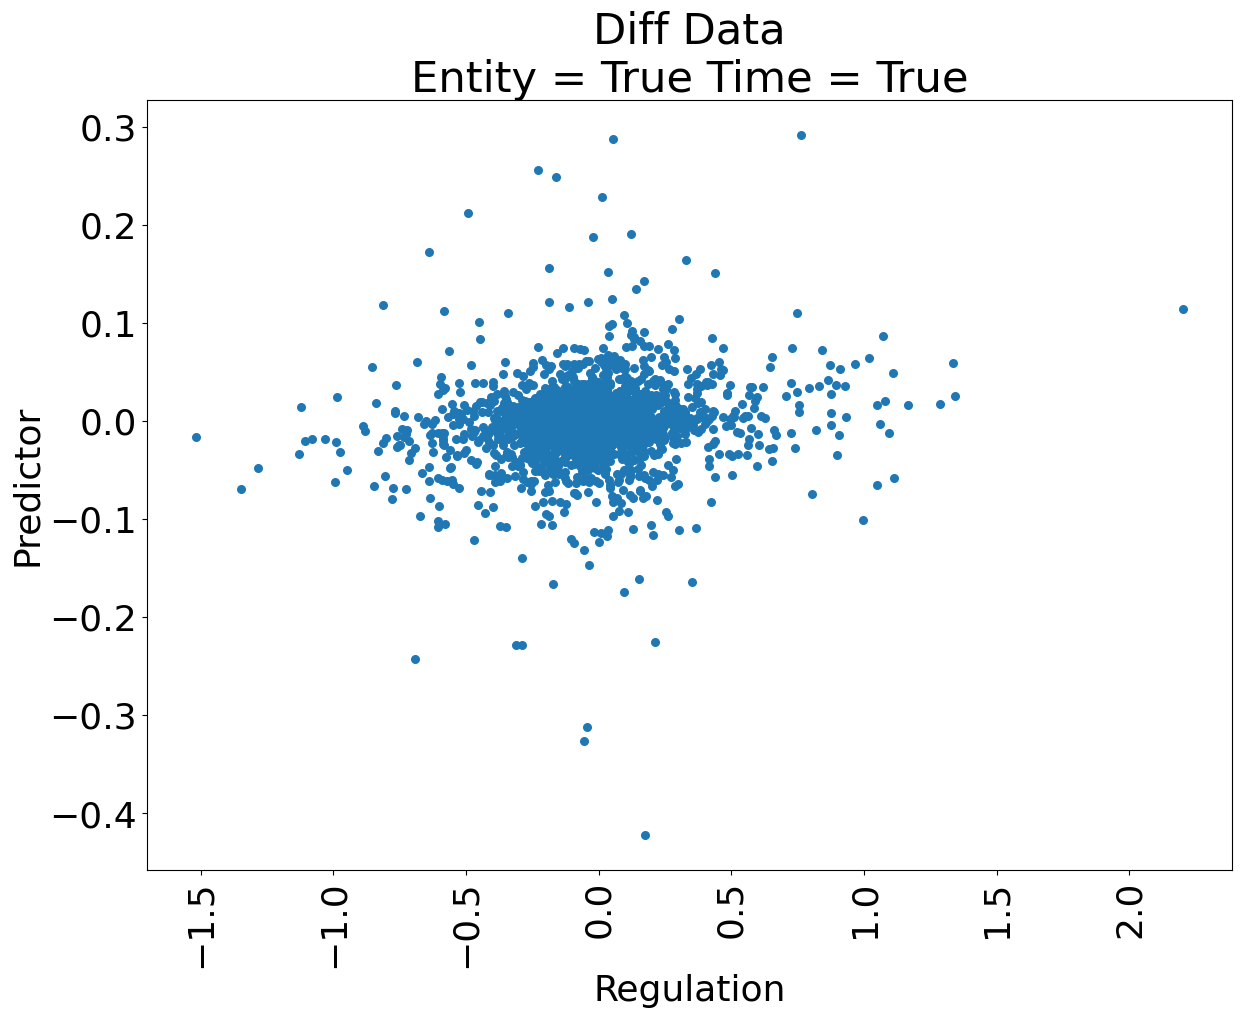

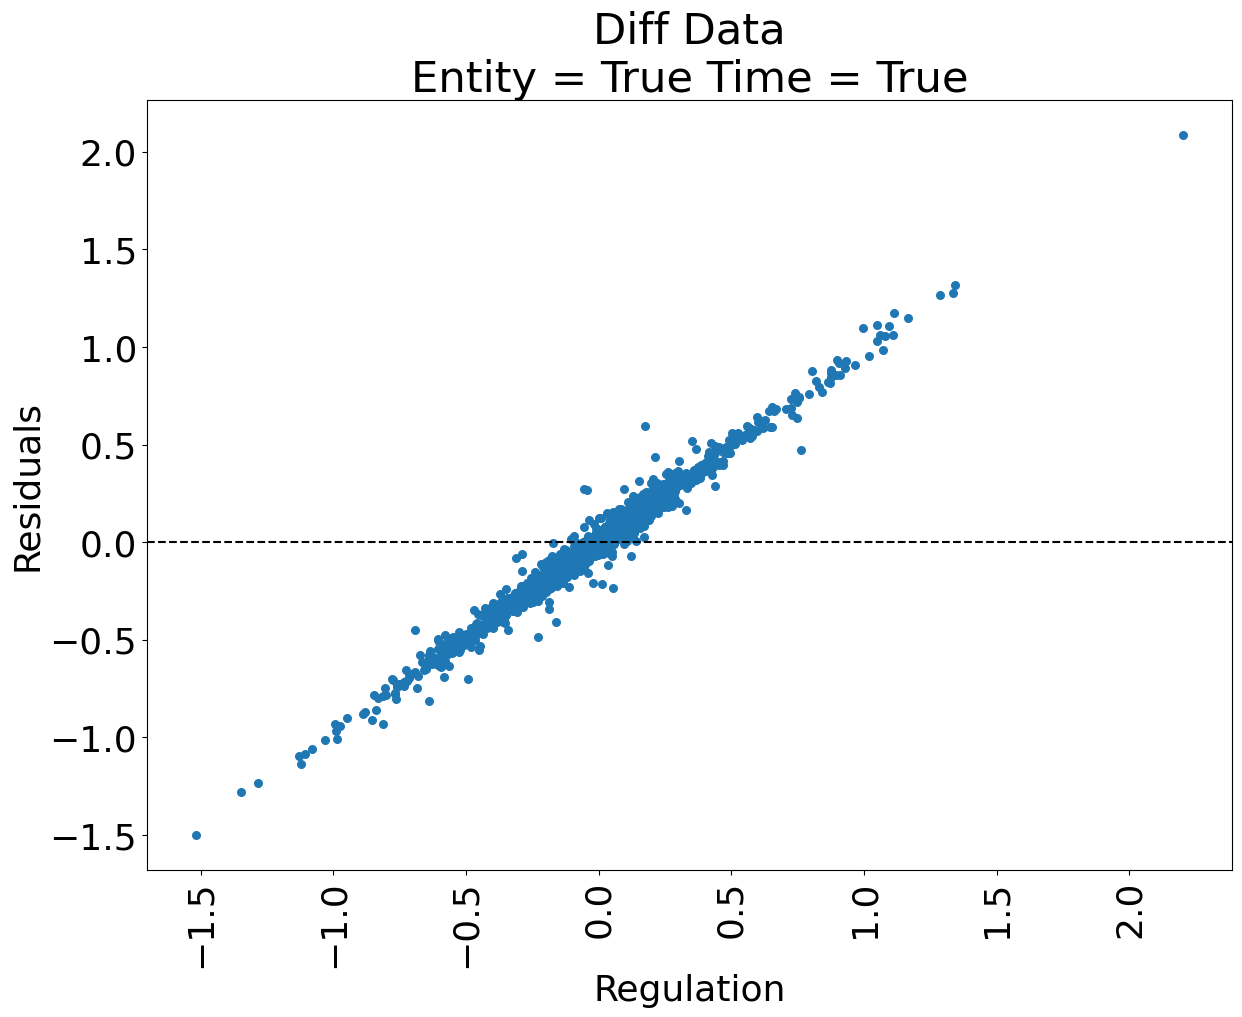

Diff Data
Entity = True
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0241
Estimator:                   PanelOLS   R-squared (Between):              0.0779
No. Observations:                2183   R-squared (Within):               0.0241
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0277
Time:                        10:49:21   Log-likelihood                   -279.45
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      10.006
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.230   Distribution:                  F(5,2026)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust): 

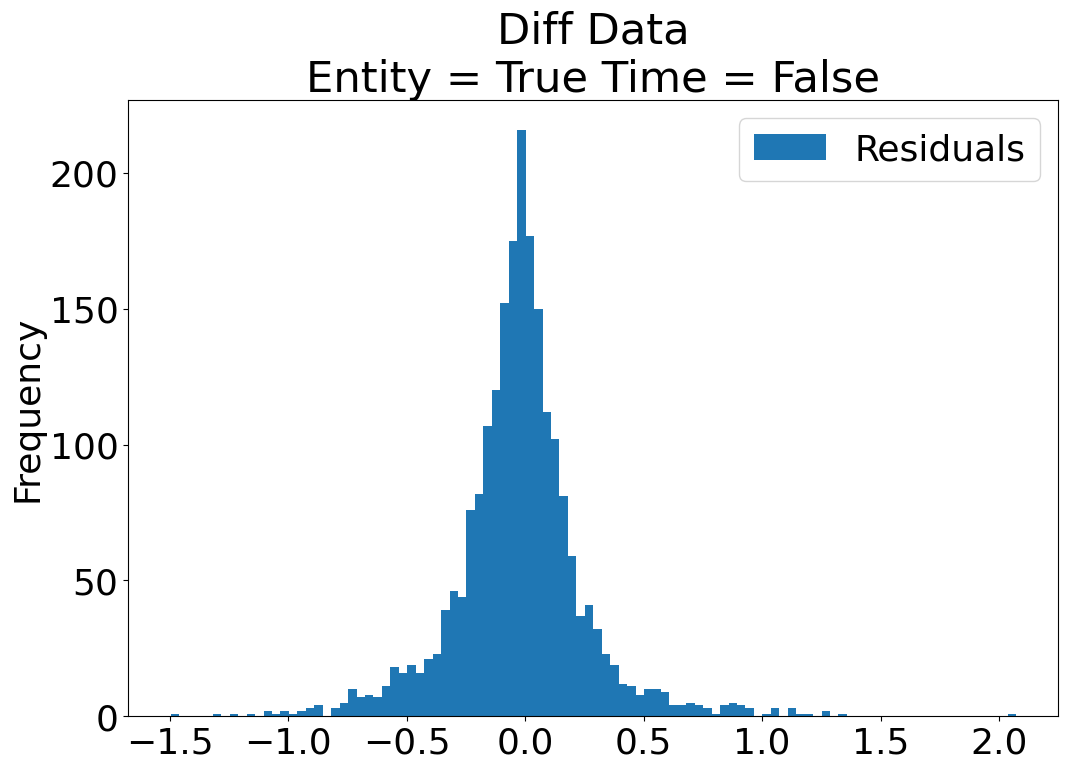

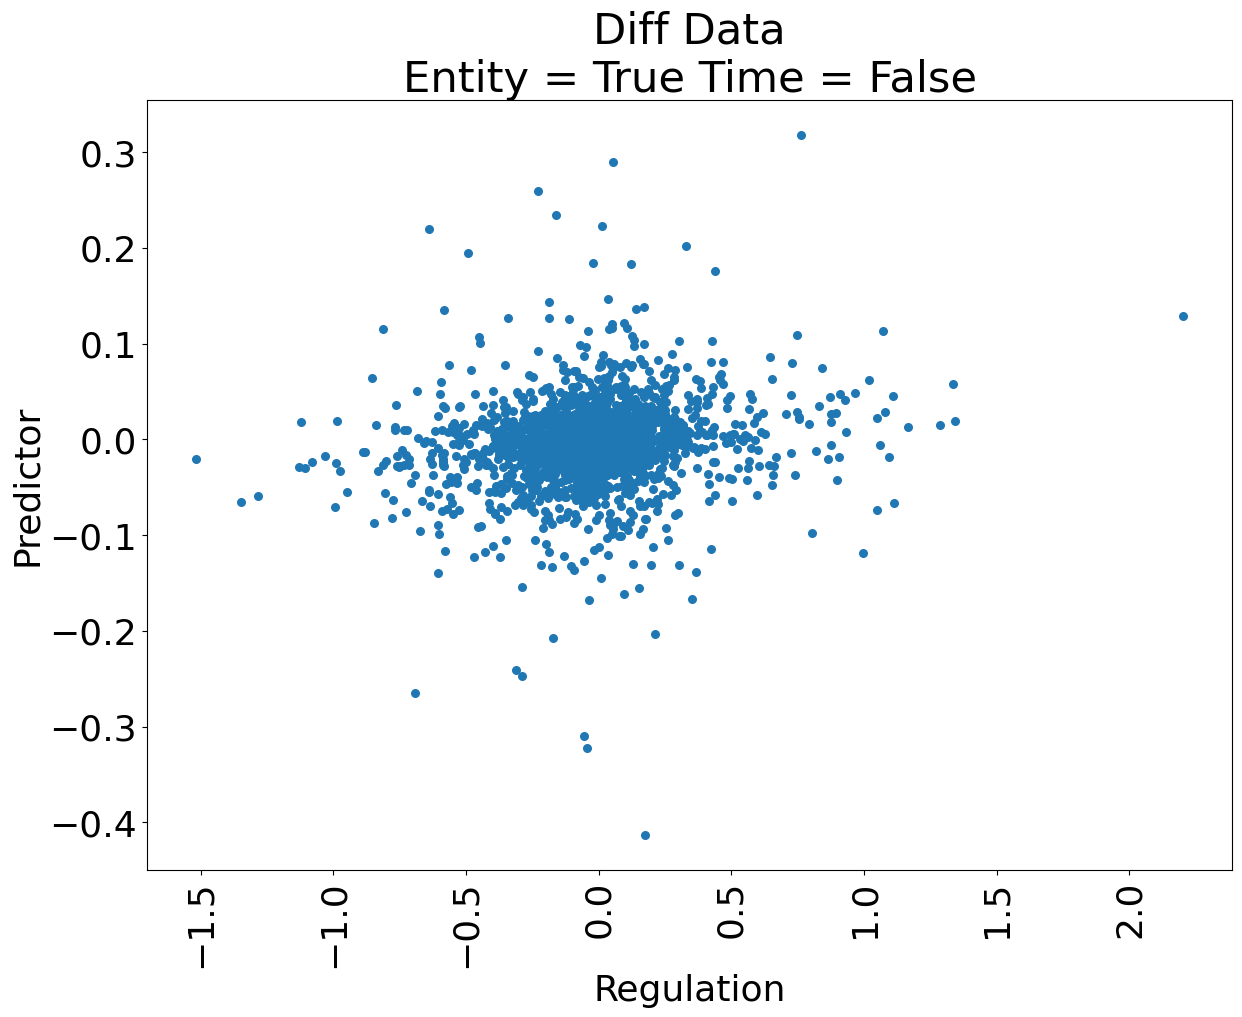

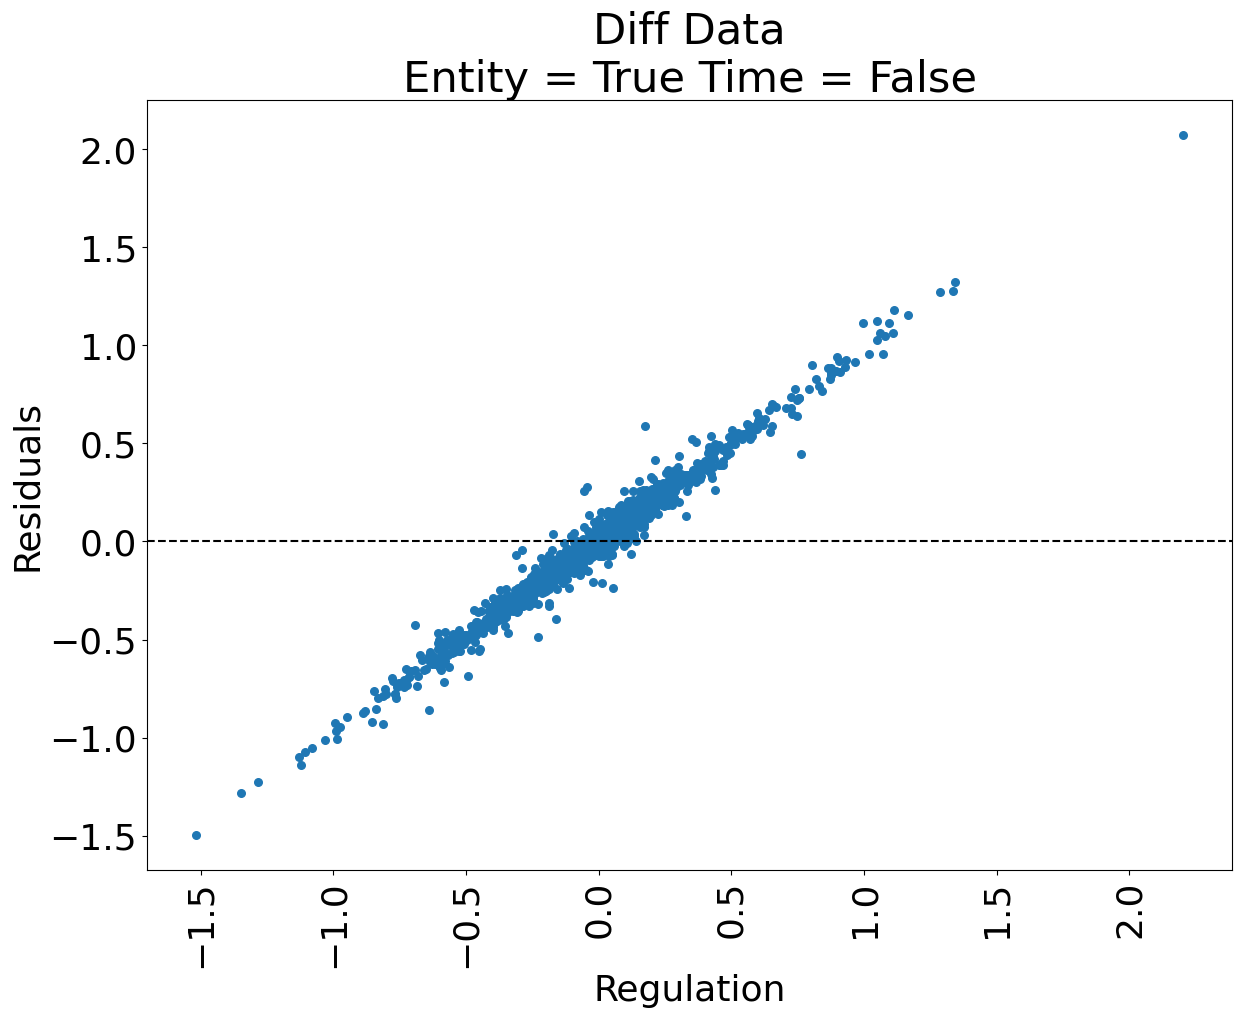

Diff Data
Entity = False
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0222
Estimator:                   PanelOLS   R-squared (Between):              0.1038
No. Observations:                2183   R-squared (Within):               0.0235
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0272
Time:                        10:49:22   Log-likelihood                   -272.52
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      9.8245
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.230   Distribution:                  F(5,2162)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust): 

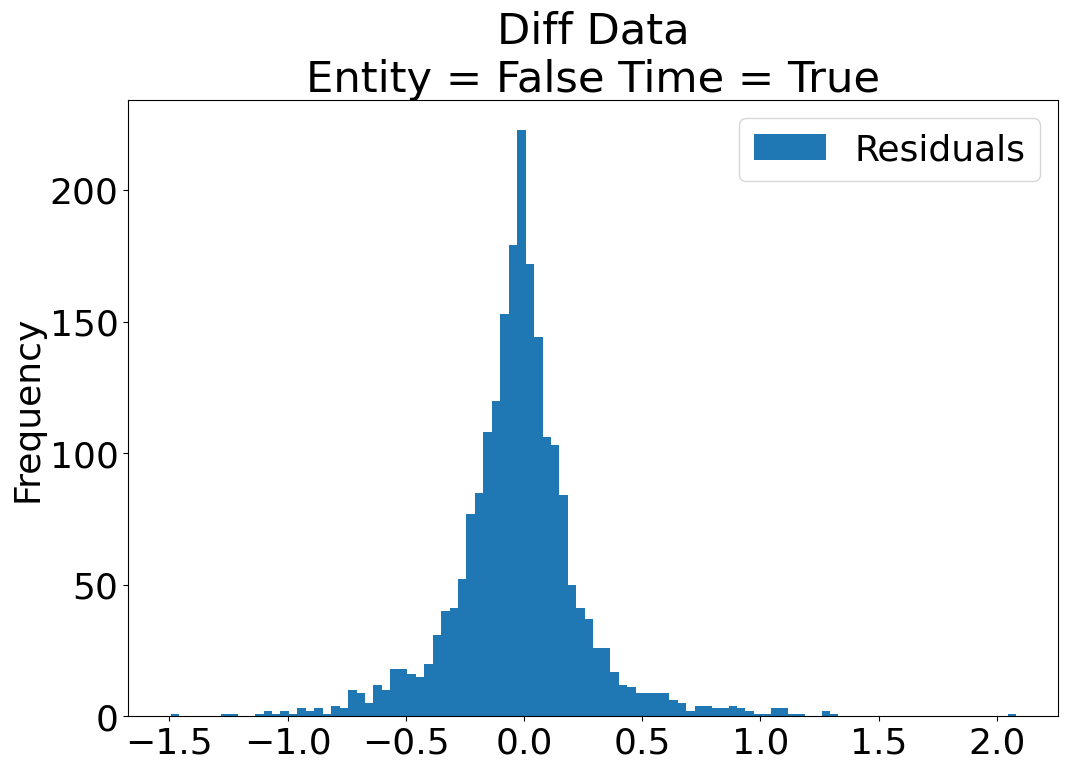

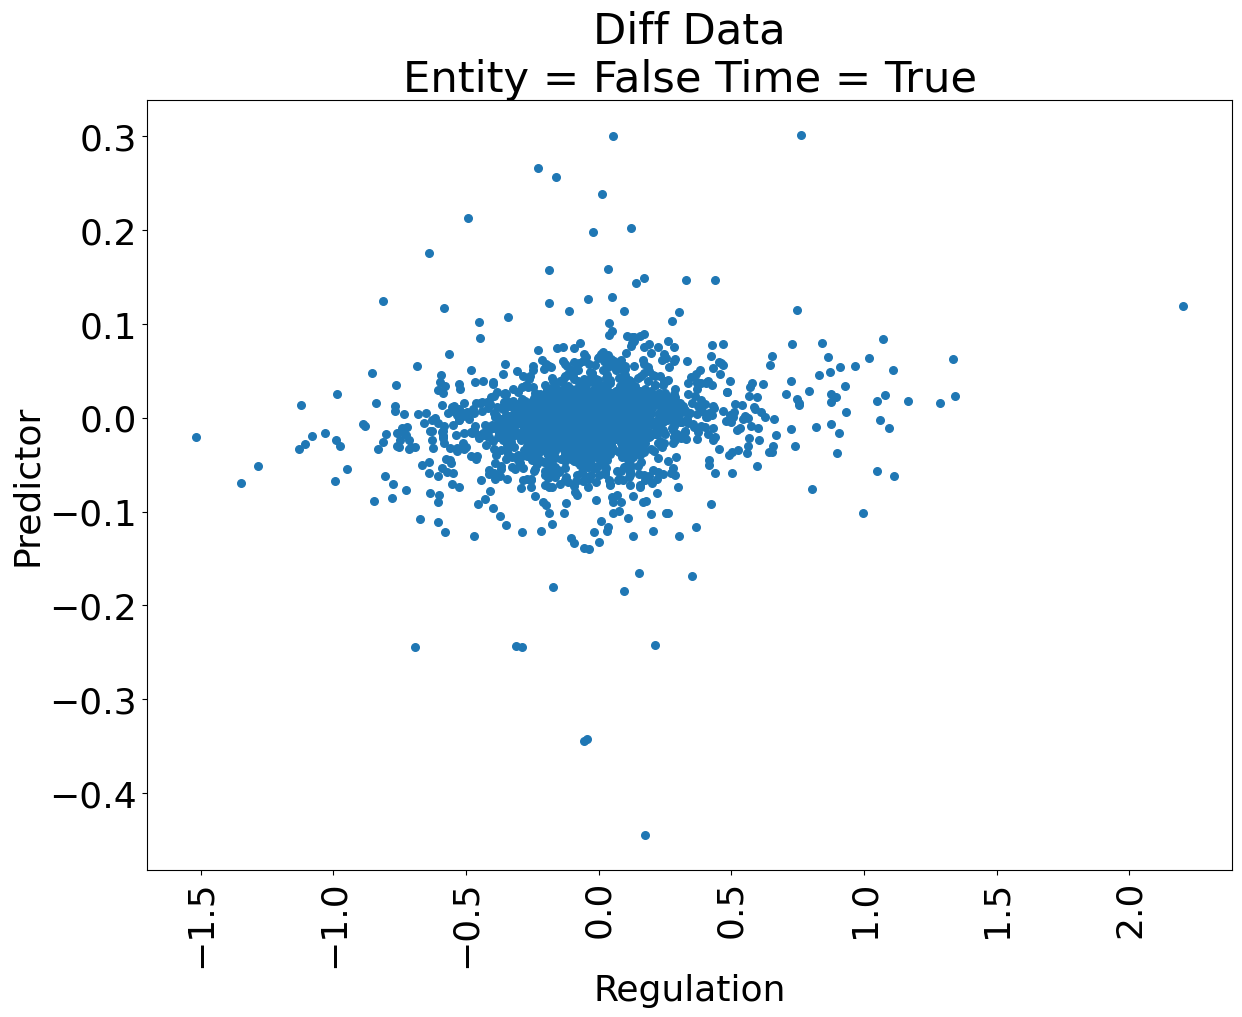

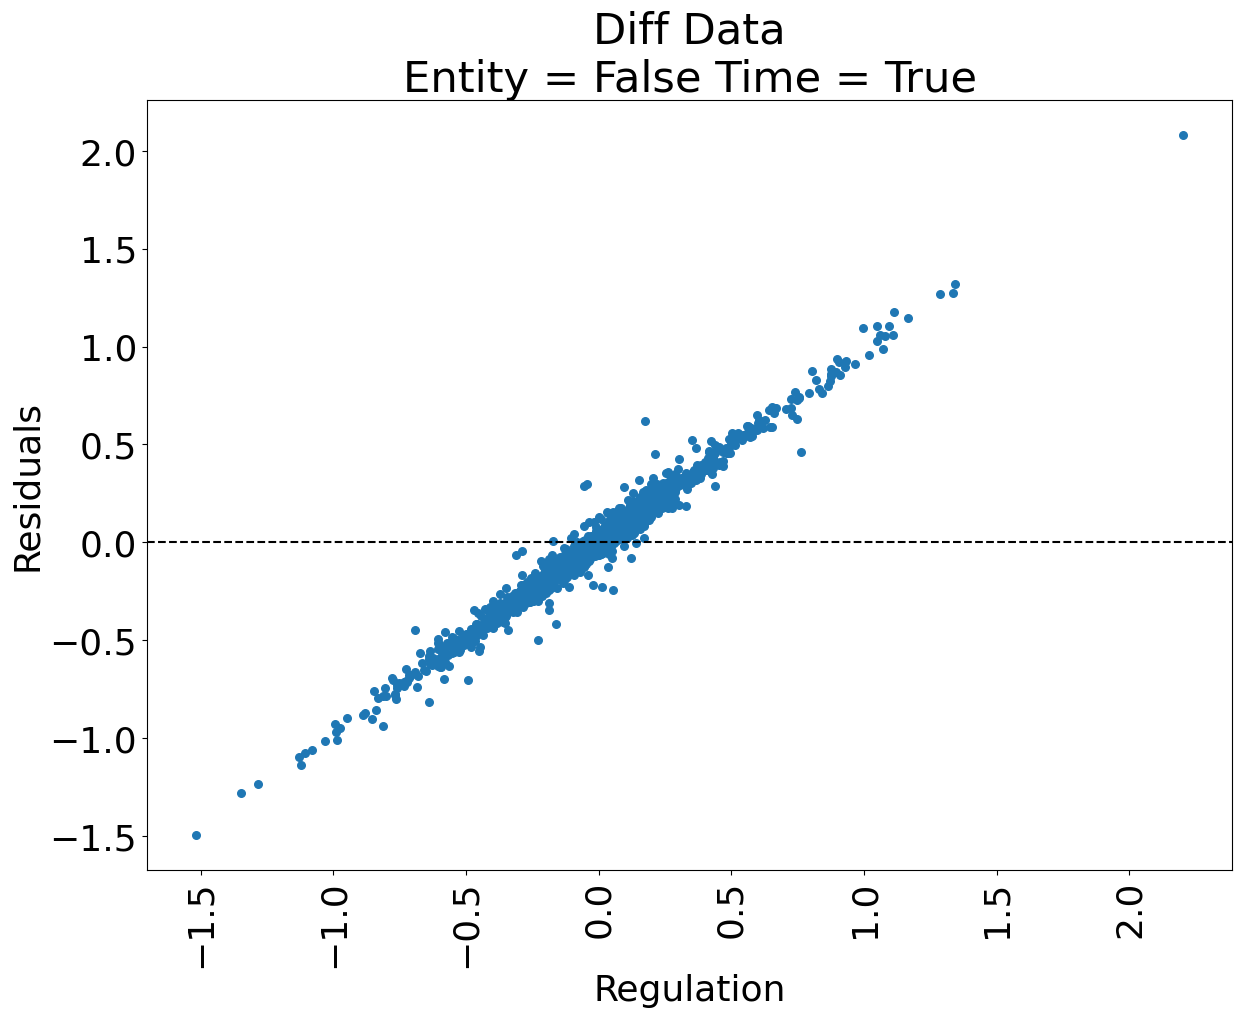

Diff Data
Entity = False
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0283
Estimator:                   PanelOLS   R-squared (Between):              0.0960
No. Observations:                2183   R-squared (Within):               0.0235
Date:                Thu, Apr 20 2023   R-squared (Overall):              0.0283
Time:                        10:49:23   Log-likelihood                   -320.28
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      12.690
Entities:                         165   P-value                           0.0000
Avg Obs:                       13.230   Distribution:                  F(5,2178)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust):

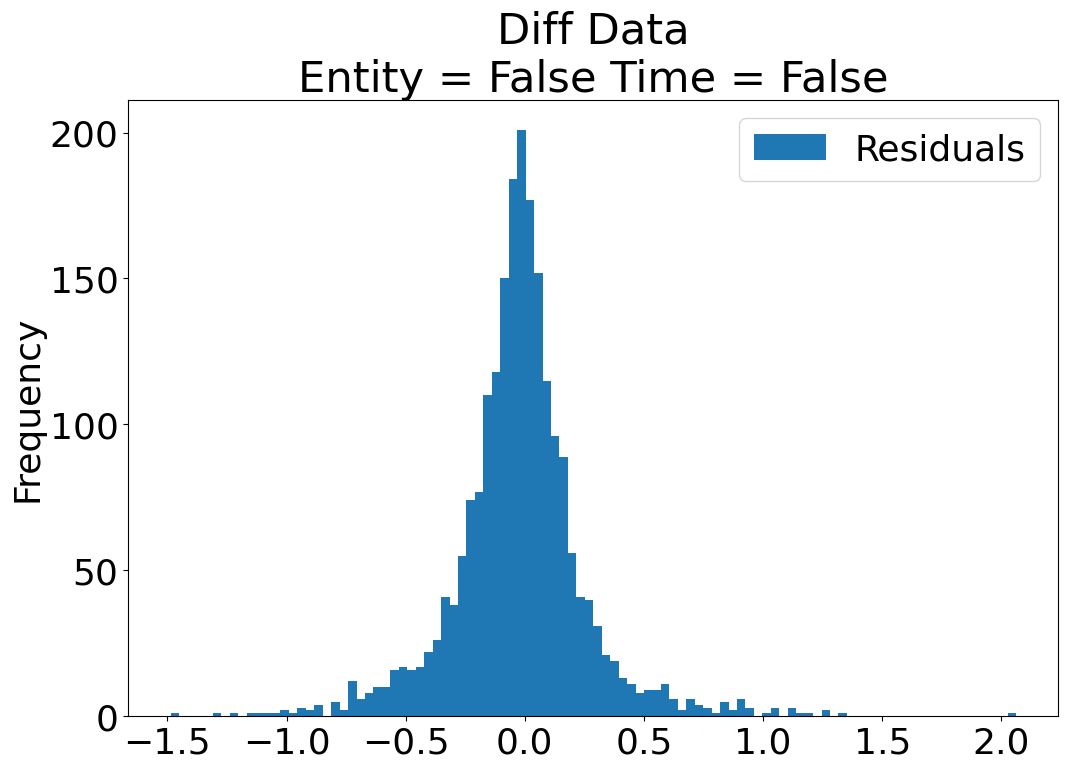

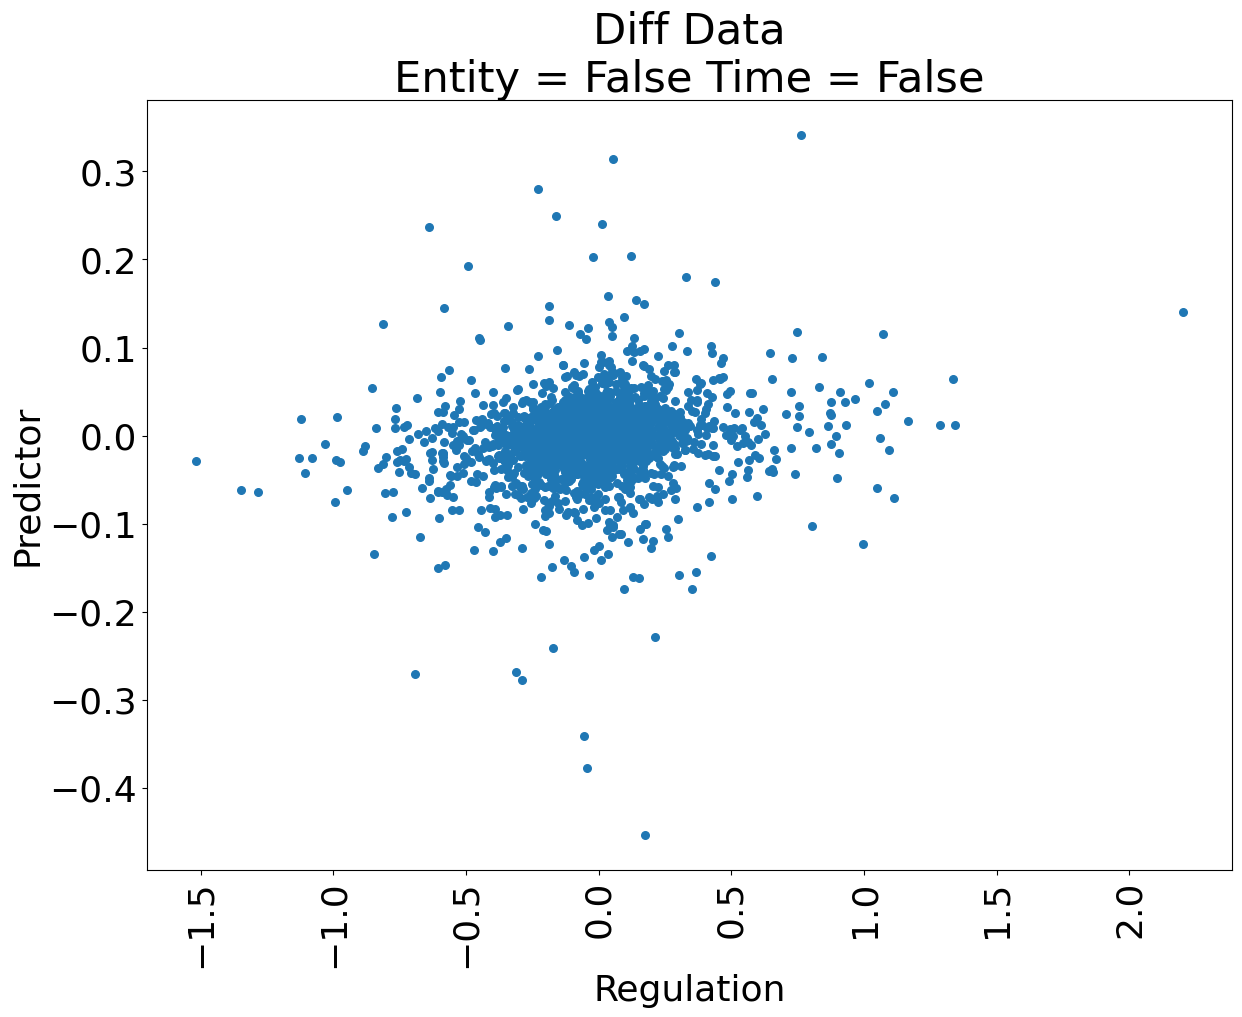

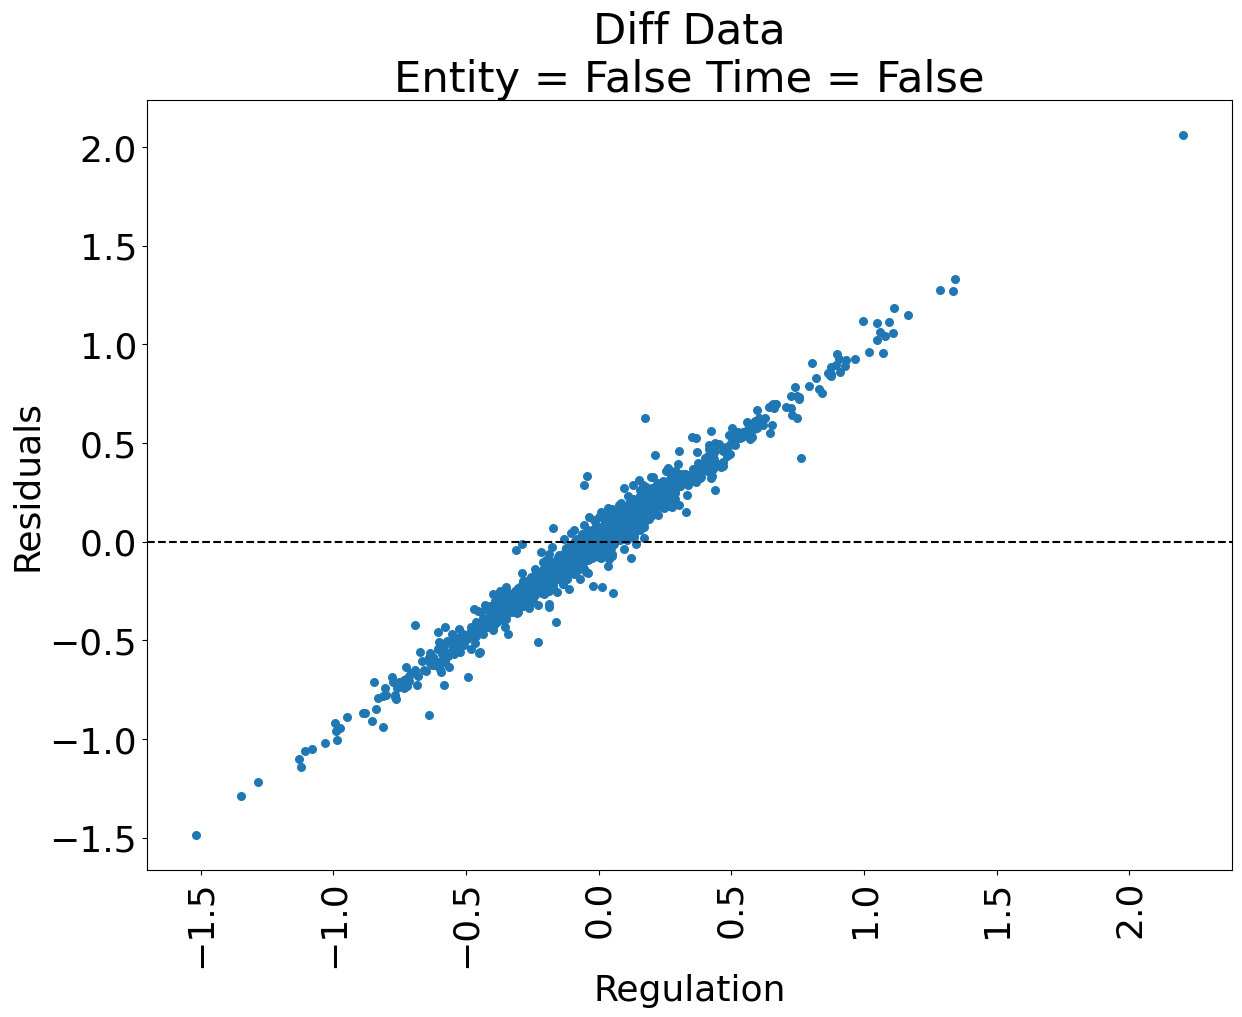

In [34]:
from linearmodels import PanelOLS
# . . . .
y_name = ["Regulation"]
X_names = ["Size of Government", 
          "Legal System and Property Rights", 
          "Sound Money",
          "Freedom to Trade Internationally",
          "RGDP Per Capita"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
#             X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

### Exercises

1. The regression results tend to generate residuals that are correlated with the dependent variable. This indicates that the regression is missing an explanatory variable that better captures the magnitude of changes in RGDP. Find a variable that improves prediction of RGDP per capita. Rerun all results presented in the panel regression section with this variable included.